Example Notebook for Persistent Topics
====================

This notebook shows how we can **(1)** run LDA on one data, **(2)** save some of the topics from the first LDA run and **(3)** use the saved topics when running LDA again on a new data.

Import stuff

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. Initial LDA on Beer 3
---------------------------

In [2]:
n_topics = 125 # number of topics
n_samples = 400 # how many samples to get during Gibbs sampling
n_burn = 200 # no. of burn-in samples to discard
n_thin = 5 # thinning parameter
alpha = 0.1 # Dirichlet parameter for document-topic distributions
beta = 0.01 # Dirichlet parameter for topic-word distributions

fragment_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = None

ms1_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

In [3]:
ms2lda = Ms2Lda(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                ms1_filename, ms2_filename, relative_intensity=True)
df, vocab = ms2lda.preprocess()

Data shape (856, 1664)


In [ ]:
ms2lda.run_lda(df, vocab, n_topics, n_samples, n_burn, n_thin, 
               alpha, beta, use_own_model=True, use_native=True)

Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Burn-in 1 
Burn-in 2 
Burn-in 3 
Burn-in 4 
Burn-in 5 
Burn-in 6 
Burn-in 7 
Burn-in 8 
Burn-in 9 
Burn-in 10 
Burn-in 11 
Burn-in 12 
Burn-in 13 
Burn-in 14 
Burn-in 15 
Burn-in 16 
Burn-in 17 
Burn-in 18 
Burn-in 19 
Burn-in 20 
Burn-in 21 
Burn-in 22 
Burn-in 23 
Burn-in 24 
Burn-in 25 
Burn-in 26 
Burn-in 27 
Burn-in 28 
Burn-in 29 
Burn-in 30 
Burn-in 31 
Burn-in 32 
Burn-in 33 
Burn-in 34 
Burn-in 35 
Burn-in 36 
Burn-in 37 
Burn-in 38 
Burn-in 39 
Burn-in 40 
Burn-in 41 
Burn-in 42 


Next, we save the results of this LDA on beer3 and produce the output matrices etc.

In [33]:
ms2lda.write_results('beer3_pos_rel')

Writing topics to results/beer3_pos_rel/beer3_pos_rel_topics.csv
Writing fragments x topics to results/beer3_pos_rel/beer3_pos_rel_all.csv
Writing topic docs to results/beer3_pos_rel/beer3_pos_rel_docs.csv


And we show the ranking of the top-10 topics by their h-indices. Change the *sort_by* parameter to rank by either h-index or in-degree and remove the *top_N* parameter to show the ranking of all topics

In [34]:
# topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='in_degree')
topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='h_index', top_N=10)

Topic Ranking

Topic 57 h-index=7
Topic 87 h-index=7
Topic 16 h-index=6
Topic 50 h-index=6
Topic 101 h-index=6
Topic 0 h-index=4
Topic 5 h-index=4
Topic 20 h-index=4
Topic 21 h-index=4
Topic 27 h-index=4



Plot the fragments of these topics.

Topic Ranking

Topic 57 h-index=7
Topic 87 h-index=7
Topic 16 h-index=6
Topic 50 h-index=6
Topic 101 h-index=6
Topic 0 h-index=4
Topic 5 h-index=4
Topic 20 h-index=4
Topic 21 h-index=4
Topic 27 h-index=4

Topic 57 h-index=7

Parent peaks

     peakID	mz		rt		int		score
1    10524	212.09509	739.434		5.293e+06	0.981
2    10527	212.09507	649.151		3.917e+06	0.971
3    7780 	212.09512	515.409		5.867e+06	0.967
4    7778 	212.09513	557.680		7.742e+06	0.958
5    10525	212.09509	619.436		5.748e+06	0.901
6    10526	212.09505	593.907		5.924e+06	0.863
7    7779 	212.09533	456.158		3.811e+06	0.862

Fragments

1    fragment_58.06553 (0.141)
 peakID  MSnParentPeakID  mz        rt       intensity
 21214    7778            58.06557  553.205  1        
 21224    7779            58.06561  456.884  1        
 21249    7780            58.06559  522.024  1        
 24466   10524            58.06555  744.766  1        
 24474   10525            58.06557  616.584  1        
 24487   10526            58.06559 

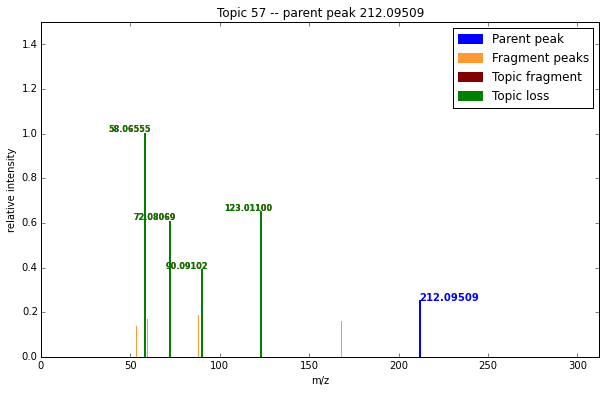

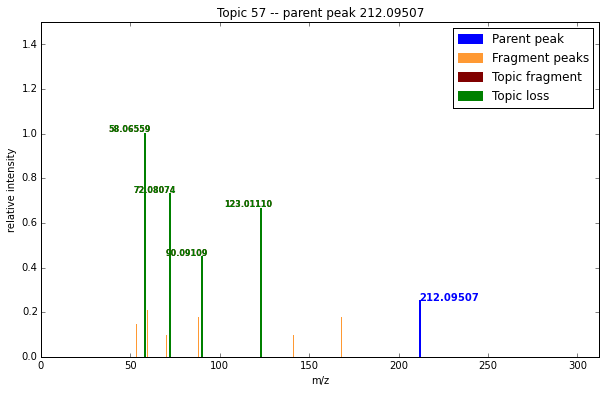

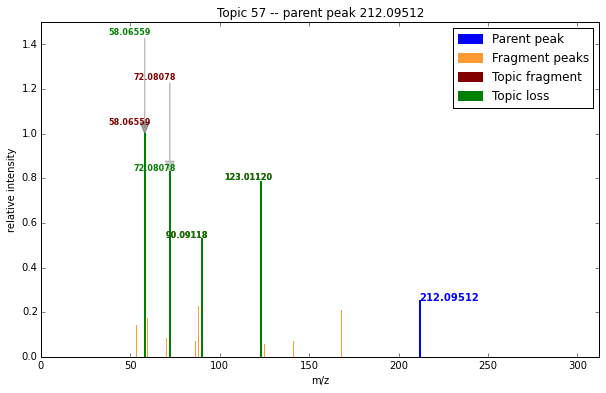

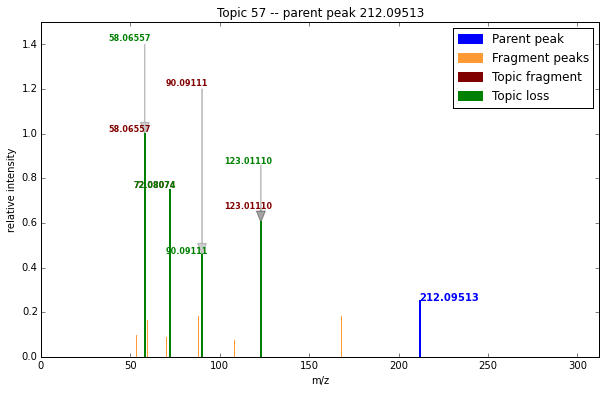

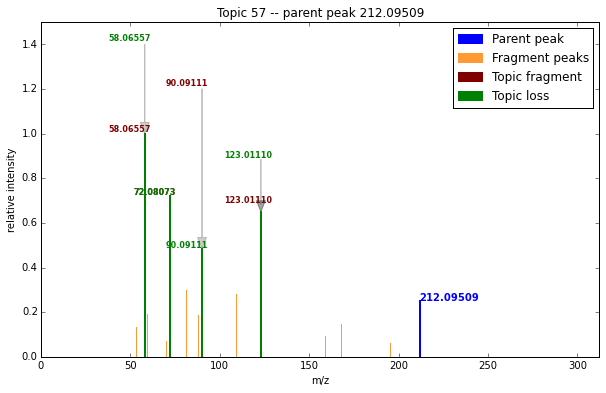

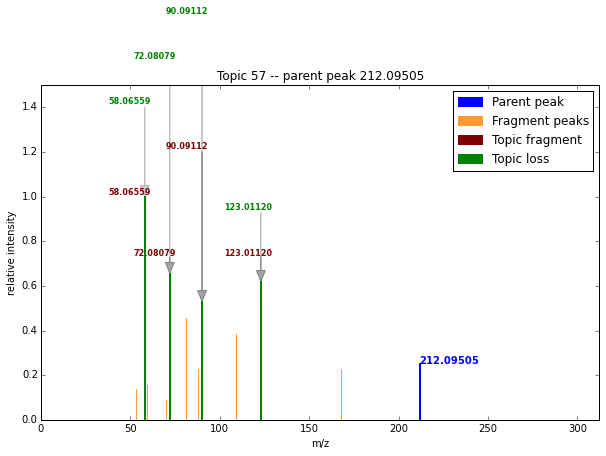

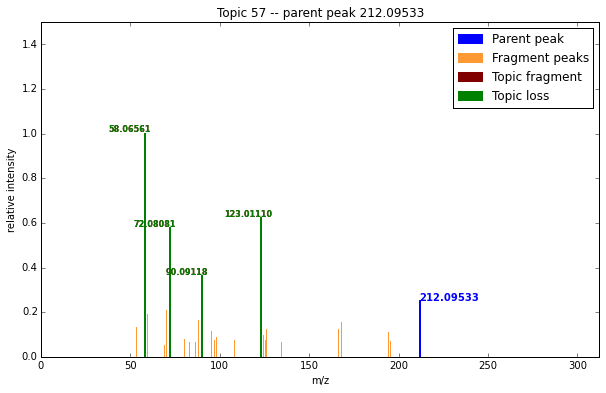

Topic 87 h-index=7

Parent peaks

     peakID	mz		rt		int		score
1    3935 	135.11680	268.114		3.826e+05	2.264
2    906  	339.25308	216.950		1.582e+06	0.853
3    2149 	291.26812	238.237		5.693e+05	0.776
4    1985 	313.23734	243.181		6.437e+05	0.767
5    2622 	346.25883	253.125		1.561e+06	0.716
6    3885 	105.06974	241.536		7.094e+05	0.701
7    2429 	257.04205	241.536		2.261e+06	0.694
8    2834 	241.17968	239.890		4.509e+05	0.676
9    1828 	311.13680	254.771		6.126e+05	0.568
10   1987 	333.26348	246.483		6.679e+05	0.554
11   2103 	331.24799	251.436		8.954e+05	0.543
12   1499 	277.21609	246.483		5.033e+05	0.523
13   3604 	195.13801	248.128		2.261e+06	0.485
14   3353 	295.22678	246.483		2.128e+06	0.470
15   3282 	213.14851	248.128		2.738e+06	0.468
16   2387 	307.26319	243.181		3.708e+05	0.447
17   3416 	253.14331	234.884		4.030e+05	0.352
18   3343 	338.34169	233.227		1.835e+06	0.316
19   3459 	241.14337	248.128		4.879e+05	0.274
20   3566 	181.12228	251.436		4.910e+05	0.271
21   3105 	229.

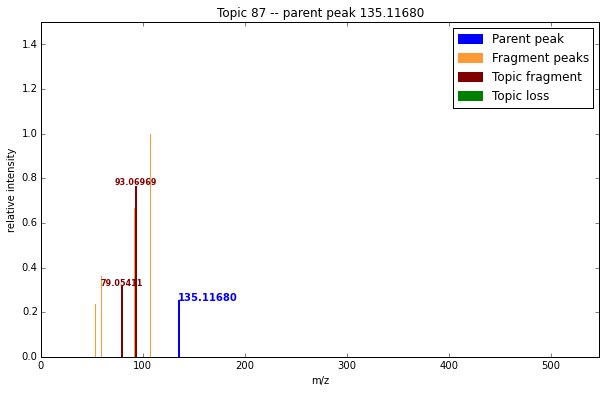

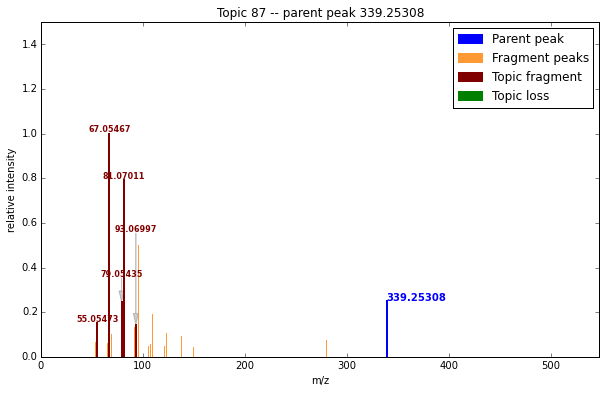

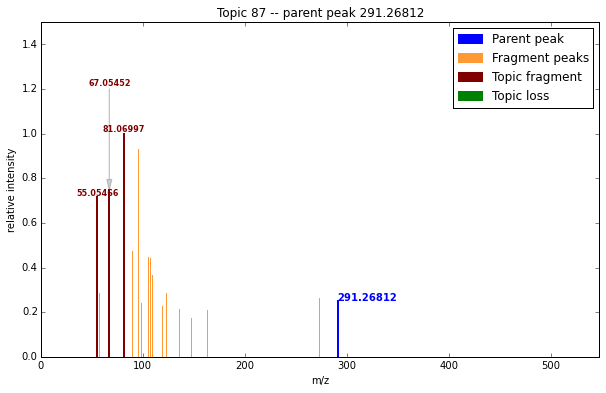

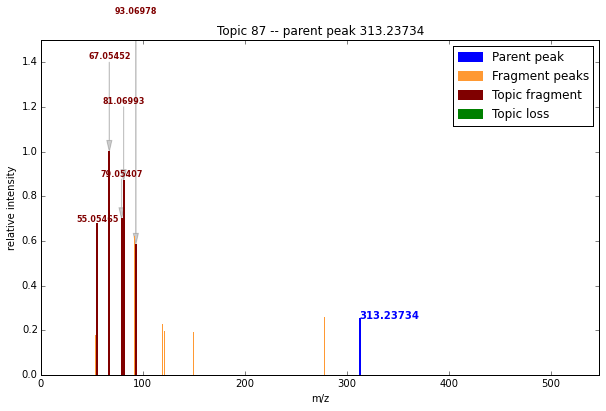

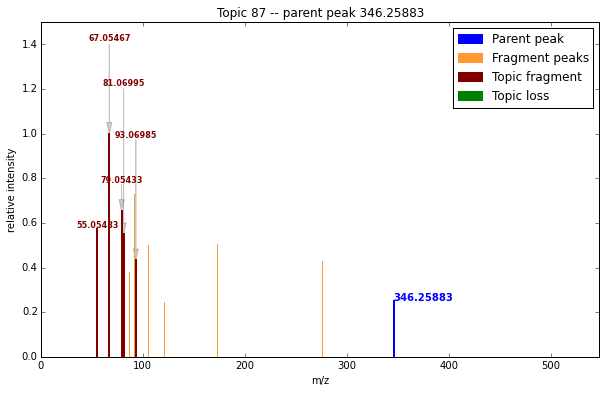

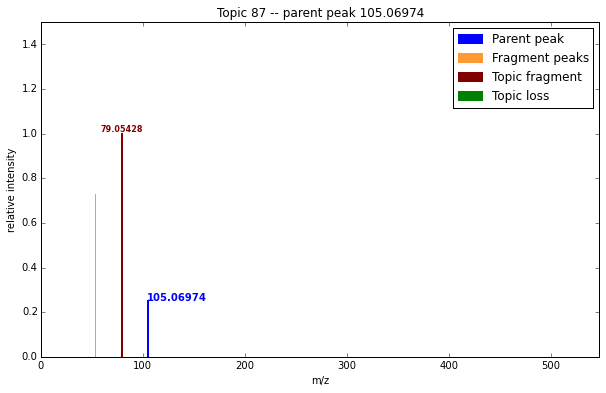

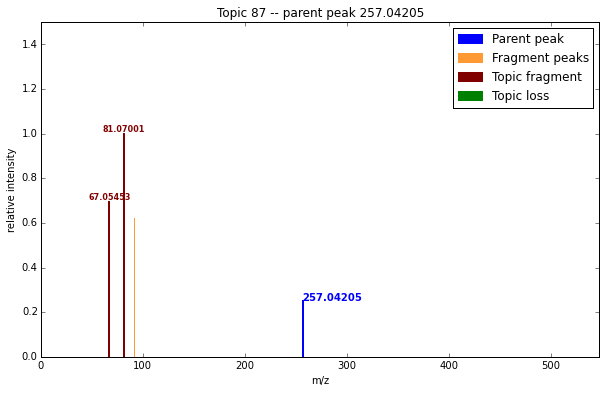

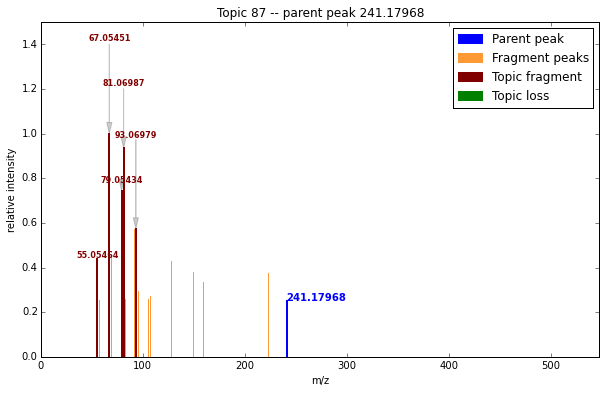

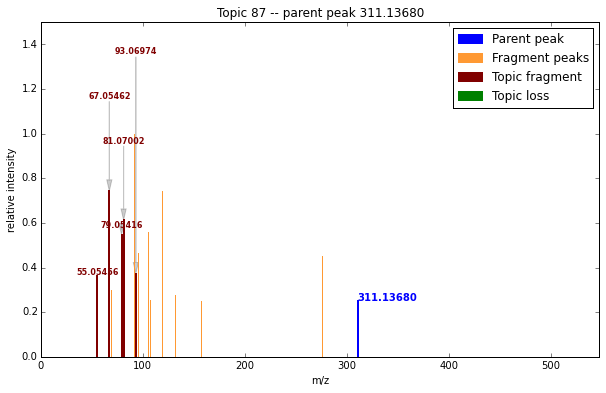

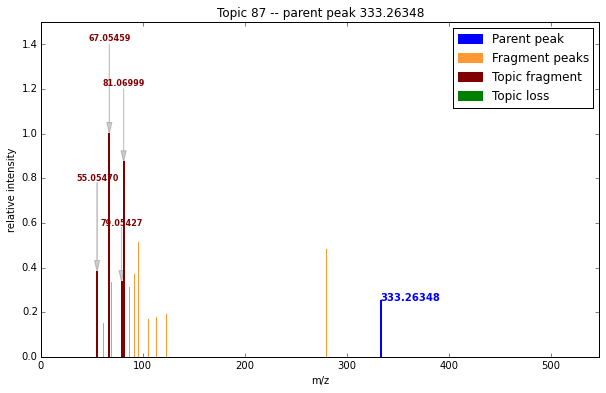

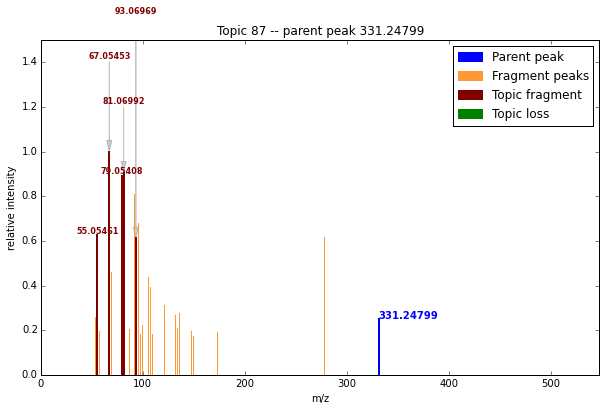

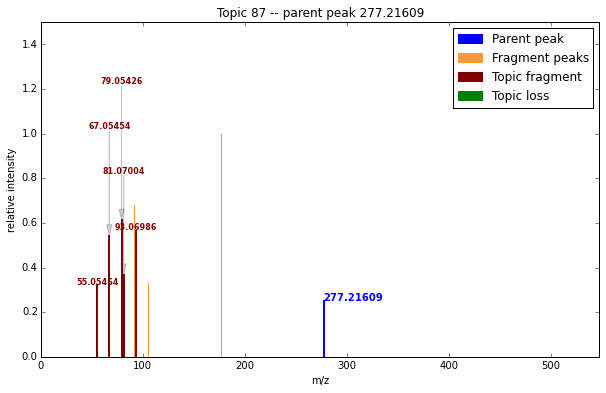

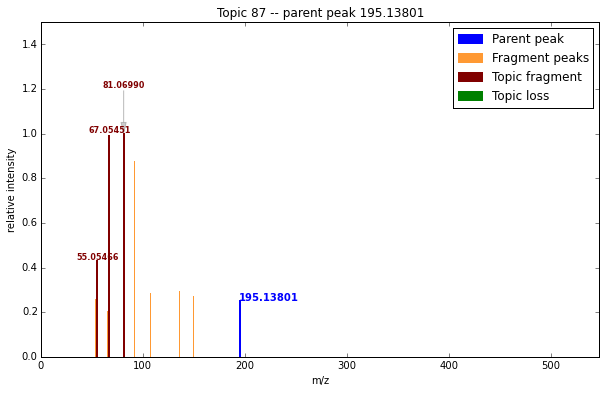

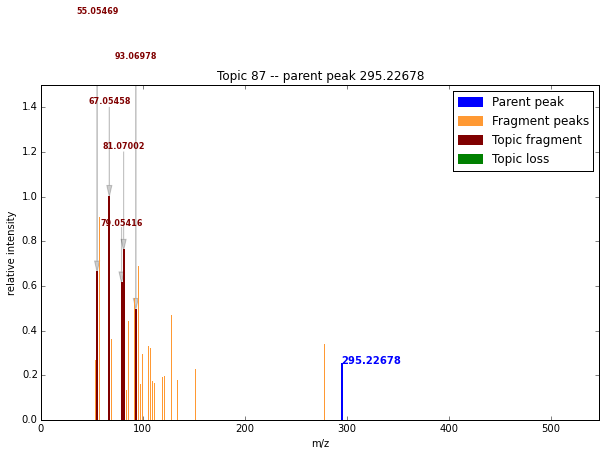

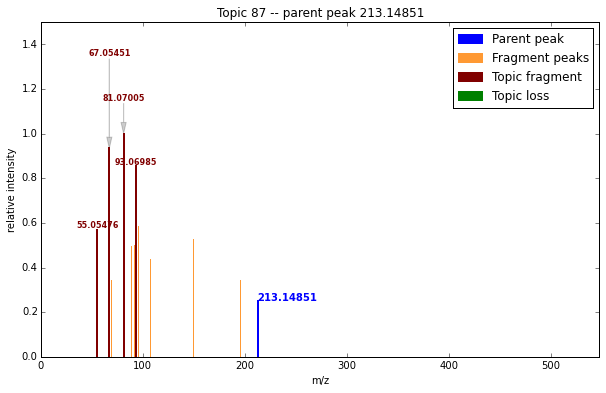

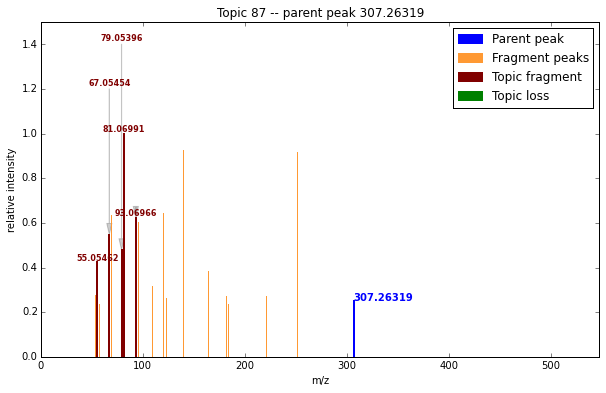

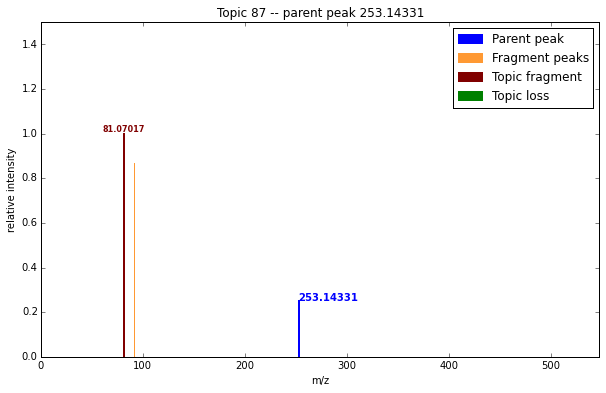

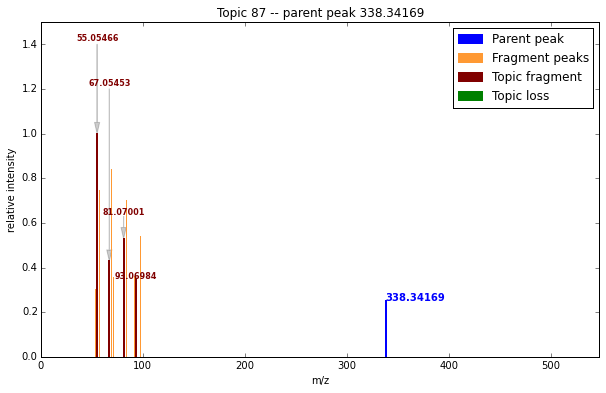

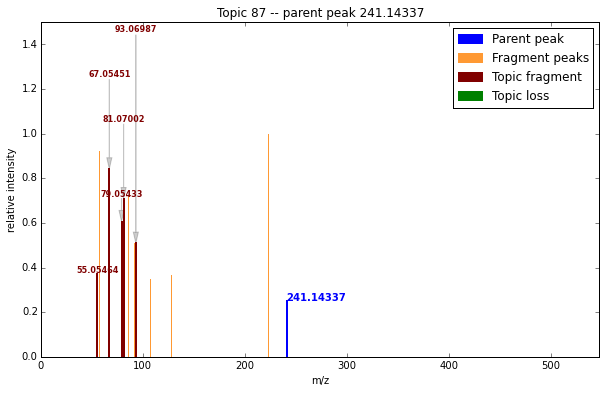

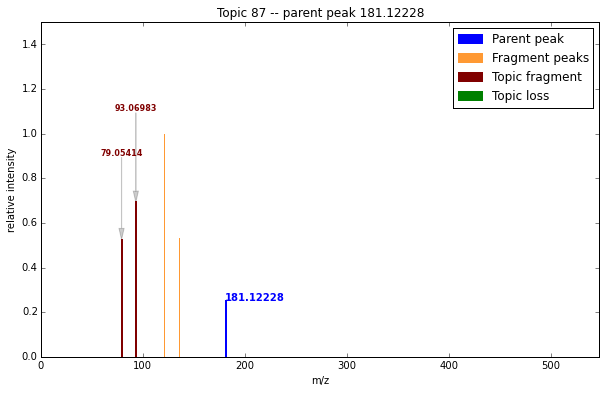

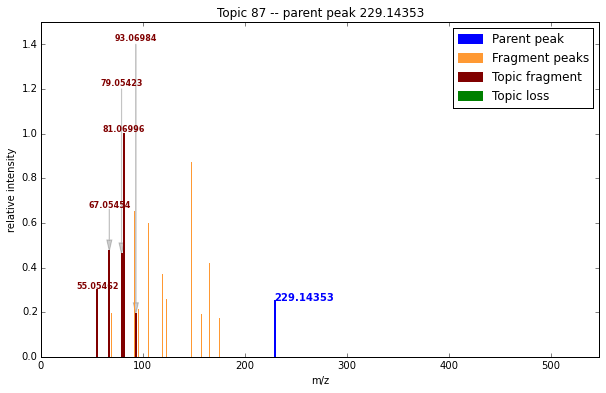

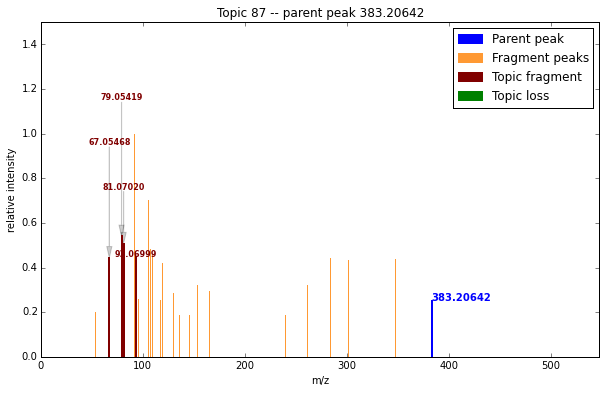

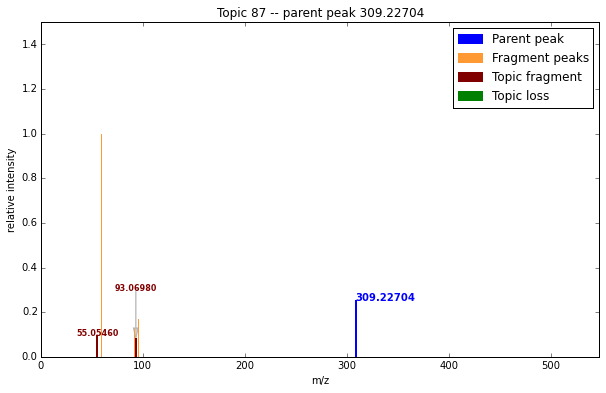

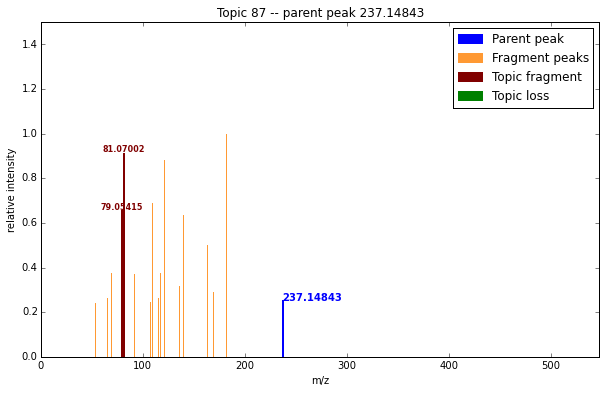

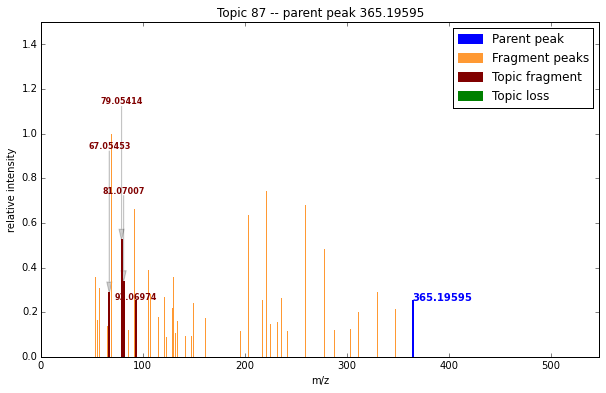

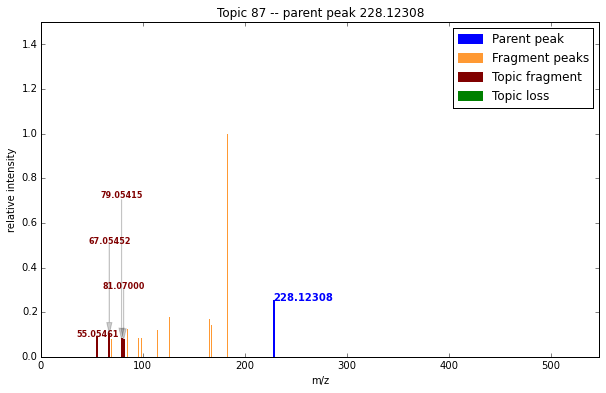

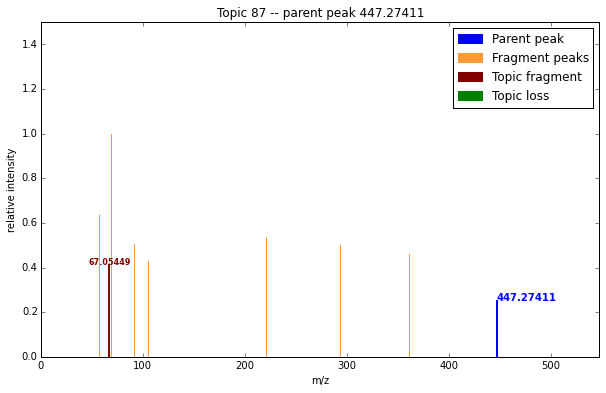

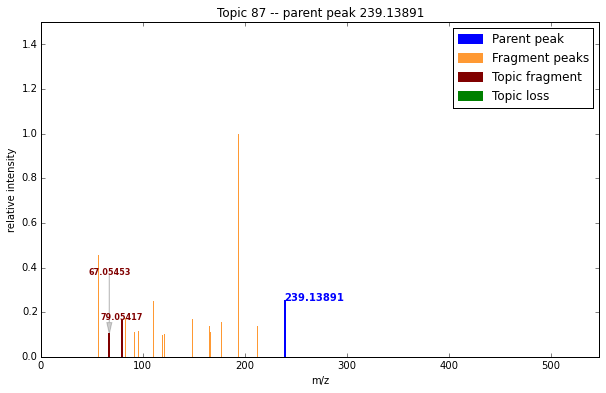

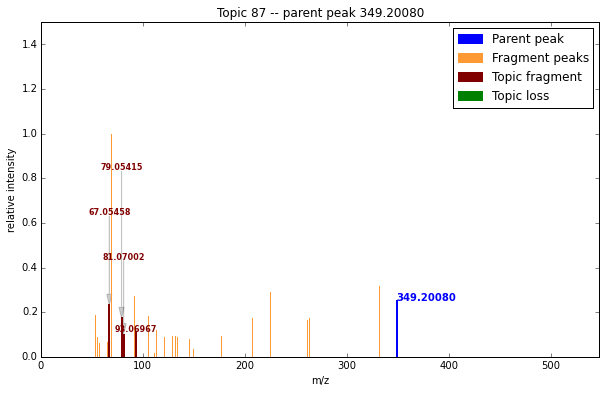

Topic 16 h-index=6

Parent peaks

     peakID	mz		rt		int		score
1    8417 	434.18696	649.151		1.700e+06	0.974
2    8068 	286.11303	597.184		2.129e+06	0.895
3    10311	163.06002	627.372		1.110e+06	0.541
4    9956 	198.09720	627.372		7.743e+06	0.375
5    5493 	420.18633	449.698		7.103e+05	0.374
6    8918 	492.19261	650.793		1.047e+06	0.310
7    6291 	186.07611	441.780		1.643e+06	0.291
8    10308	163.06003	601.884		1.957e+06	0.236
9    6305 	226.12844	465.402		2.596e+07	0.225
10   8827 	1009.34530	662.160		8.002e+05	0.182
11   9222 	684.25554	678.367		1.761e+07	0.174
12   9224 	1008.36142	688.576		1.930e+06	0.168
13   9337 	360.14993	652.424		2.088e+07	0.159
14   3483 	222.07980	305.834		6.176e+05	0.142
15   9244 	487.16597	665.330		5.983e+06	0.109
16   9338 	360.14997	705.057		3.450e+05	0.108
17   4079 	370.17083	311.220		9.411e+05	0.105
18   10513	162.07608	720.791		1.220e+07	0.101
19   8993 	667.22890	677.610		3.339e+06	0.088
20   6369 	163.06007	466.972		6.943e+06	0.084
21   7211 	43

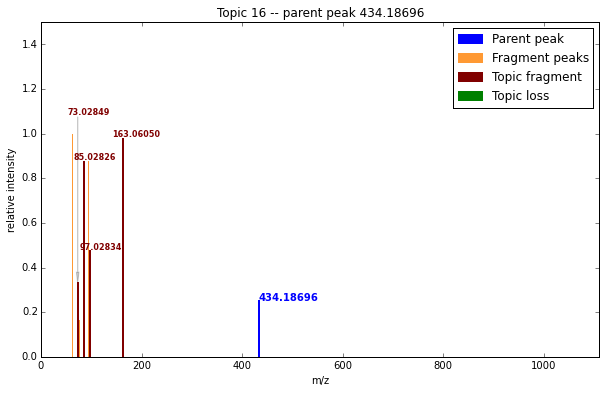

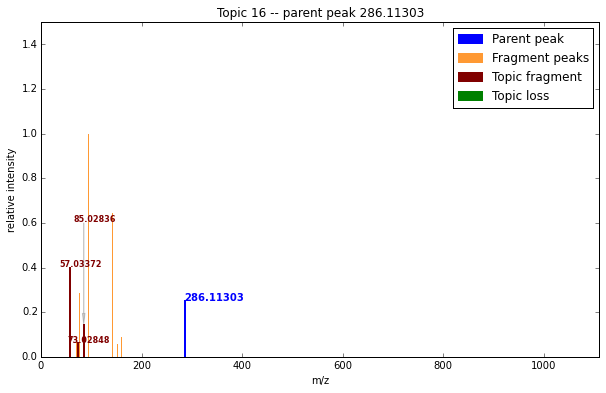

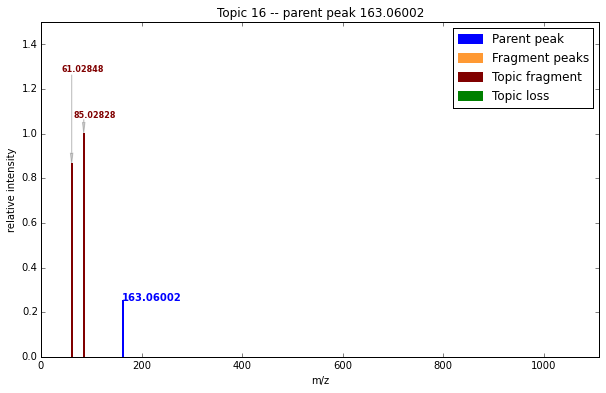

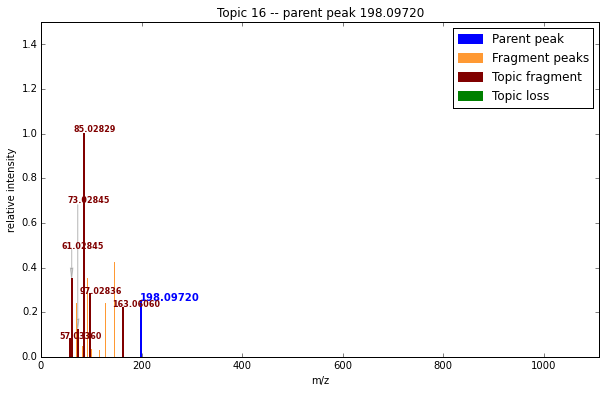

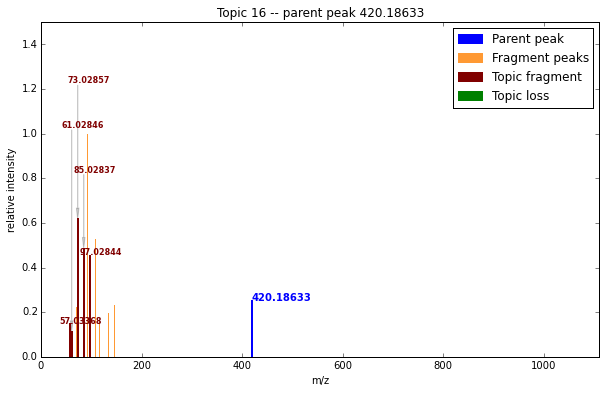

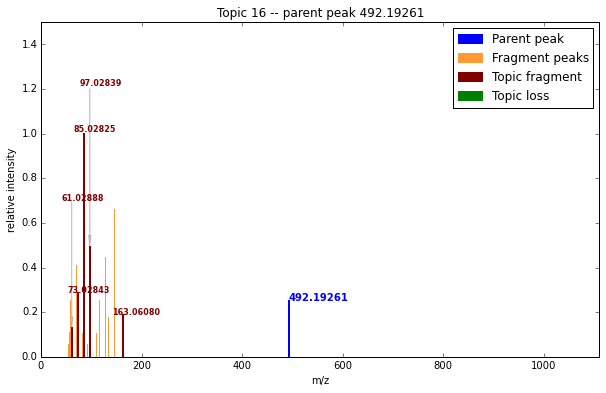

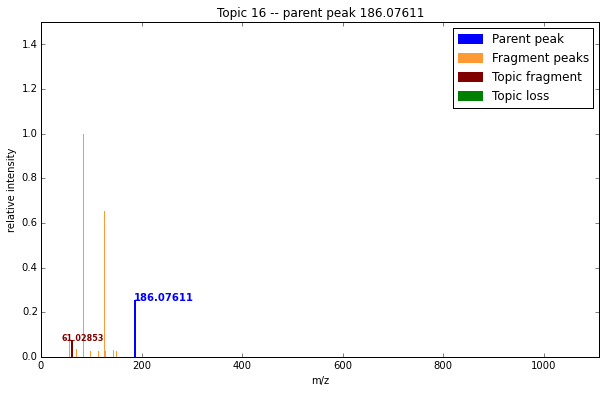

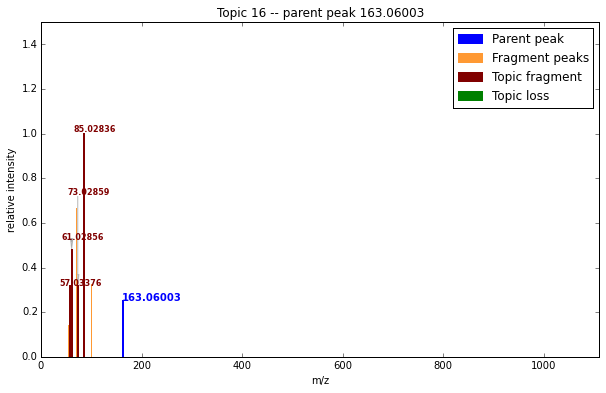

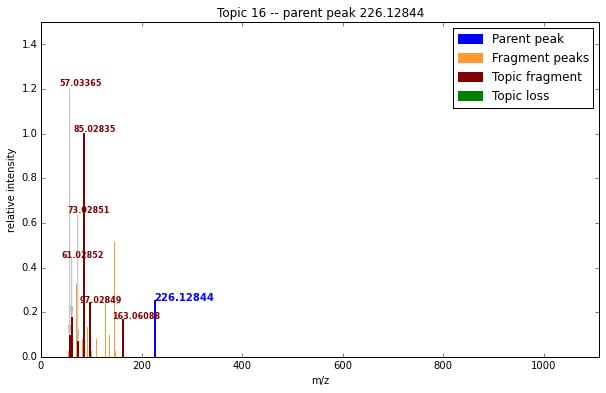

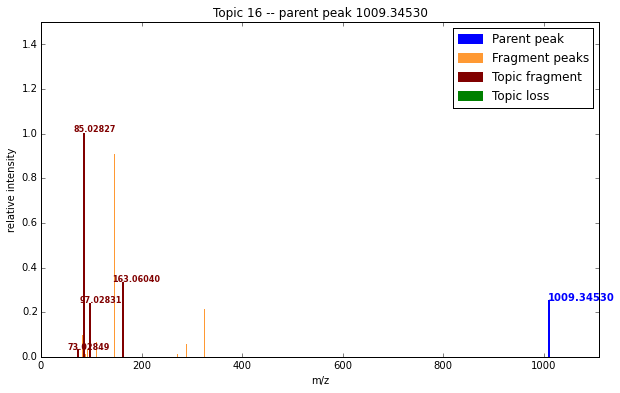

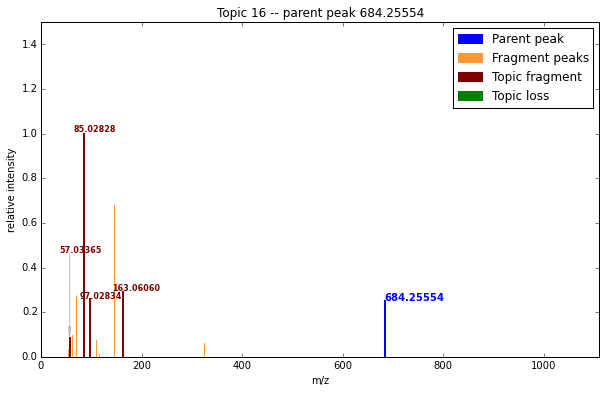

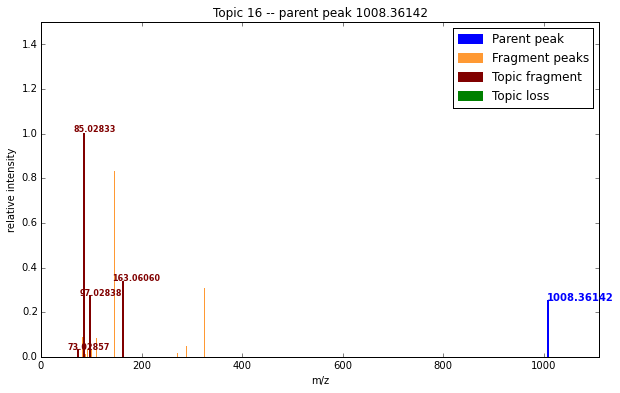

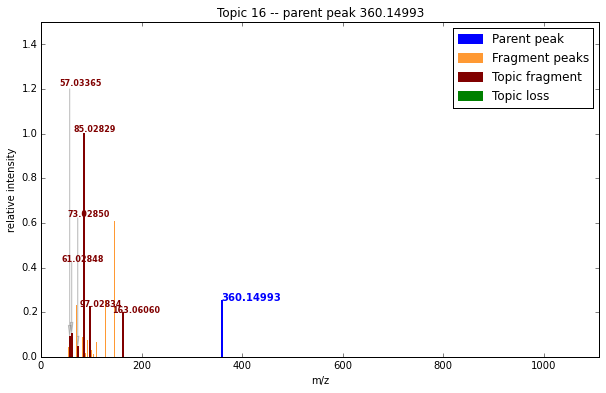

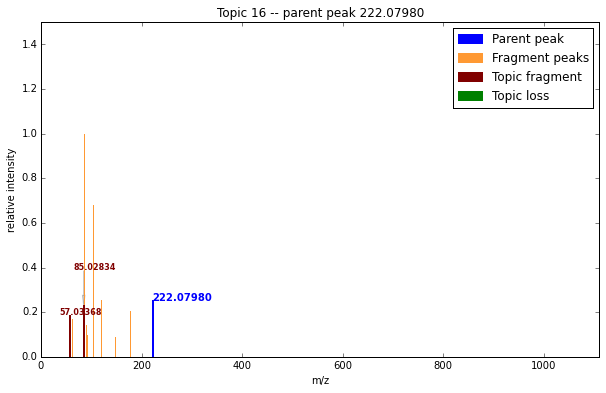

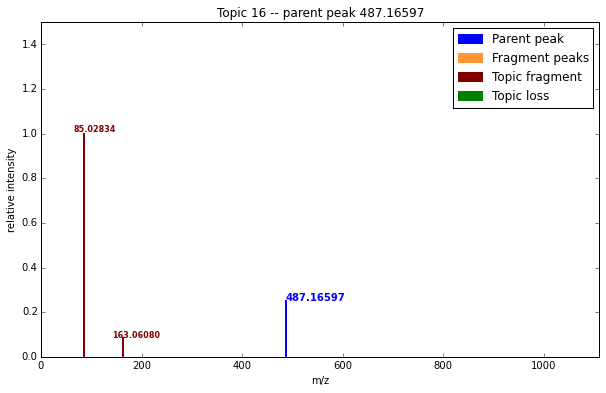

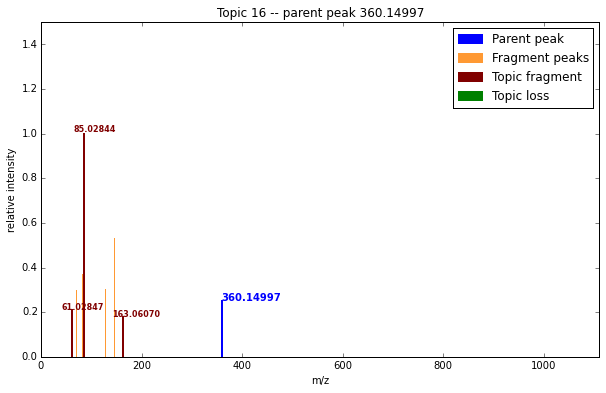

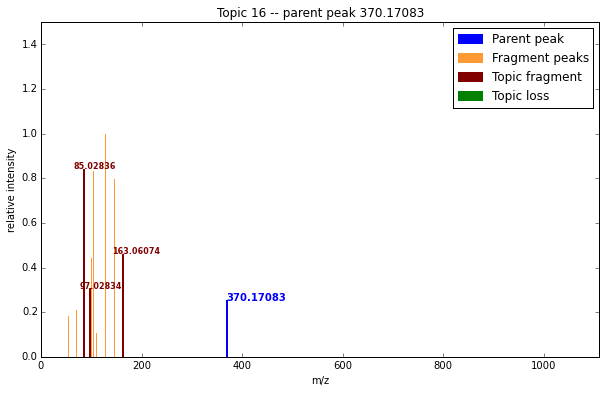

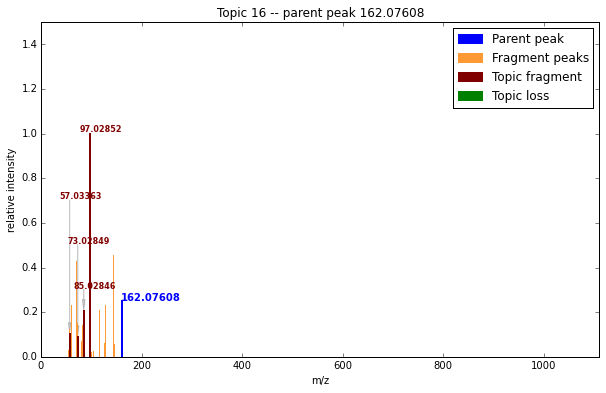

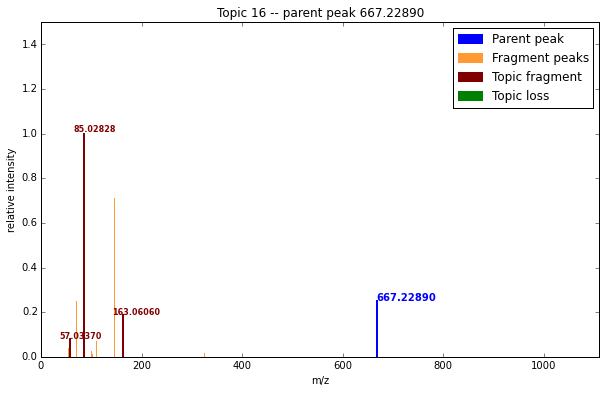

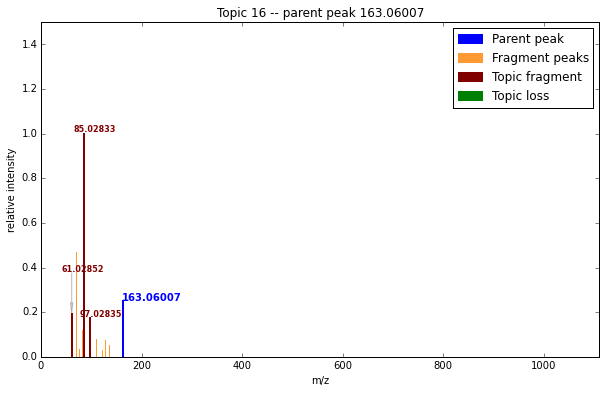

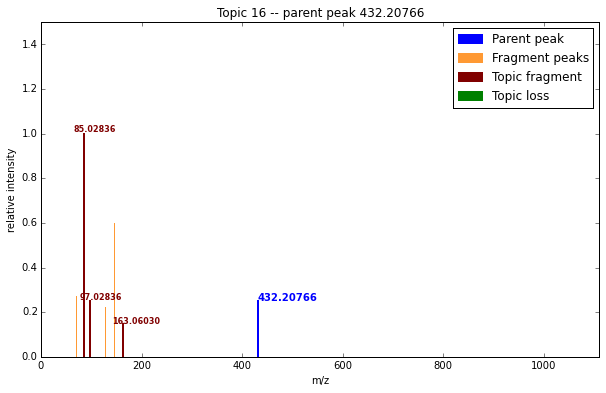

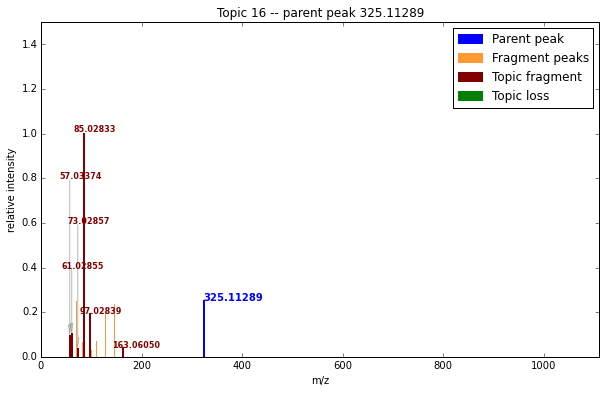

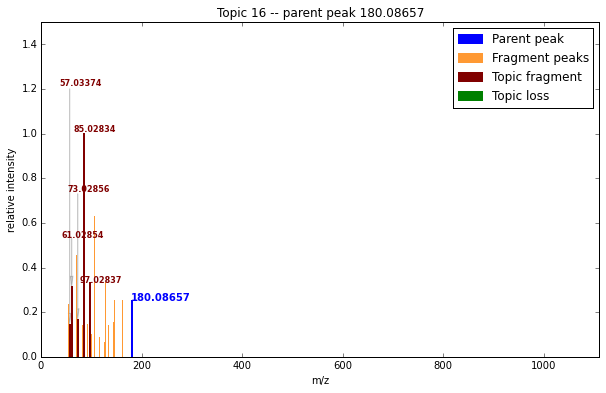

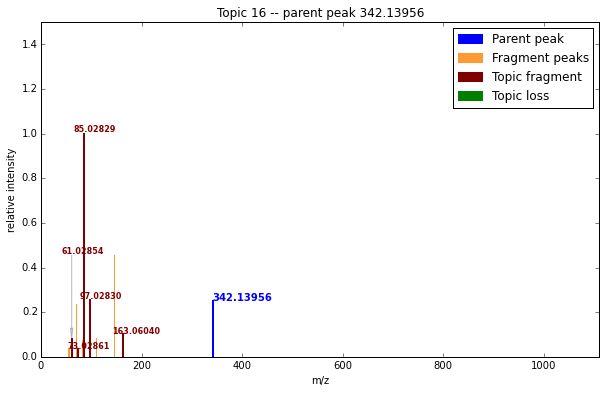

Topic 50 h-index=6

Parent peaks

     peakID	mz		rt		int		score
1    8396 	296.09760	624.196		3.083e+06	0.780
2    6512 	252.08650	499.470		8.493e+05	0.359
3    7174 	280.13888	501.043		6.737e+07	0.188
4    8280 	296.06569	606.606		3.088e+06	0.165
5    7088 	294.15460	380.610		1.715e+06	0.154
6    6349 	328.13907	419.222		2.445e+07	0.154
7    7275 	344.13393	534.050		3.699e+06	0.128
8    7968 	282.11815	554.431		1.383e+07	0.113
9    8049 	252.10761	592.308		3.563e+07	0.098
10   7089 	294.15452	435.357		3.415e+07	0.077
11   10364	266.12323	635.166		2.648e+08	0.068
12   6478 	312.11119	482.456		6.717e+06	0.063

Fragments

1    fragment_260.07565 (0.070)
 peakID  MSnParentPeakID  mz        rt       intensity
 21923   8280             260.0759  615.105  0.264159 
 22128   8396             260.0754  620.049  1.000000 
2    fragment_134.04528 (0.060)
 peakID  MSnParentPeakID  mz          rt       intensity
 19168   6512             134.045295  495.784  0.421489 
 21927   8280             13

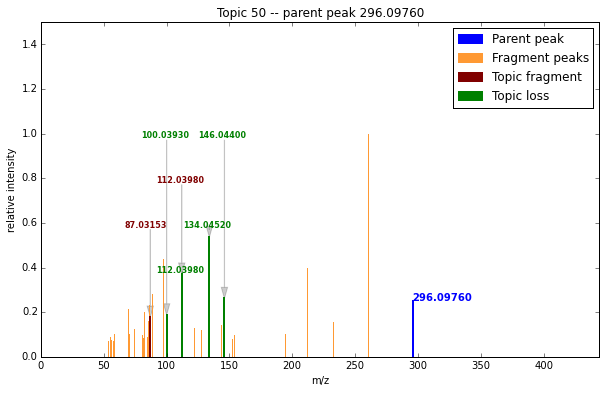

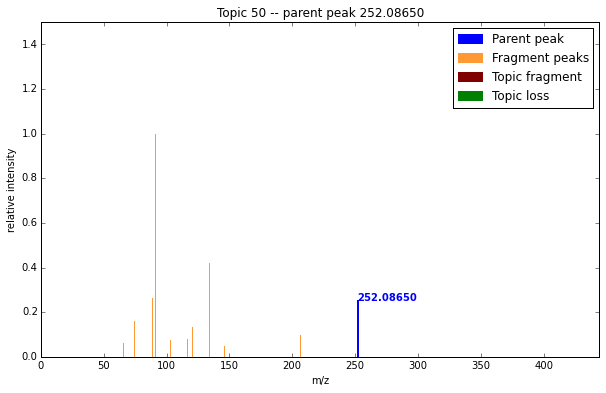

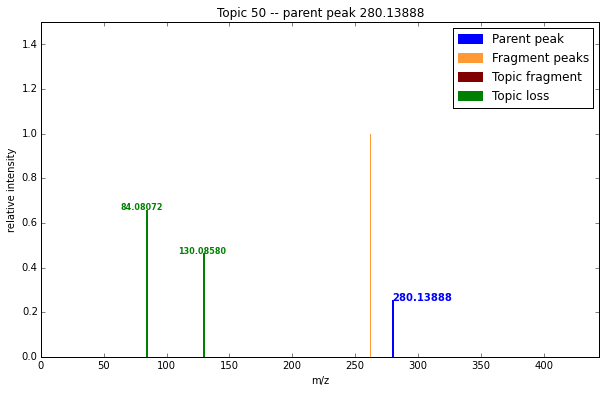

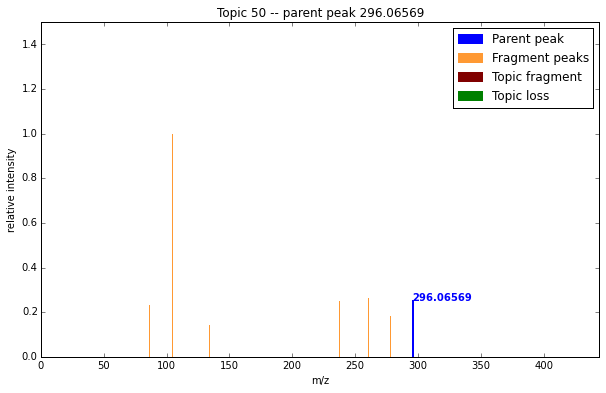

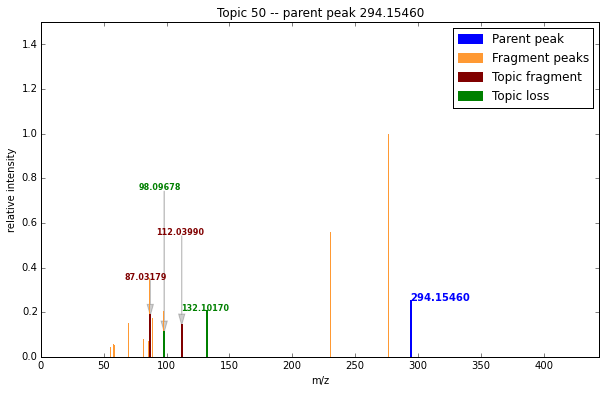

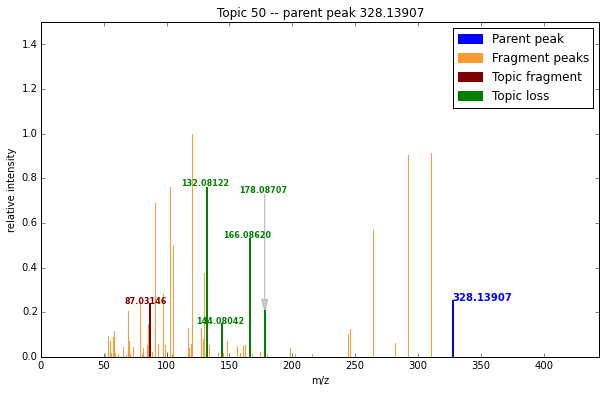

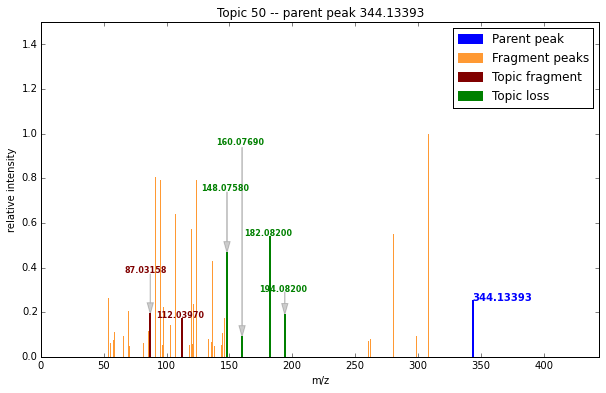

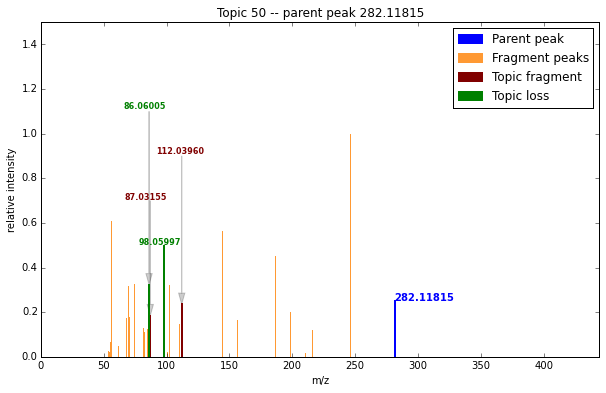

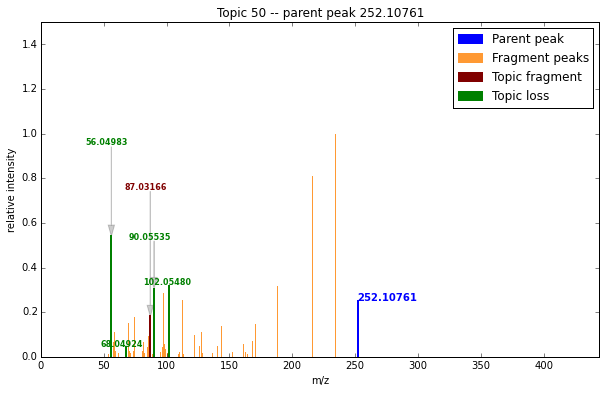

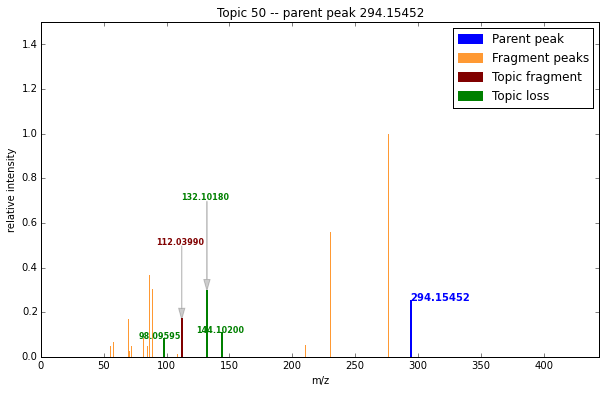

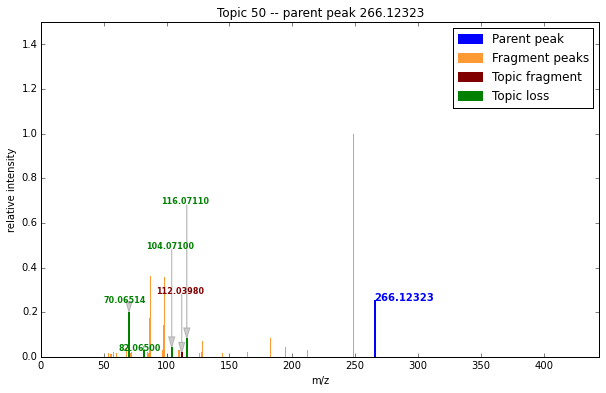

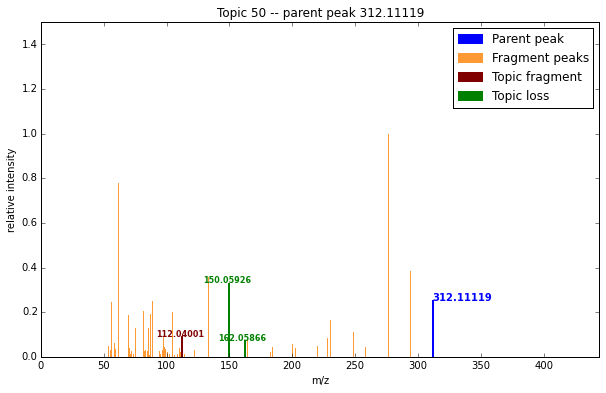

Topic 101 h-index=6

Parent peaks

     peakID	mz		rt		int		score
1    10467	306.16862	636.638		2.560e+06	0.962
2    10503	276.15795	636.638		1.591e+06	0.940
3    10521	372.18967	636.638		2.905e+06	0.875
4    10522	372.18974	617.886		2.403e+06	0.861
5    10022	363.18438	791.985		1.081e+06	0.846
6    6414 	291.08388	465.402		2.522e+07	0.726
7    10504	276.15782	595.502		9.881e+05	0.598
8    6523 	469.20801	494.747		1.176e+06	0.590
9    10532	291.16317	729.738		5.737e+06	0.569
10   10529	291.16314	505.911		2.550e+06	0.562
11   10531	291.16316	593.907		4.721e+06	0.520
12   7175 	306.16851	517.032		9.032e+05	0.518
13   10528	291.16318	632.053		6.842e+06	0.456
14   10530	291.16325	564.091		3.560e+06	0.338
15   10994	357.18441	968.872		3.737e+05	0.250
16   8204 	307.09988	614.695		1.755e+06	0.213
17   8564 	561.69431	619.436		8.725e+05	0.199
18   8868 	364.79490	636.638		5.664e+06	0.169
19   8582 	546.68913	611.450		1.029e+06	0.155
20   7249 	372.18873	541.633		1.201e+06	0.135
21   8576 	374

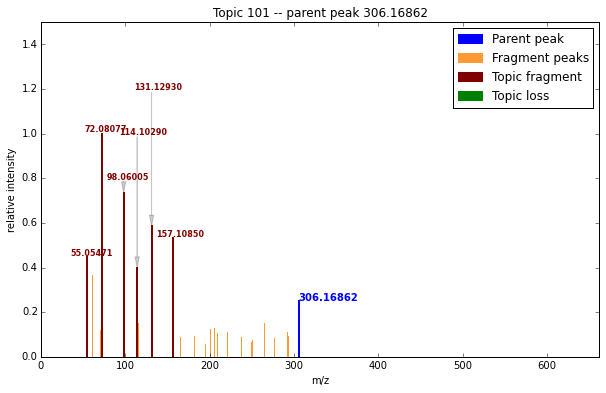

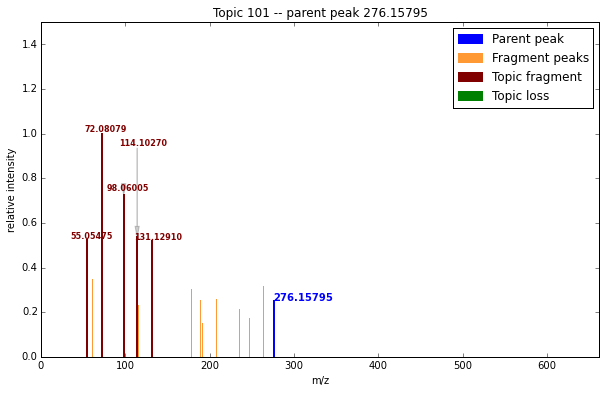

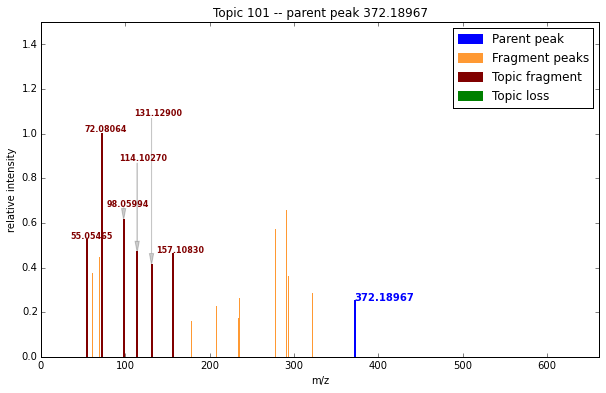

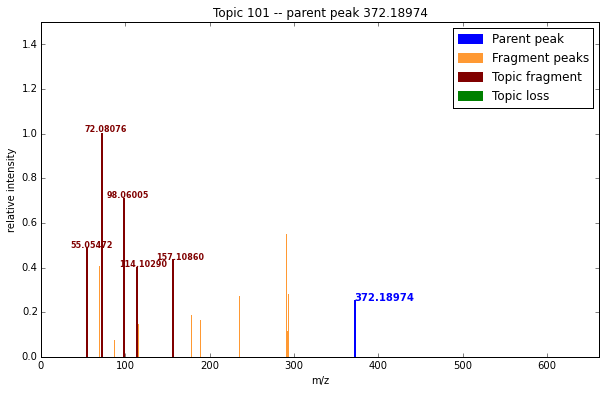

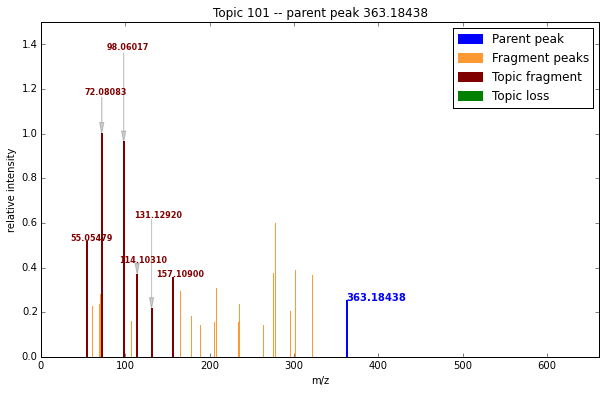

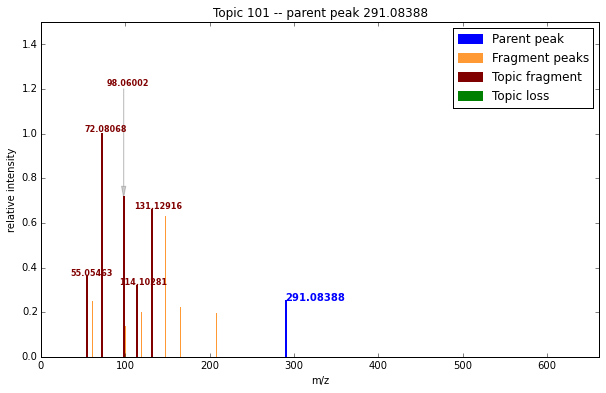

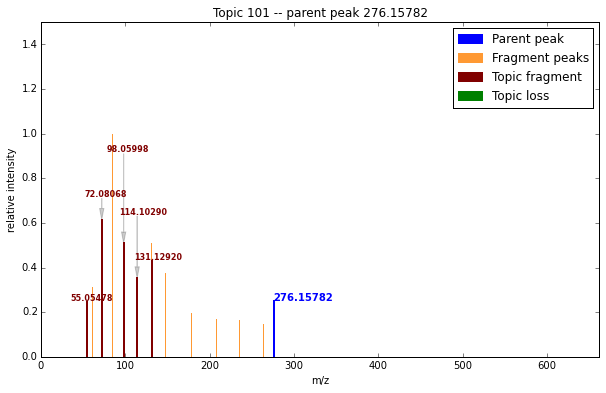

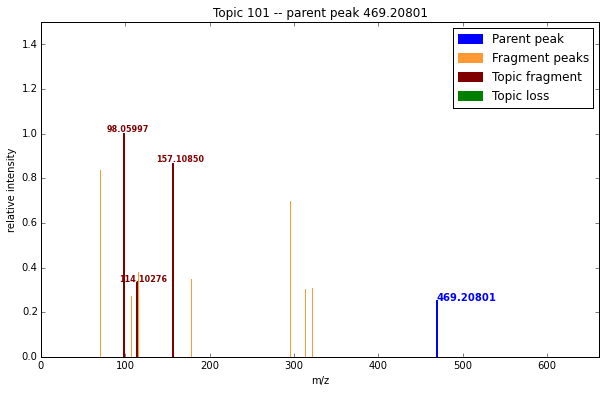

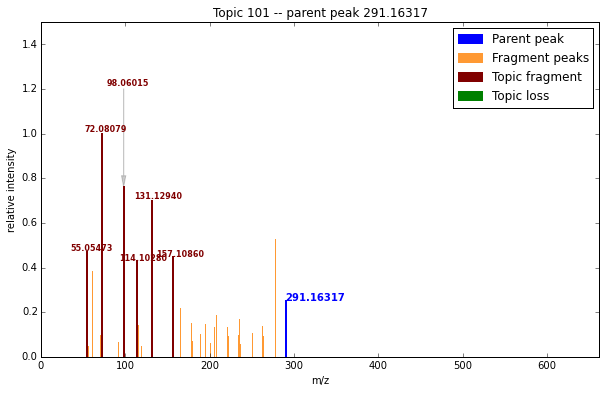

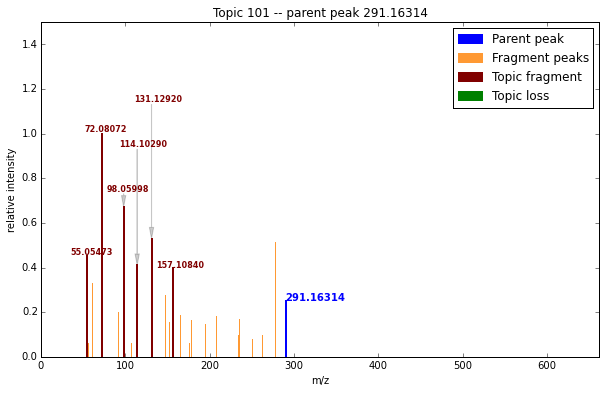

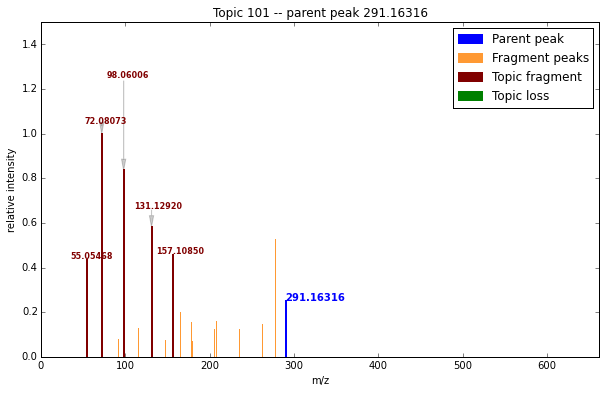

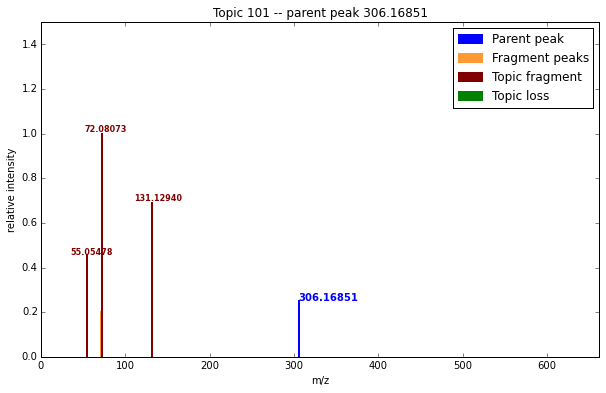

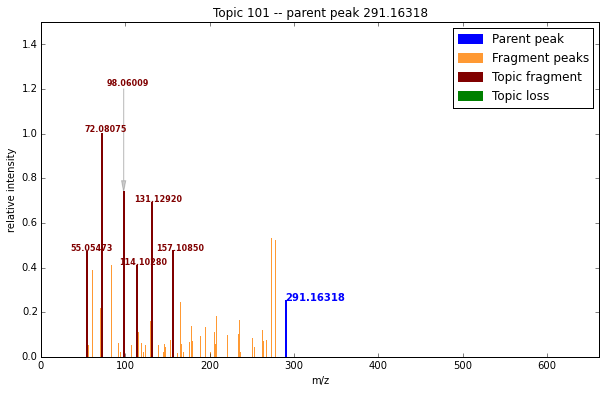

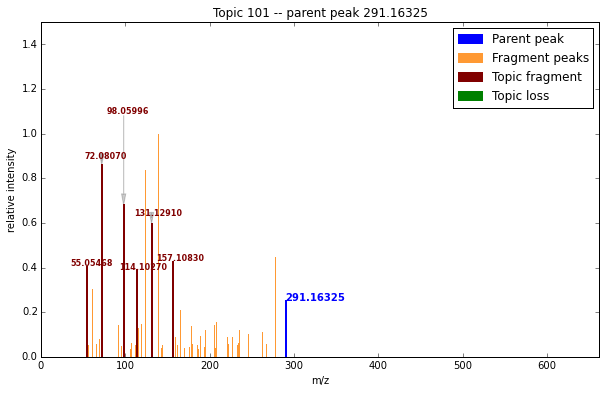

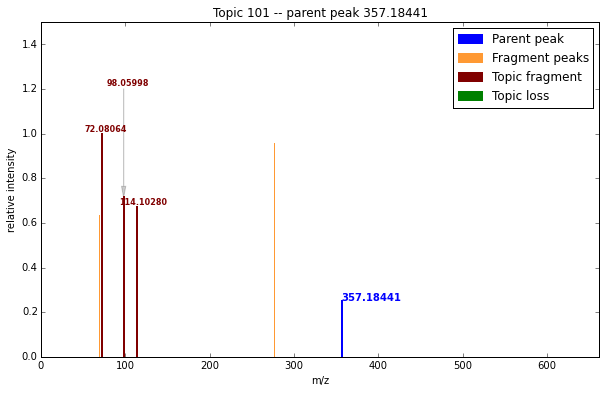

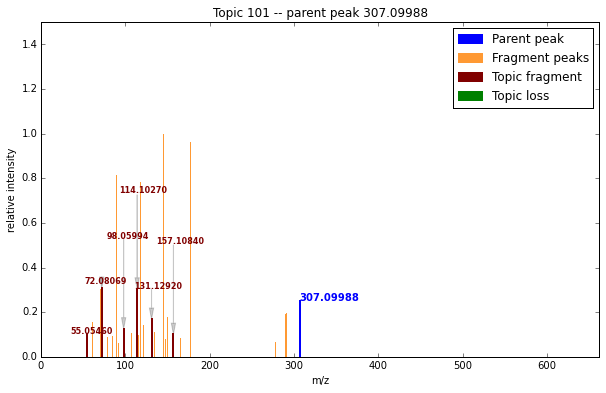

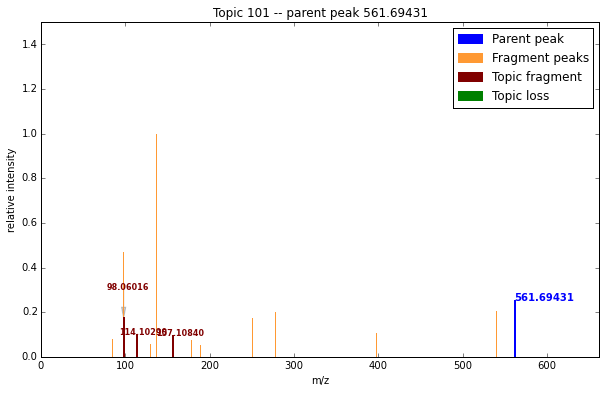

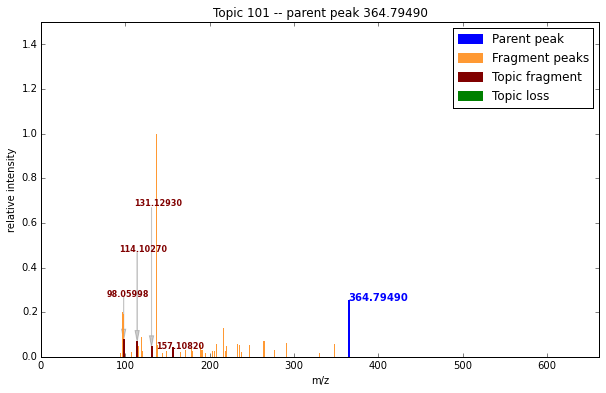

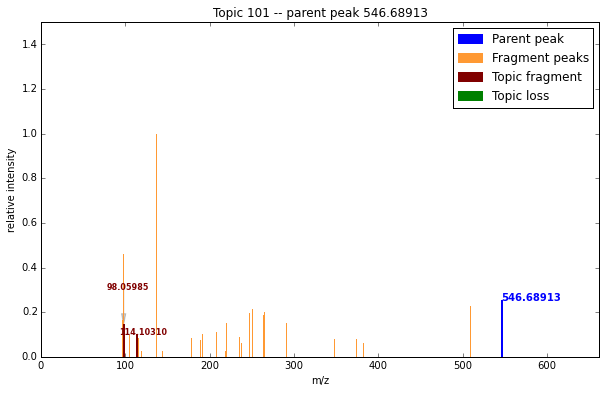

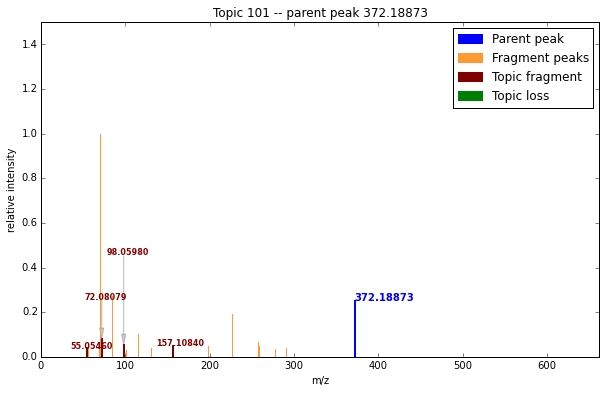

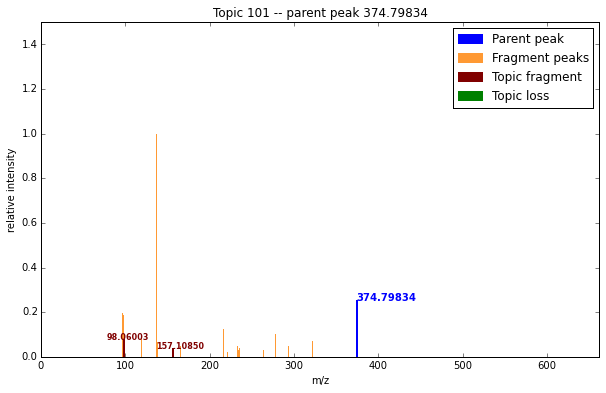

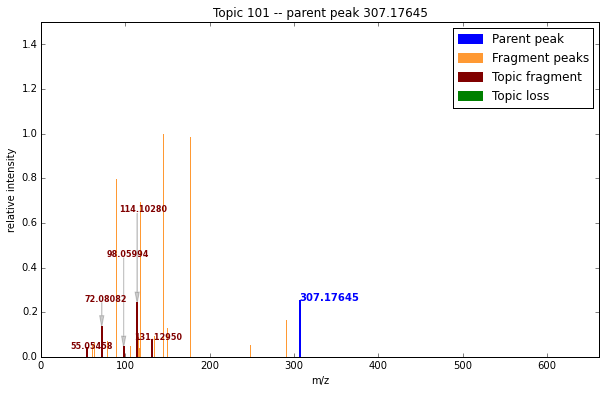

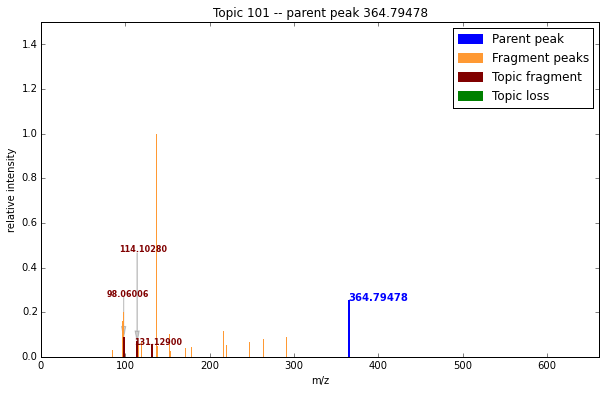

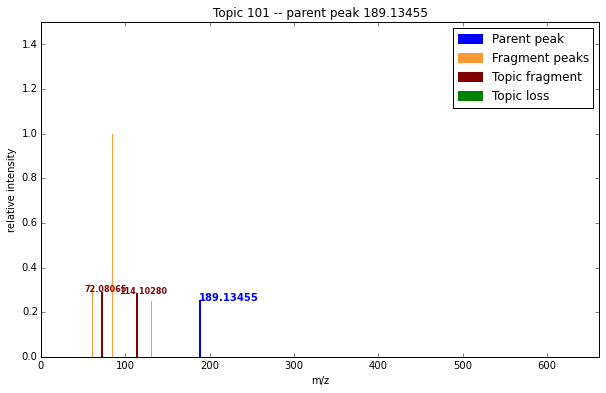

Topic 0 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    12747	265.15453	1093.700		4.872e+05	0.957
2    12752	265.15453	1145.810		4.082e+05	0.954
3    8702 	498.26006	619.436		2.220e+06	0.939
4    8318 	323.17141	565.722		1.952e+06	0.878
5    3579 	369.11816	290.983		4.275e+05	0.877
6    2650 	540.27088	263.096		5.566e+06	0.853
7    8088 	307.17645	565.722		1.986e+06	0.845
8    2287 	540.33066	274.685		5.148e+05	0.794
9    8204 	307.09988	614.695		1.755e+06	0.682
10   7161 	163.05996	513.775		1.354e+06	0.131
11   1161 	336.21679	208.697		6.586e+05	0.076
12   5024 	194.08116	372.653		2.269e+06	0.058

Fragments

1    fragment_177.05473 (0.227)
 peakID  MSnParentPeakID  mz          rt        intensity
 13310    1161            177.054715   206.358  0.413880 
 14160    2287            177.054861   274.145  0.747576 
 14725    2650            177.054790   271.813  0.891516 
 15622    3579            177.054614   292.200  1.000000 
 21797    8088            177.054600   573.652  

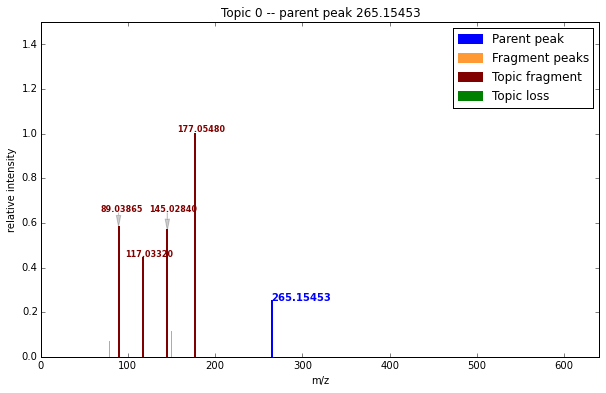

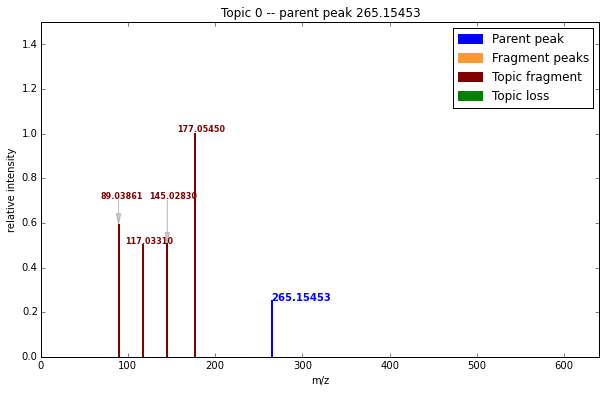

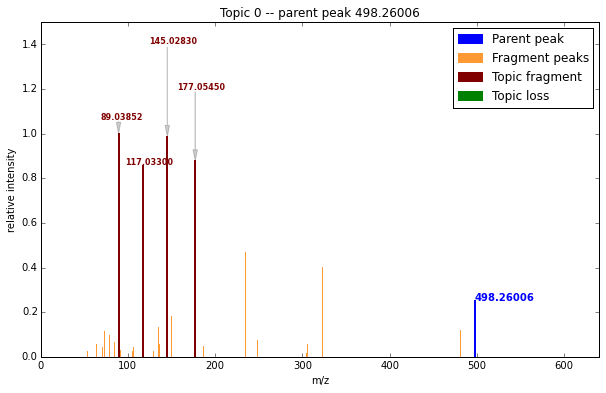

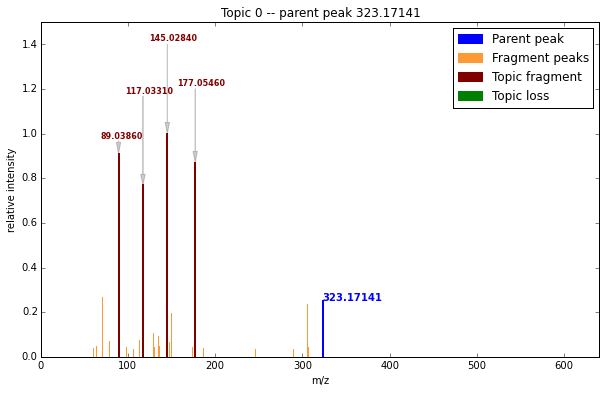

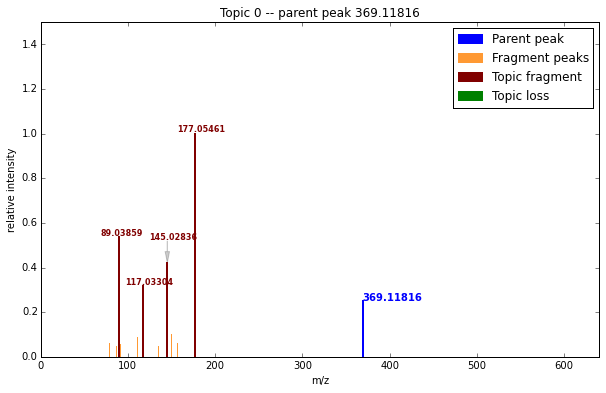

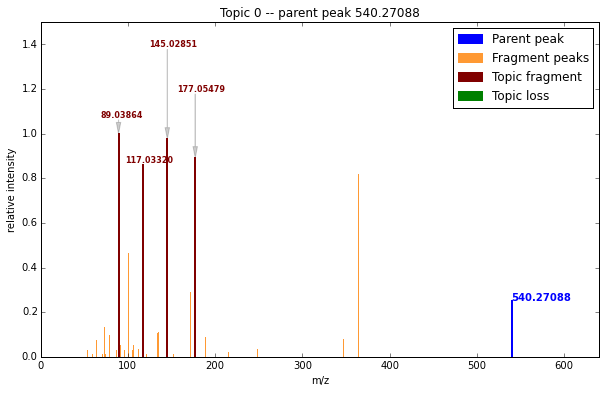

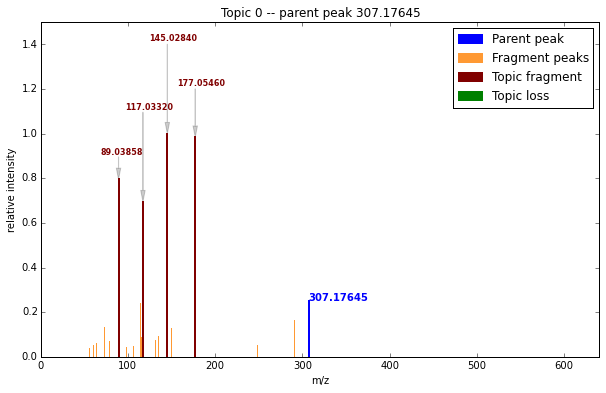

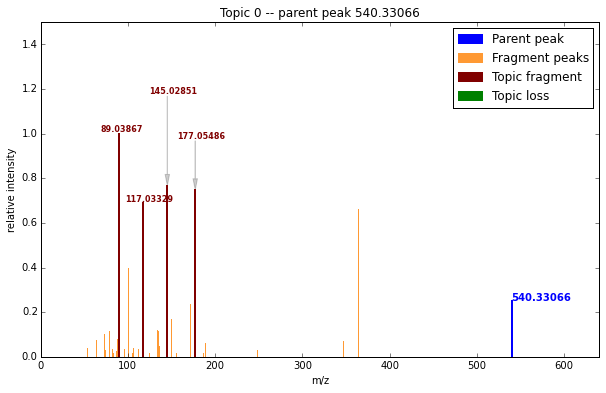

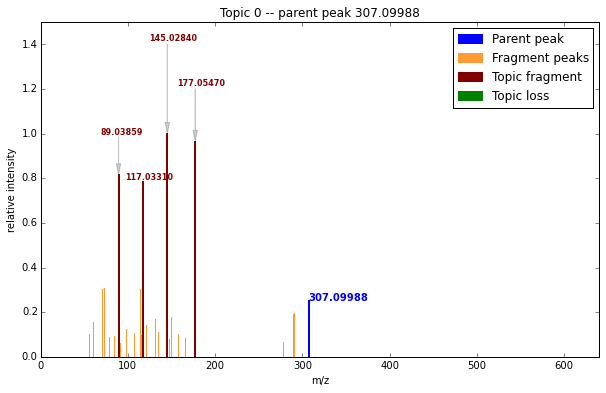

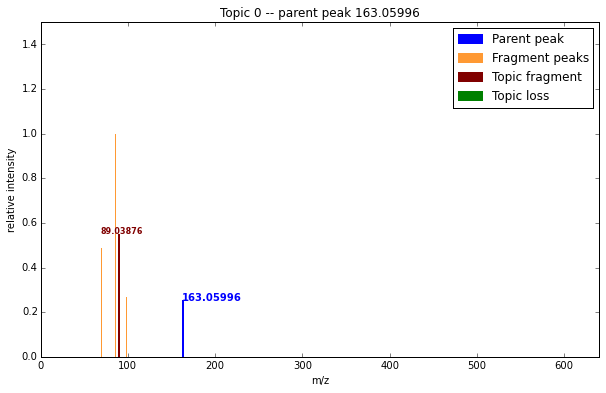

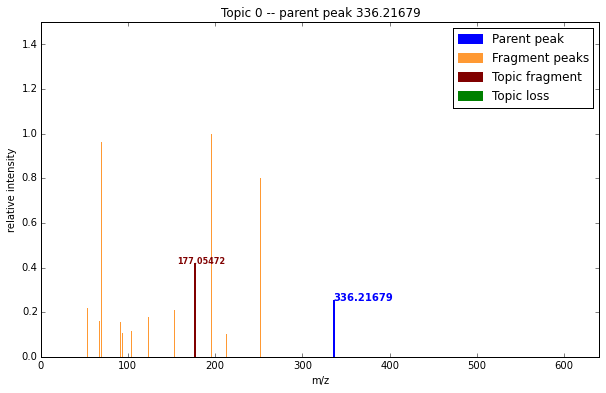

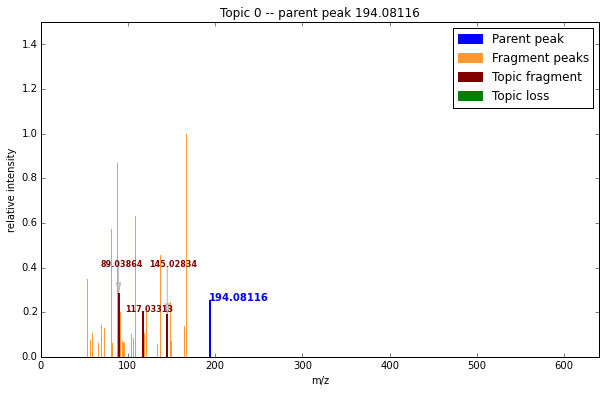

Topic 5 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    6345 	259.09236	482.456		2.661e+07	0.674
2    590  	449.23550	205.410		5.878e+05	0.595
3    1430 	301.21216	238.237		1.911e+06	0.521
4    6723 	261.14447	459.215		6.398e+05	0.309
5    5483 	199.10775	390.305		2.520e+06	0.295
6    7822 	311.12365	570.233		6.113e+05	0.283
7    1704 	273.18064	254.771		3.041e+06	0.264
8    6954 	316.16158	513.775		1.136e+06	0.242
9    7732 	233.11320	564.091		6.652e+05	0.235
10   7785 	259.12881	559.317		1.632e+06	0.186
11   6221 	355.16116	435.357		3.710e+06	0.166
12   10504	276.15782	595.502		9.881e+05	0.163
13   6505 	189.12327	502.727		6.290e+05	0.155
14   8266 	191.10254	598.691		1.518e+07	0.138
15   4972 	275.16005	414.504		1.319e+06	0.134
16   6654 	315.12980	504.302		8.902e+05	0.118
17   9981 	218.14991	842.342		2.771e+06	0.113
18   8617 	147.07636	630.413		2.536e+07	0.110
19   4971 	275.15999	313.268		5.063e+05	0.101
20   7081 	258.10828	493.109		1.199e+07	0.066
21   7082 	258.1

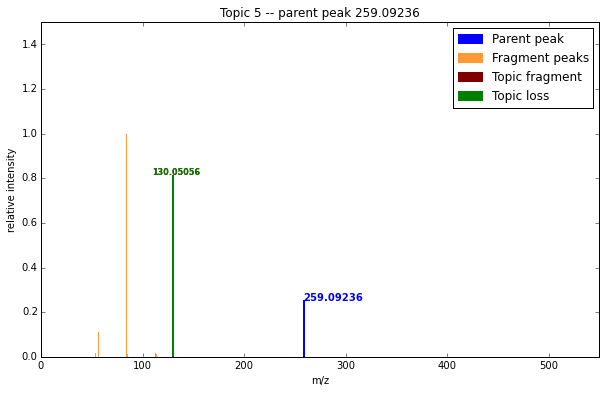

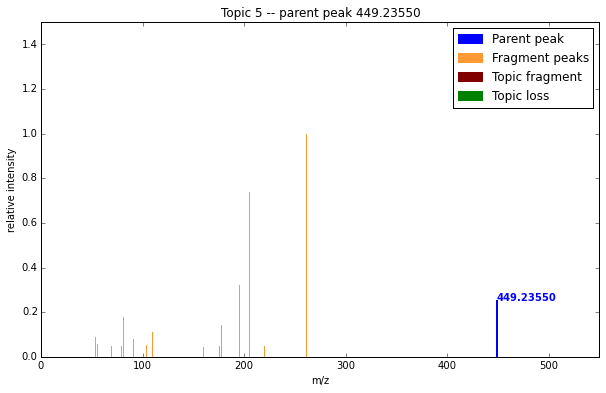

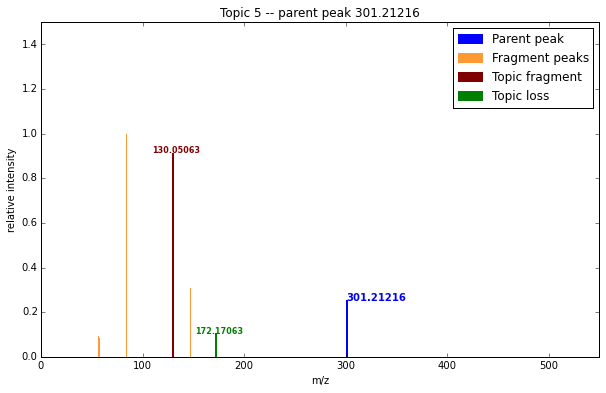

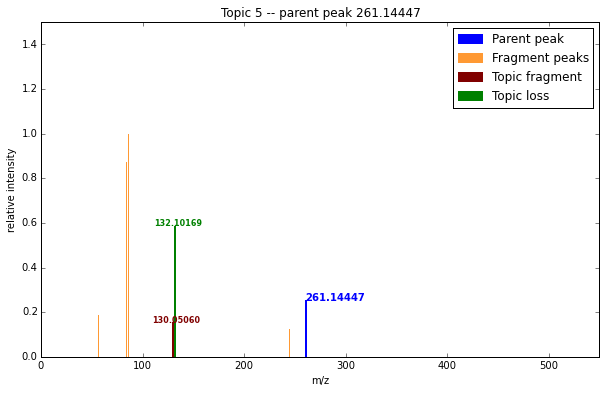

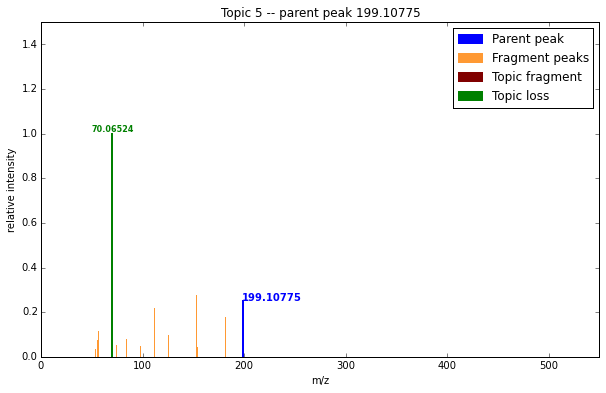

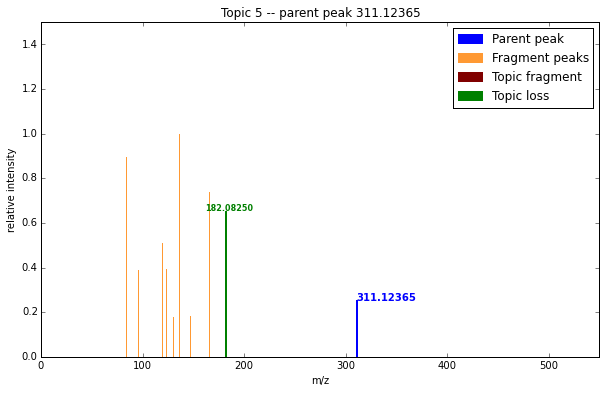

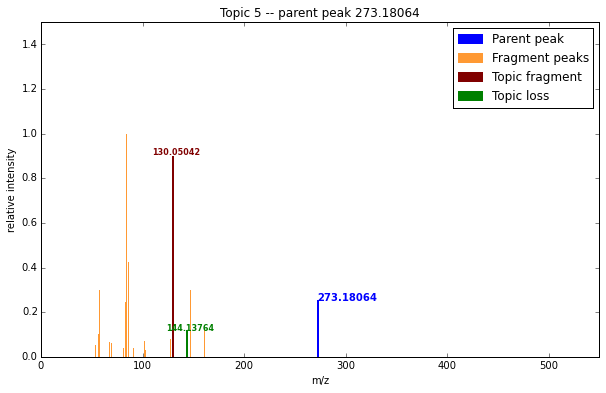

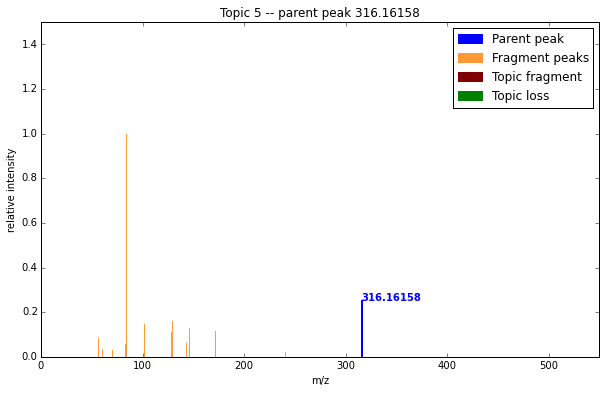

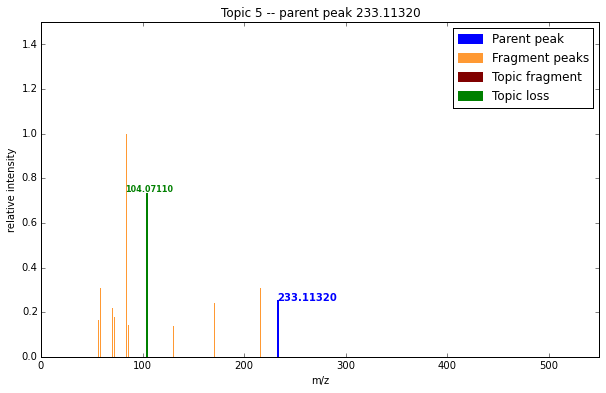

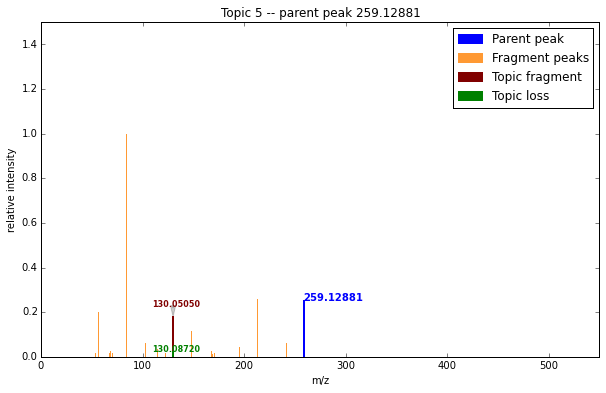

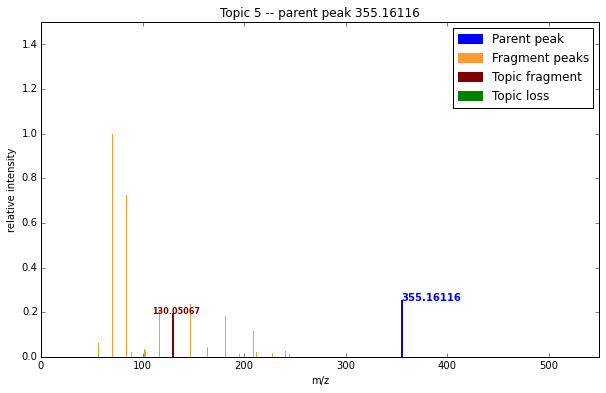

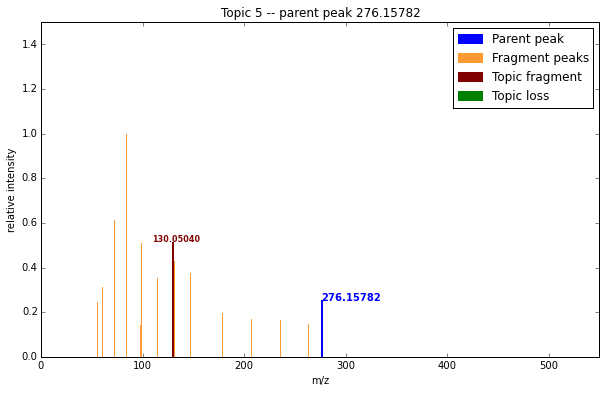

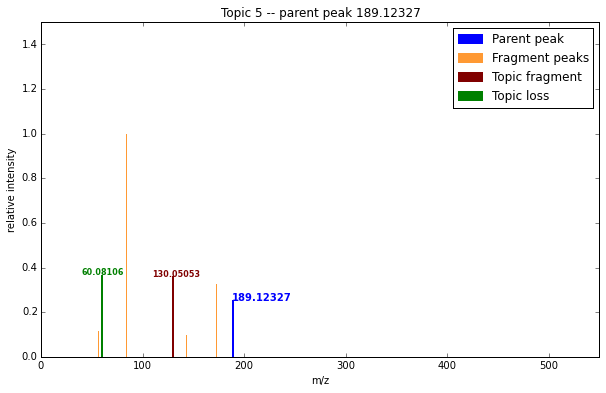

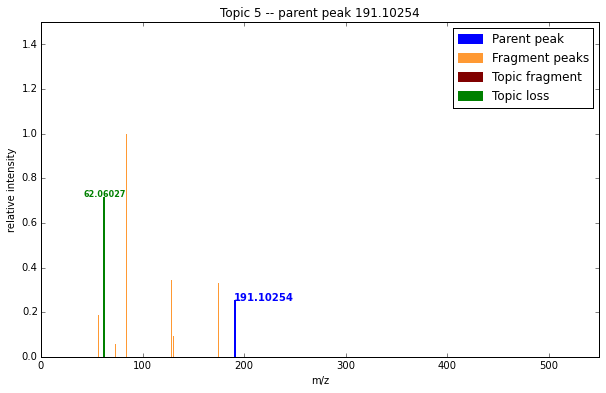

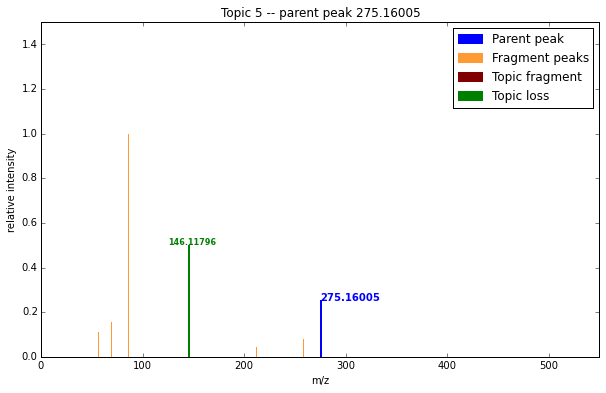

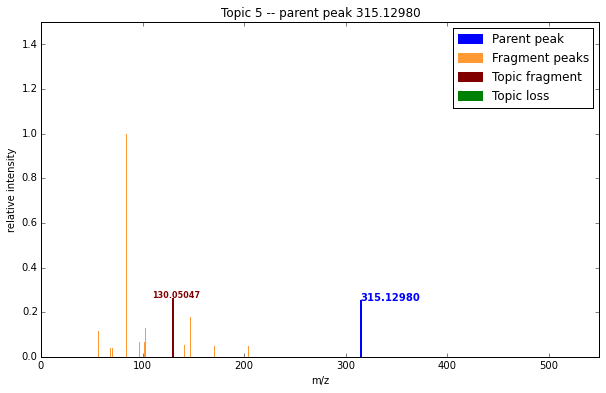

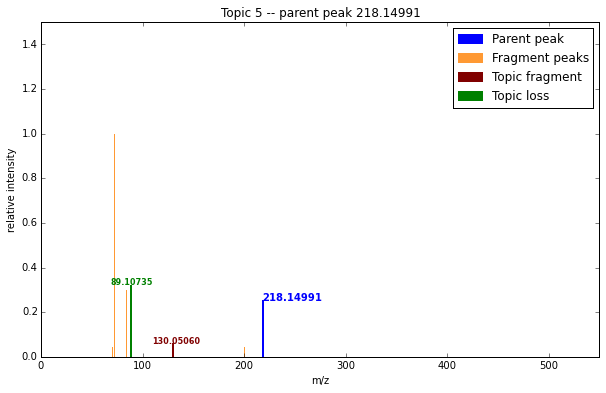

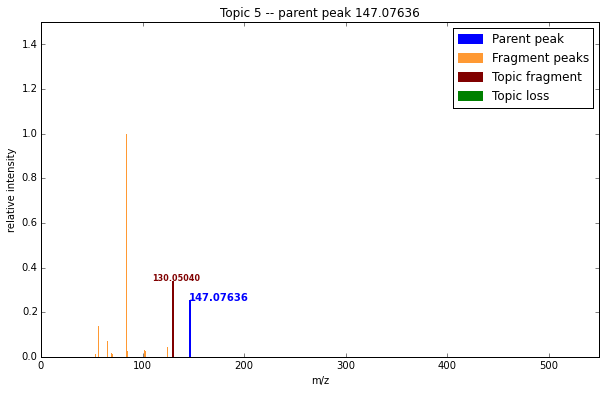

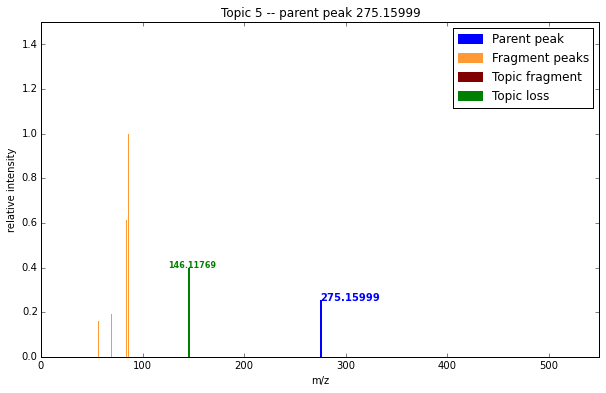

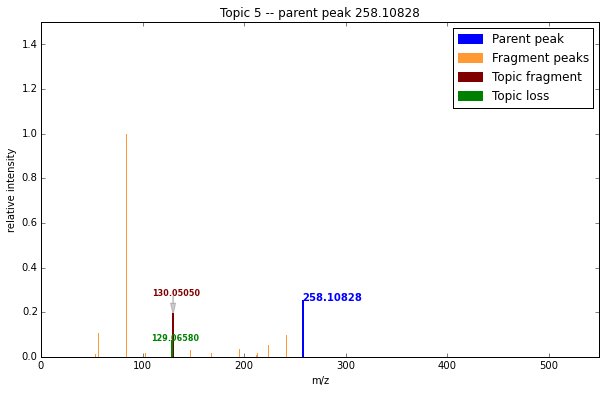

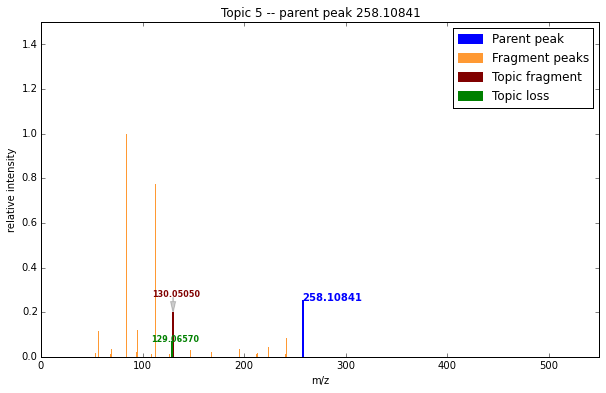

Topic 20 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    6593 	490.19215	452.947		5.970e+05	0.644
2    6349 	328.13907	419.222		2.445e+07	0.595
3    6592 	490.19202	491.538		2.827e+06	0.592
4    5777 	310.12846	372.653		7.748e+05	0.534
5    7115 	166.08624	499.470		1.505e+07	0.471
6    1323 	292.19063	221.946		5.747e+05	0.450
7    6387 	240.12291	382.238		7.140e+05	0.357
8    3995 	277.11822	290.983		7.819e+05	0.344
9    5636 	166.12268	282.730		8.102e+05	0.326
10   2816 	471.22375	289.342		3.912e+05	0.251
11   4389 	245.12838	325.502		1.871e+06	0.209
12   4387 	245.12839	282.730		4.700e+06	0.194
13   4388 	245.12839	369.407		1.629e+06	0.189
14   7117 	166.08629	290.983		6.524e+05	0.172
15   5024 	194.08116	372.653		2.269e+06	0.108
16   3297 	277.15831	299.240		7.832e+05	0.096
17   6512 	252.08650	499.470		8.493e+05	0.078
18   4664 	162.05831	277.930		5.678e+06	0.076
19   6380 	198.11248	387.071		3.185e+06	0.075
20   3768 	236.11278	241.536		1.771e+07	0.072
21   2387 	307.

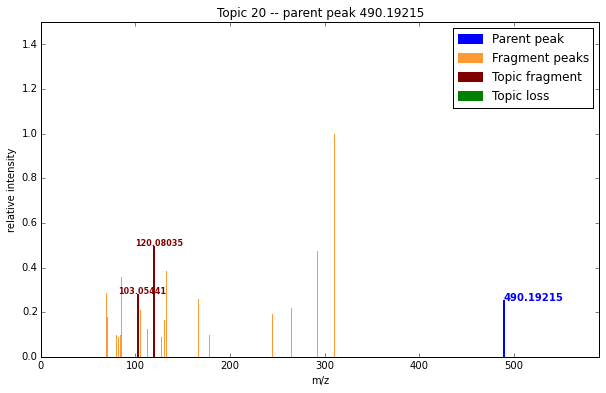

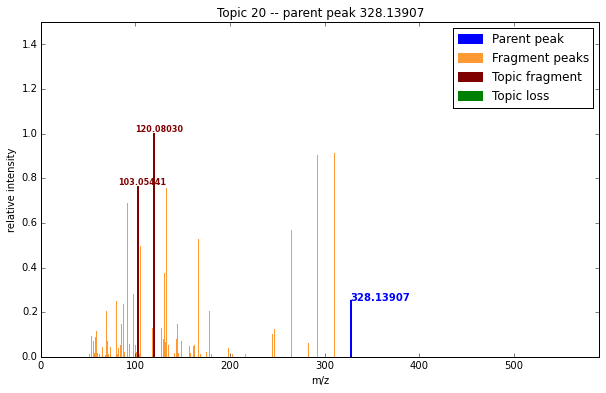

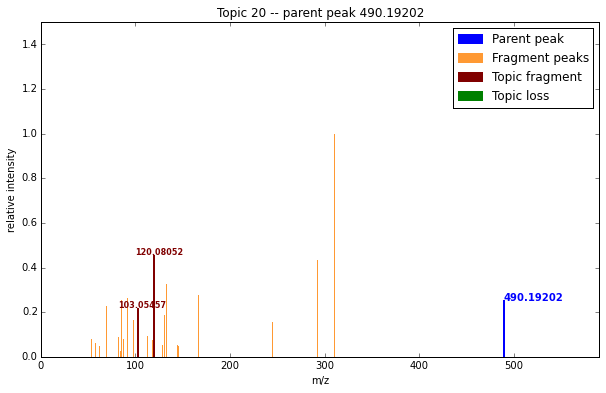

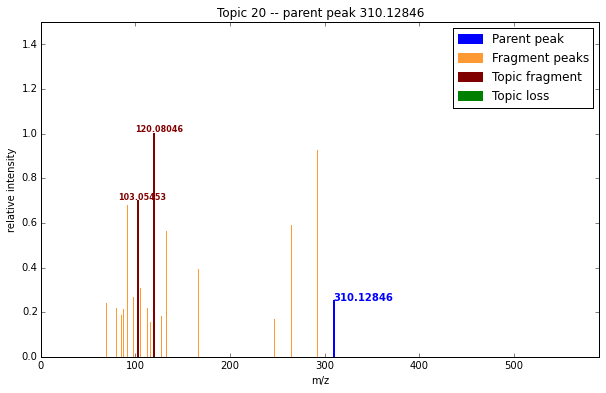

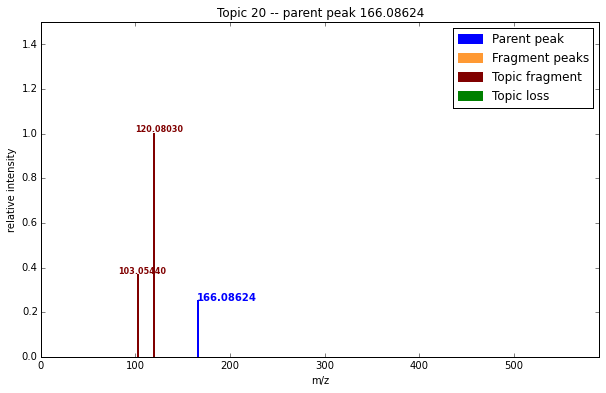

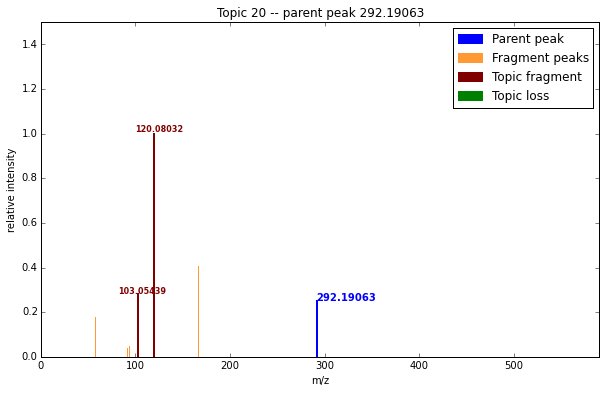

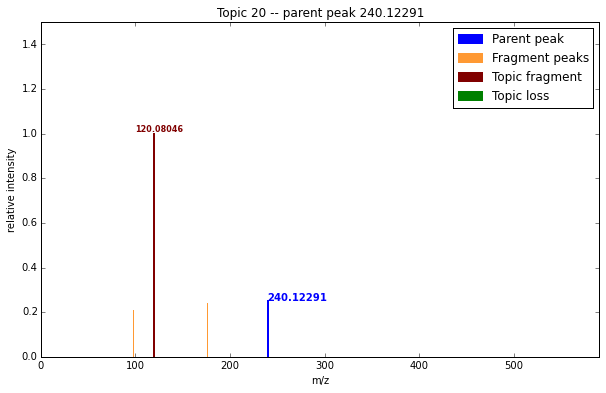

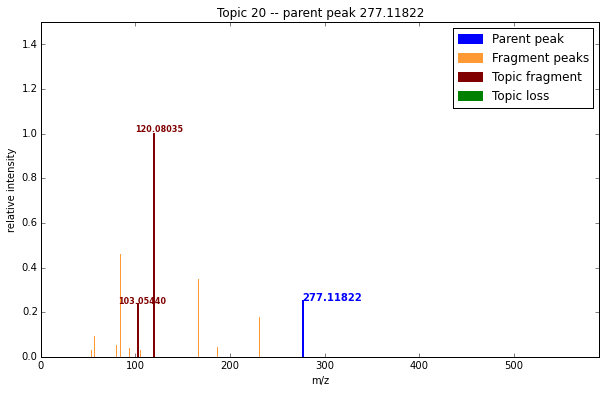

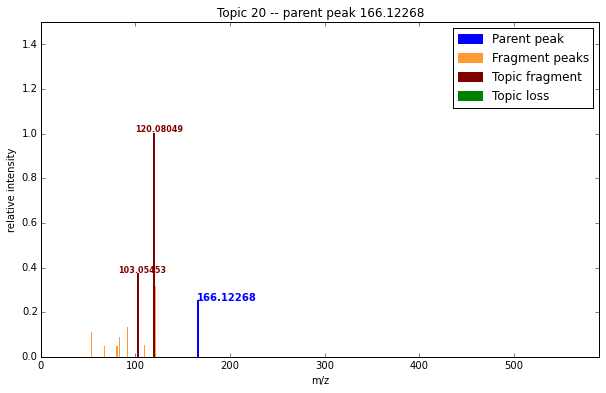

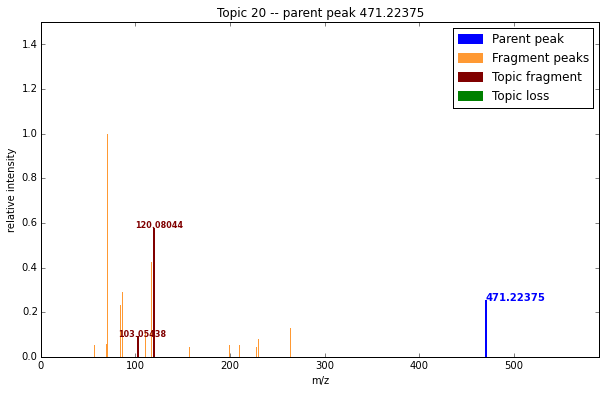

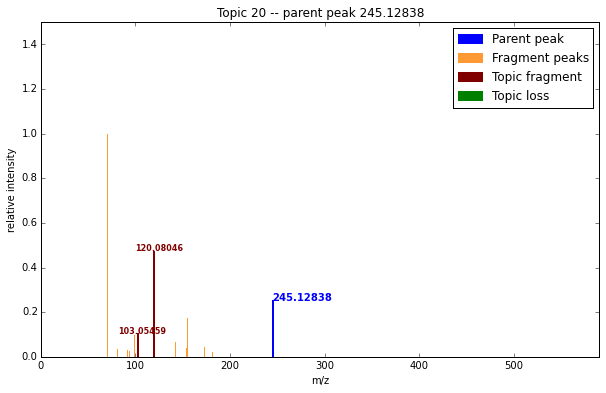

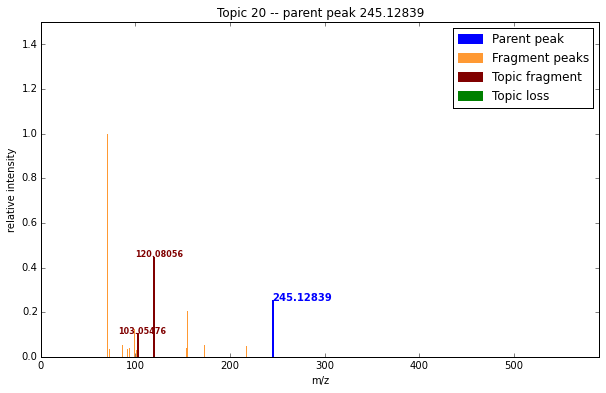

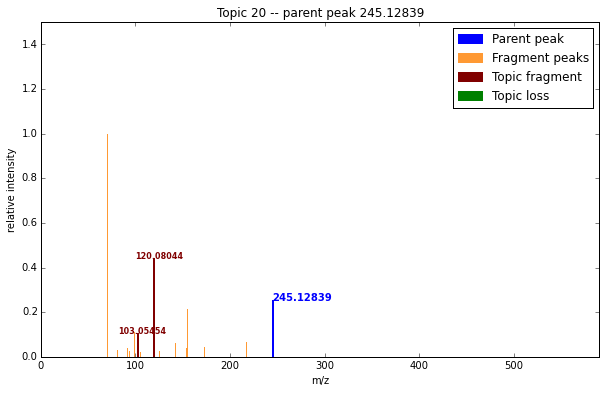

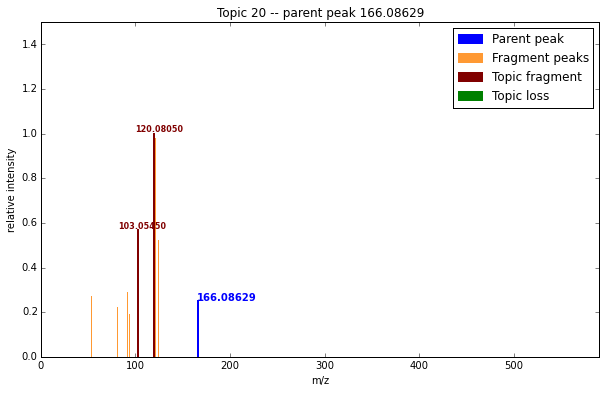

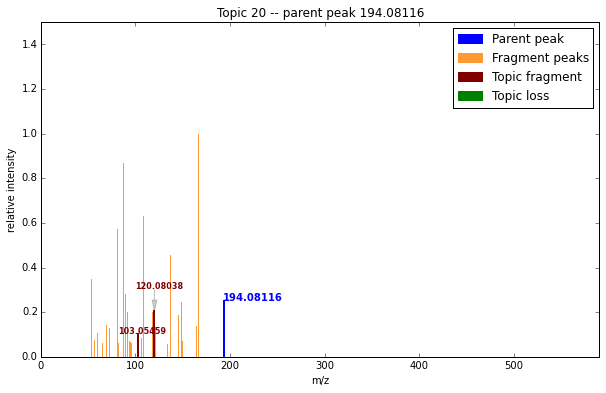

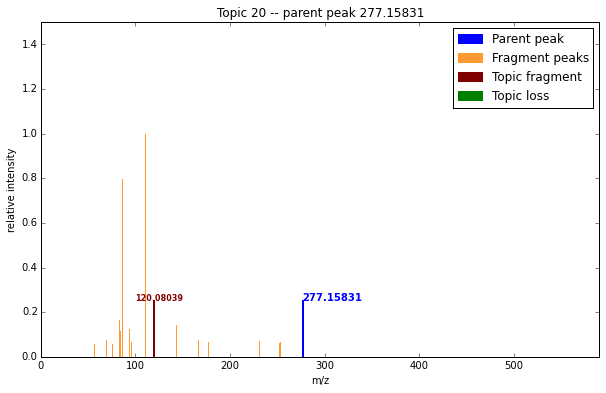

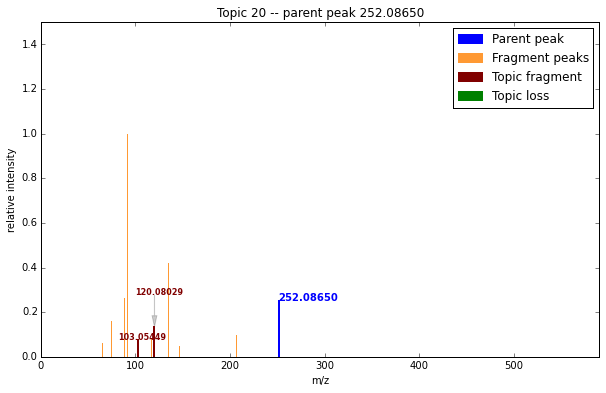

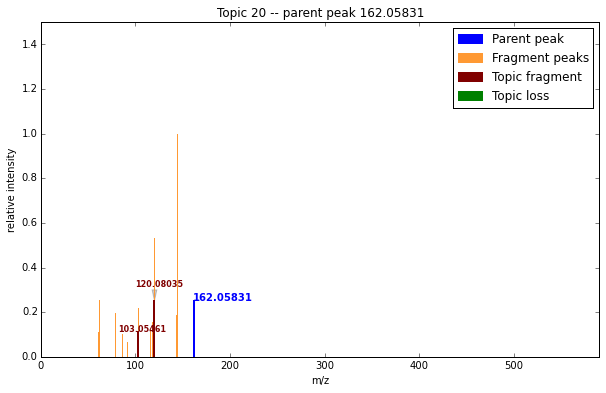

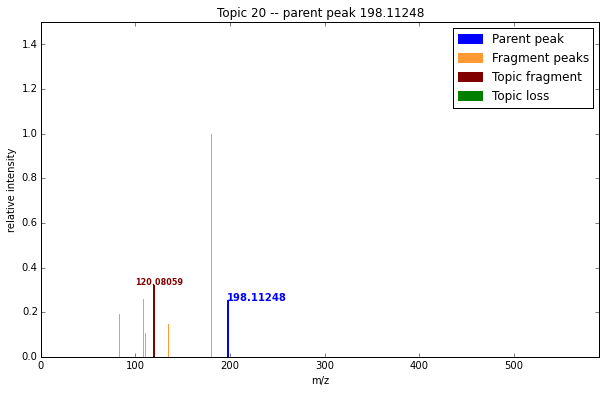

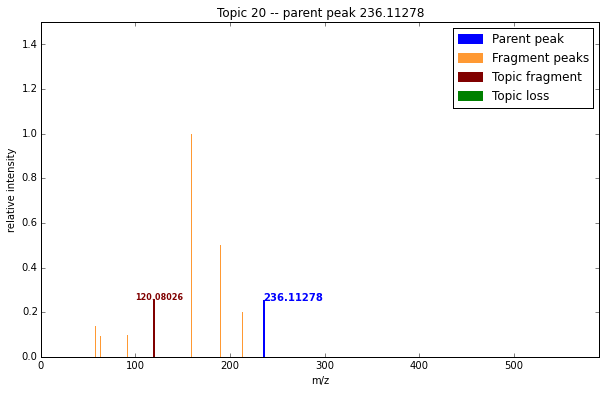

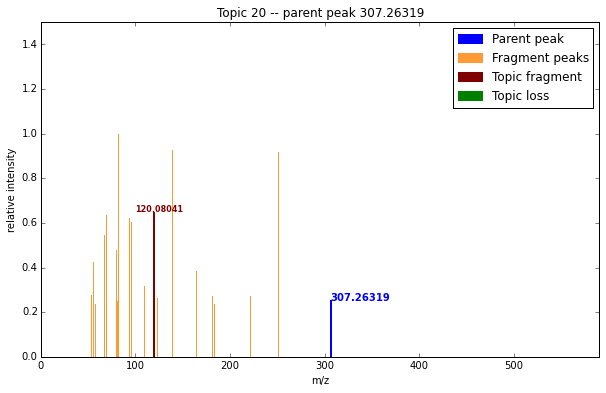

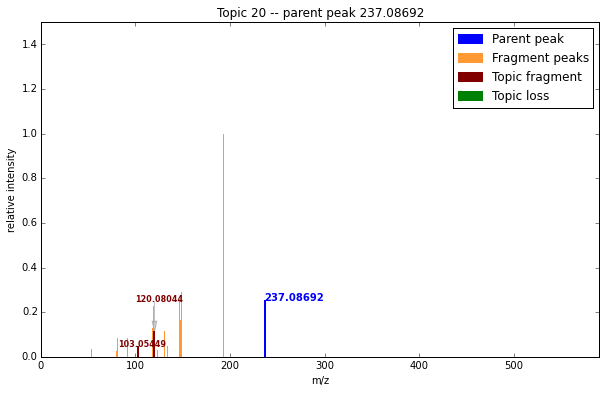

Topic 21 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    10391	134.08113	662.160		2.677e+06	1.119
2    4086 	184.06046	266.414		7.590e+06	0.681
3    4087 	184.06051	362.957		4.007e+05	0.669
4    5605 	254.10217	348.358		7.909e+05	0.553
5    5604 	254.10218	330.420		7.728e+05	0.510
6    5603 	254.10221	294.270		4.091e+05	0.417
7    5602 	254.10219	372.653		1.255e+06	0.264
8    6186 	170.08113	435.357		3.969e+07	0.224
9    10392	148.09678	843.717		3.449e+05	0.169
10   9260 	175.02371	689.621		5.798e+05	0.114
11   6546 	247.09232	502.727		9.222e+05	0.089
12   7684 	274.09193	536.439		3.015e+07	0.082
13   7968 	282.11815	554.431		1.383e+07	0.076

Fragments

1    fragment_148.03977 (0.073)
 peakID  MSnParentPeakID  mz          rt       intensity
 15920   4086             148.039821  276.574  0.772658 
 15924   4087             148.039749  364.169  1.000000 
2    fragment_166.04983 (0.067)
 peakID  MSnParentPeakID  mz          rt       intensity
 15919   4086             166.049

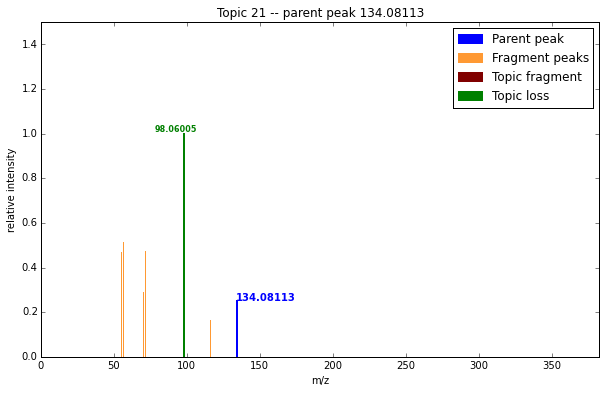

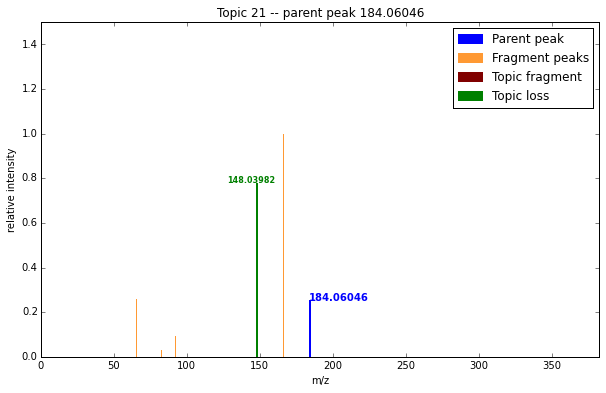

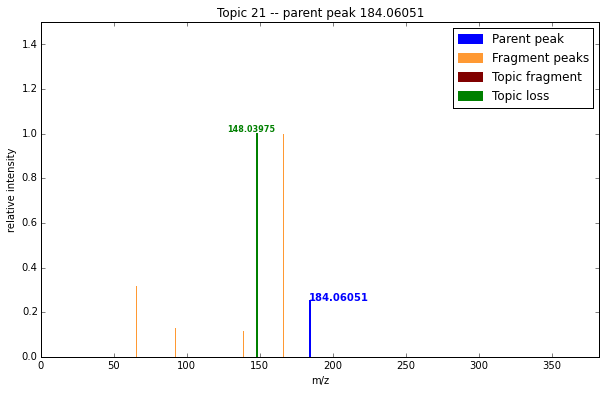

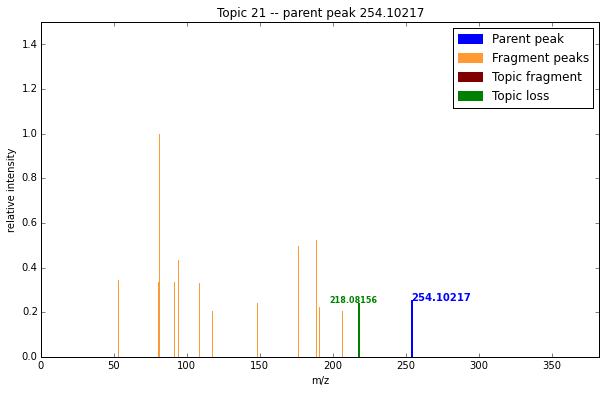

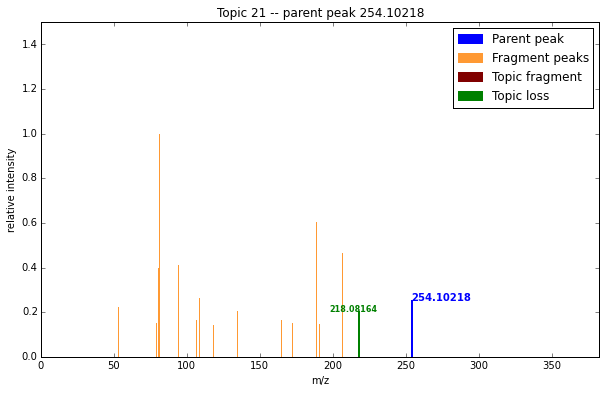

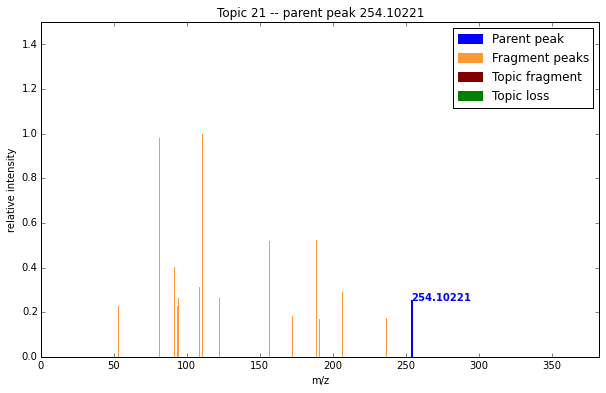

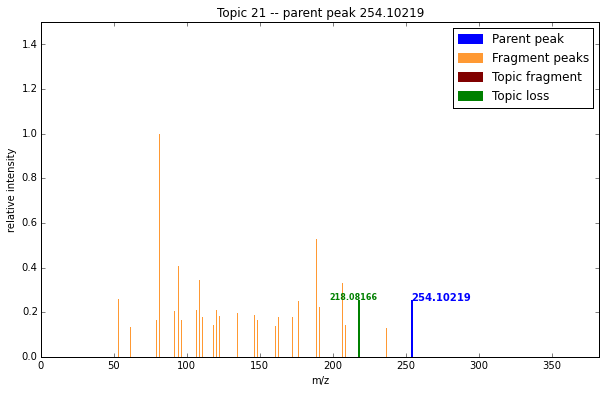

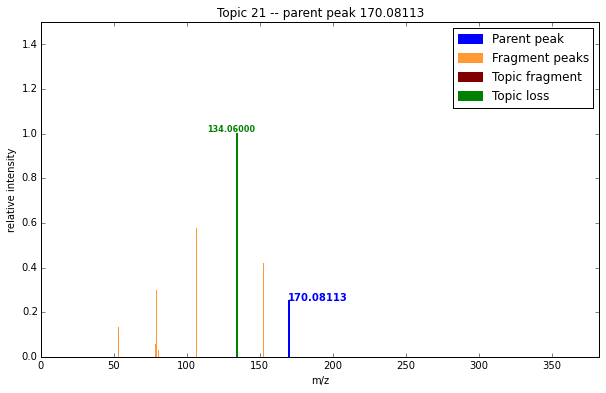

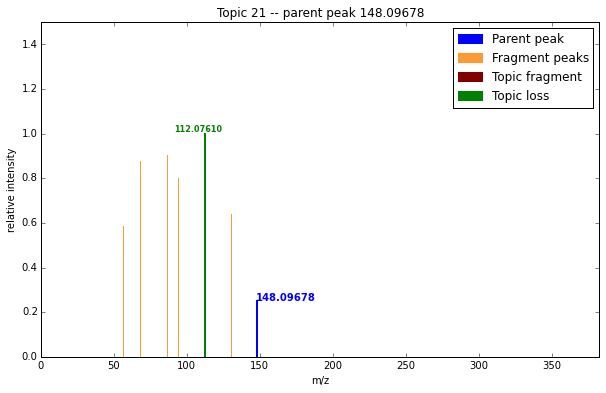

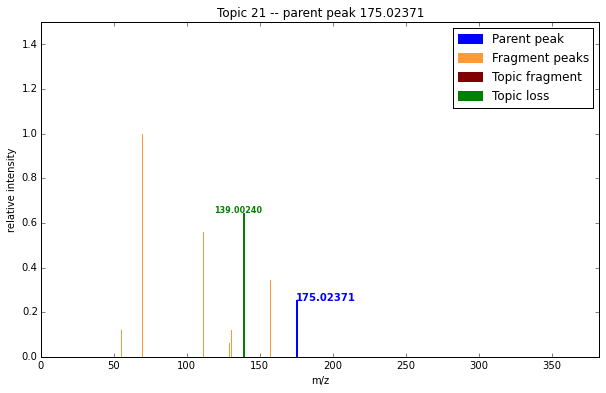

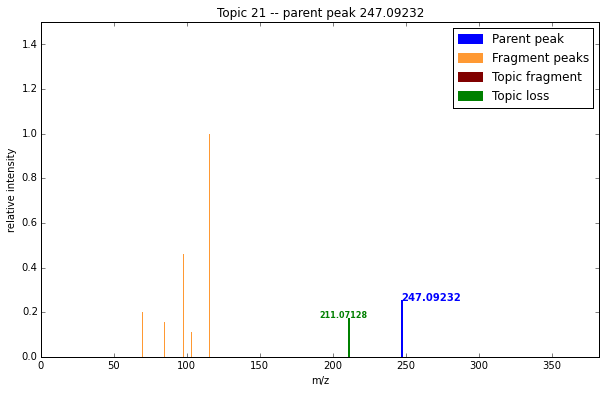

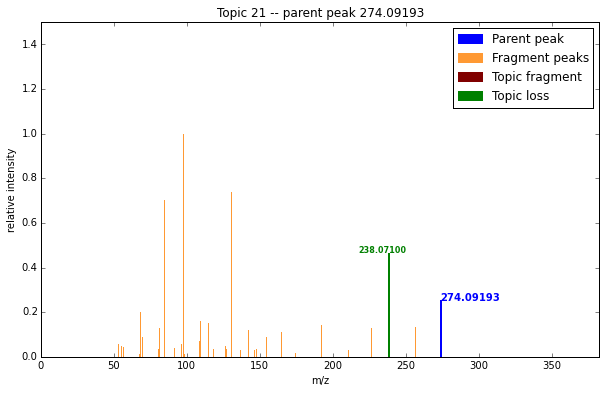

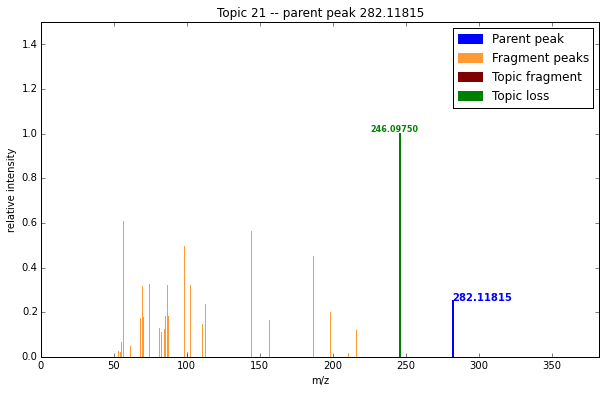

Topic 27 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    7180 	137.04582	438.661		6.213e+06	1.675
2    7179 	137.04578	512.170		5.750e+07	1.631
3    7216 	136.06172	496.313		5.973e+08	1.100
4    5678 	123.05532	414.504		8.612e+06	0.908
5    7181 	137.04581	482.456		4.707e+07	0.890
6    8587 	152.05660	589.081		1.627e+08	0.748
7    5348 	180.08794	443.301		1.570e+06	0.153

Fragments

1    fragment_110.03459 (0.168)
 peakID  MSnParentPeakID  mz        rt       intensity
 20351   7179             110.0346  515.680  1        
 20358   7180             110.0346  443.707  1        
 22372   8587             110.0346  592.579  1        
2    fragment_119.03519 (0.147)
 peakID  MSnParentPeakID  mz        rt       intensity
 20352   7179             119.0351  515.680  0.949456 
 20359   7180             119.0351  443.707  0.689031 
 20523   7216             119.0352  495.018  1.000000 
3    fragment_55.02948 (0.136)
 peakID  MSnParentPeakID  mz         rt       intensity
 17115   5

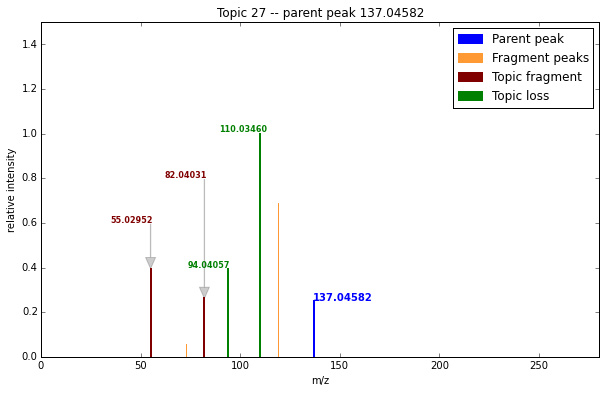

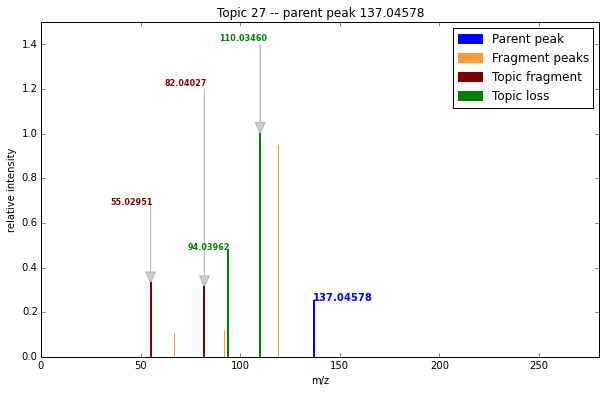

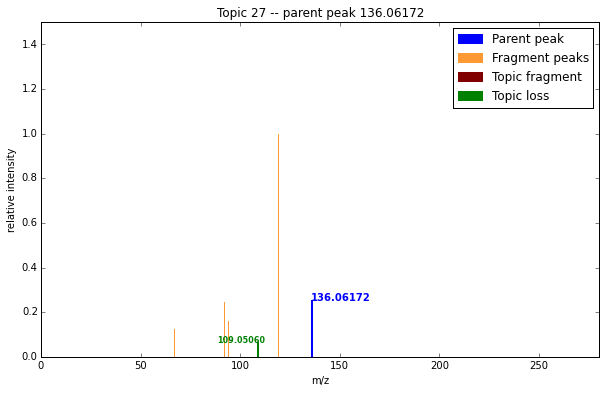

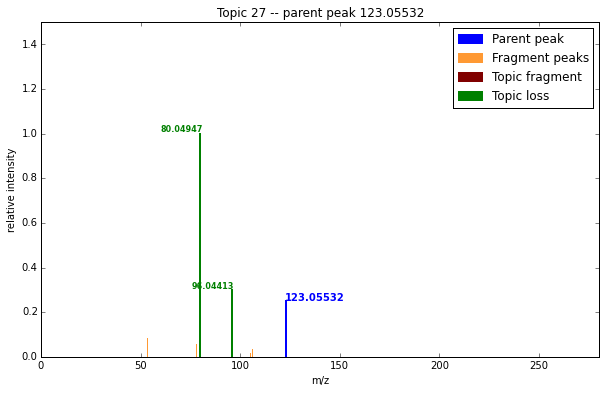

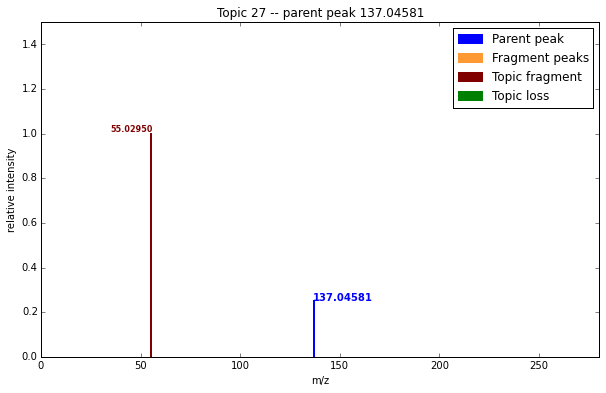

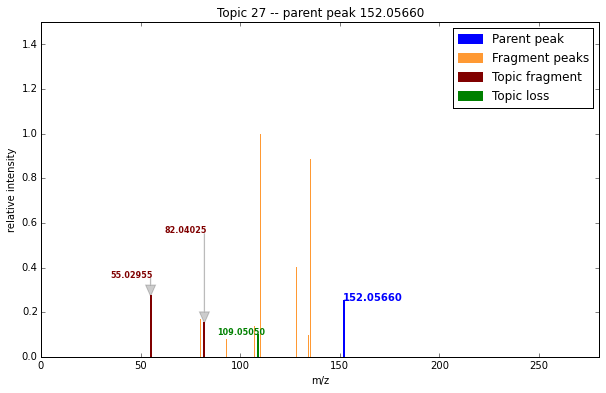

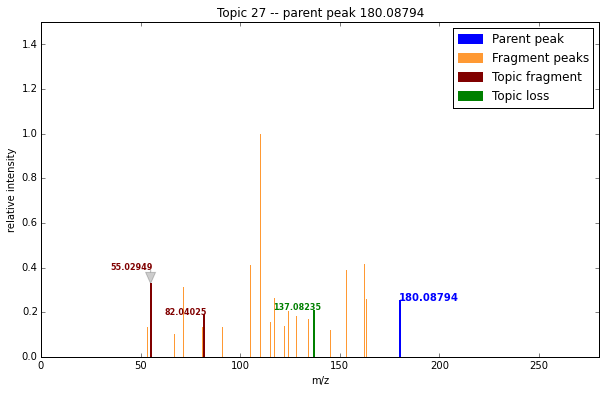

In [39]:
persisted_topics  = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]

# remove the selected_topics parameter to plot for all topics
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", selected_topics=persisted_topics)

Let's say we want to set all the top-10 topics from beer3pos above (or whatever defined in the *persisted_topics* variable) and run the LDA using them again on beer2.

First we need to save the state of the LDA model that we just ran on  beer3pos. Below line will create two more files: the dumped model state (*beer3pos.model*) and the list of vocabularies of the 'words' used for the persisted topics (*beer3pos.vocab*). These files are written to the same location as the output matrices, i.e. in the *results/beer3_pos_rel* folder relative to this notebook.

In [42]:
model_filename = 'results/beer3_pos_rel/beer3pos.model'
vocab_filename = 'results/beer3_pos_rel/beer3pos.vocab'
ms2lda.save_model(persisted_topics, model_filename, vocab_filename)

Model saved to results/beer3_pos_rel/beer3pos.model
Words written to results/beer3_pos_rel/beer3pos.vocab


2. LDA on Beer2 with persistent topics from Beer3
------------------------------------------------------

First we load the previously saved model of beer3.

In [62]:
from lda_cgs import CollapseGibbsLda
beer3_model = CollapseGibbsLda.load(model_filename)
if hasattr(beer3_model, 'selected_topics'):
    print "Persistent topics = " + str(beer3_model.selected_topics)

Model loaded from results/beer3_pos_rel/beer3pos.model
Persistent topics = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]


Now we have to go to R and run the feature extraction script (*MS1MS2_MatrixGeneration_default_7ppm_specPeaks.R*) on the Beer2pos data. <font color='red'>**This step has to be manually done for now .. although we should automate it as part of the pipeline later.**</font>

Specifically in the R script, set the following parameter (that specifies the vocabulary list of the persistent topics)

    prev_words_file <- '/home/joewandy/git/metabolomics_tools/justin/notebooks/results/beer3_pos_rel/beer3pos.vocab'

and re-run sections in the R-script that does feature extractions .. from the "Data filtering" part onwards.

<hr/>

When running the LDA on beer2pos, there's now the additional parameter *previous_model* that needs to be passed in. Also, the total number of topics are now 135. The persistent topics (10) come first, and the remaining new topics (125) are appended after them. 

In [63]:
fragment_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_losses_rel.csv'
mzdiff_filename = None
ms1_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_ms2_rel.csv'

ms2lda = Ms2Lda(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                ms1_filename, ms2_filename, relative_intensity=True)
df, vocab = ms2lda.preprocess()
ms2lda.run_lda(df, vocab, n_topics, n_samples, n_burn, n_thin, 
               alpha, beta, use_own_model=True, use_native=True, previous_model=beer3_model)

Data shape (935, 2002)
Fitting model...
CGS LDA initialising
Total no. of topics = 135
..............................................................................................
Using JIT for LDA sampling
Burn-in 1 ..............................................................................................
Burn-in 2 ..............................................................................................
Burn-in 3 ..............................................................................................
Burn-in 4 ..............................................................................................
Burn-in 5 ..............................................................................................
Burn-in 6 ..............................................................................................
Burn-in 7 ..............................................................................................
Burn-in 8 ..............................................

In [64]:
ms2lda.write_results('beer2_pos_rel')

Writing topics to results/beer2_pos_rel/beer2_pos_rel_topics.csv
Writing fragments x topics to results/beer2_pos_rel/beer2_pos_rel_all.csv
Writing topic docs to results/beer2_pos_rel/beer2_pos_rel_docs.csv


3. Beer2 Results
------------------

The persisted topics from previous LDA run are placed first in list of topics of the new LDA run, so so old topic 57 becomes new topic 0, old topic 87 is new topic 1, etc.

In [69]:
old_persisted_index = beer3_model.selected_topics
new_persisted_index = range(len(beer3_model.selected_topics))

print "in beer3pos = " + str(old_persisted_index)
print "in beer2pos = " + str(new_persisted_index)

in beer3pos = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]
in beer2pos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


If we show the ranking of the top-10 topics in beer2pos by the H-index, we see that the persisted topics from beer3 aren't very high up the list, i.e. we don't see topics 0 - 9 there.

In [72]:
topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='h_index', top_N=10)

Topic Ranking

Topic 89 h-index=7
Topic 39 h-index=6
Topic 67 h-index=6
Topic 2 h-index=5
Topic 12 h-index=5
Topic 20 h-index=5
Topic 23 h-index=5
Topic 29 h-index=5
Topic 31 h-index=5
Topic 107 h-index=5



We can also plot the fragments in topics 0 - 9 in beer2pos.

Topic Ranking

Topic 2 h-index=5
Topic 1 h-index=1
Topic 7 h-index=1
Topic 8 h-index=1
Topic 0 h-index=0
Topic 3 h-index=0
Topic 4 h-index=0
Topic 5 h-index=0
Topic 6 h-index=0
Topic 9 h-index=0

Topic 2 h-index=5

Parent peaks

     peakID	mz		rt		int		score
1    7403 	300.12900	552.500		9.136e+05	0.192
2    7860 	214.09200	588.117		2.448e+06	0.136
3    8806 	492.19246	649.530		1.199e+06	0.129
4    10340	198.09720	624.751		1.267e+07	0.125
5    9093 	1008.36157	694.133		1.490e+06	0.103
6    9042 	991.33440	690.972		6.074e+05	0.085
7    9112 	649.21892	681.141		7.487e+05	0.085
8    5913 	441.20808	465.379		8.923e+05	0.080
9    9431 	342.13955	703.902		2.484e+06	0.056
10   9434 	325.11276	664.059		2.027e+07	0.052

Fragments

1    fragment_73.02851 (0.194)
 peakID  MSnParentPeakID  mz         rt       intensity
 19675    5913            73.028522  466.625  0.041509 
 23239    7860            73.028480  584.330  0.272459 
 24755    8806            73.028530  651.596  0.319391 
 25082    90

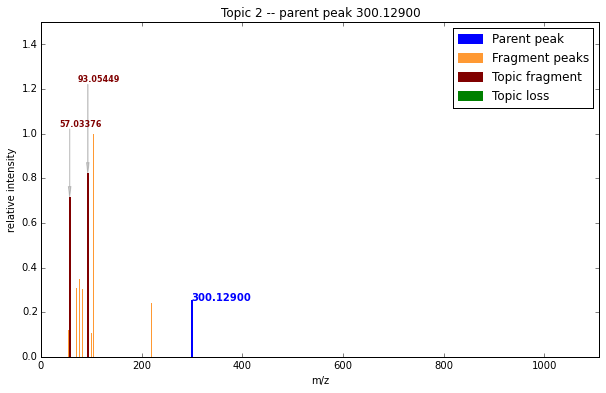

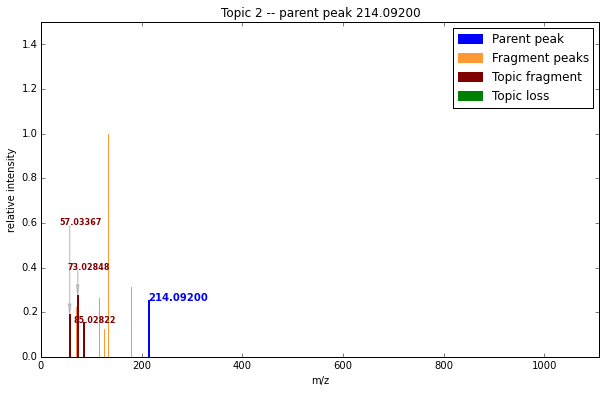

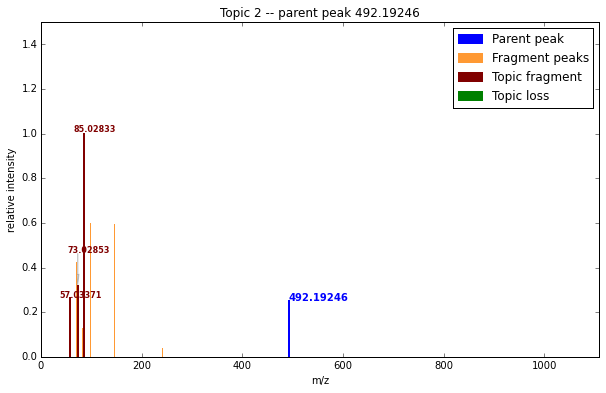

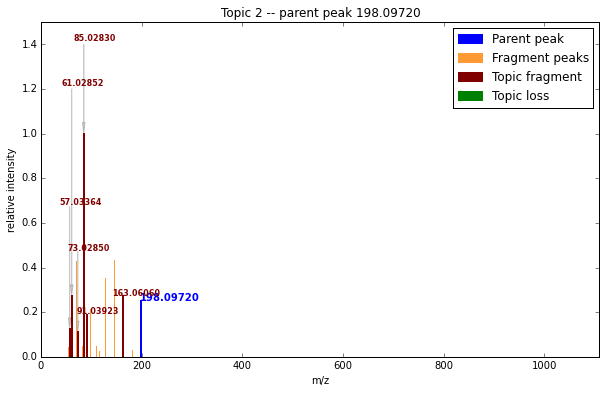

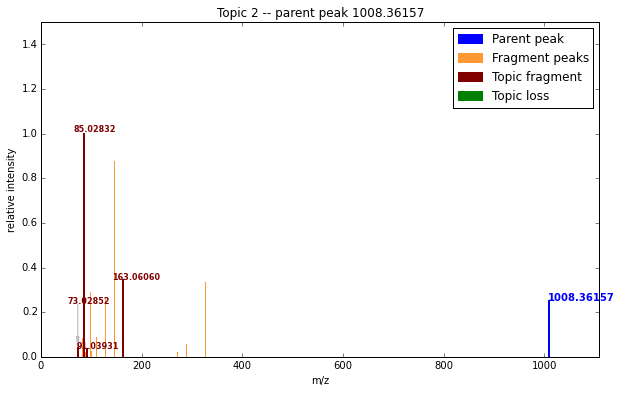

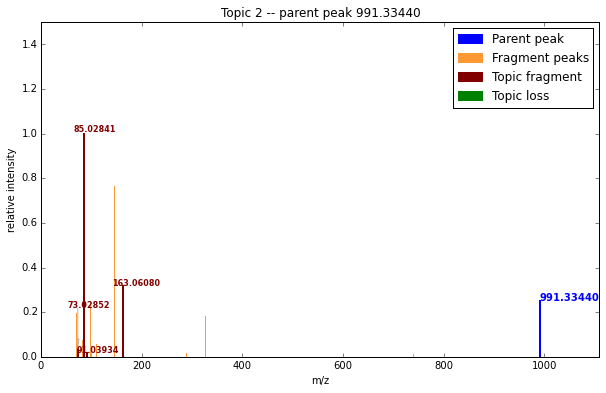

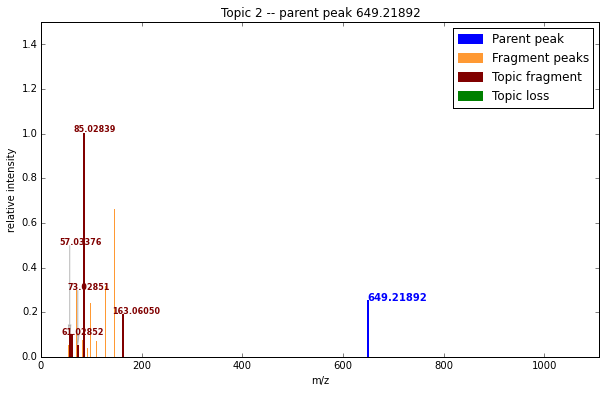

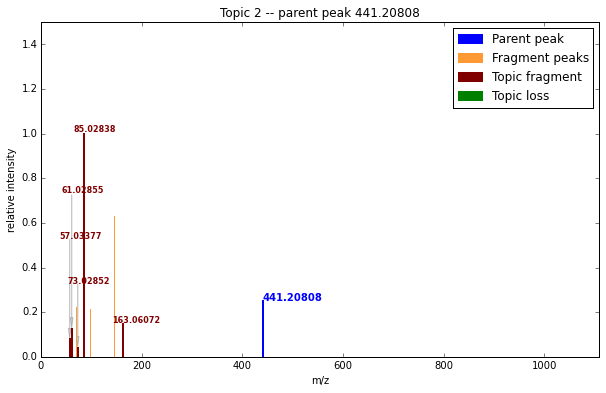

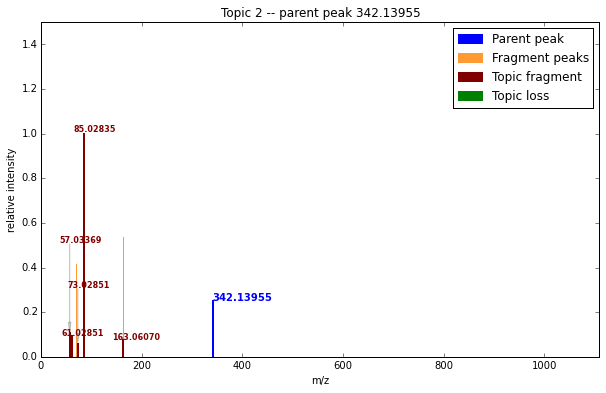

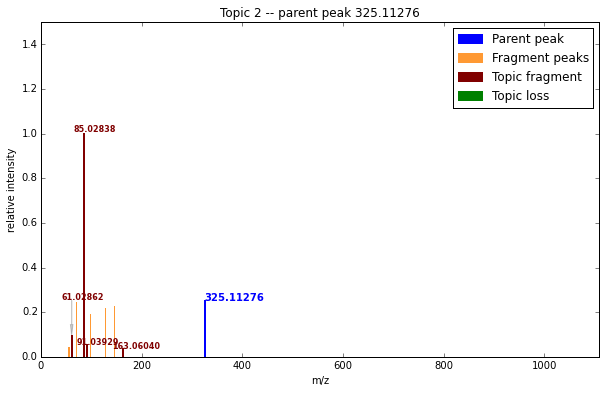

Topic 1 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    1388 	339.25300	218.709		1.412e+06	0.890
2    1931 	346.25885	255.160		1.784e+06	0.732
3    2245 	213.14851	250.237		2.499e+06	0.578
4    3475 	195.13800	248.573		2.014e+06	0.566
5    3183 	311.22185	242.007		9.006e+05	0.542
6    3680 	273.16946	282.939		4.126e+05	0.514
7    2436 	257.04200	240.313		1.688e+06	0.471
8    2433 	253.14329	233.680		7.799e+05	0.352
9    2611 	383.20637	286.131		4.974e+05	0.297
10   2730 	281.21098	238.662		2.269e+06	0.287
11   4407 	149.02334	240.313		1.241e+06	0.269
12   3340 	295.22675	237.010		2.092e+06	0.253
13   2691 	229.14352	246.909		1.342e+06	0.236
14   1427 	325.17746	230.330		6.916e+05	0.226
15   2569 	241.14333	243.655		7.007e+05	0.213
16   1330 	337.16461	243.655		8.284e+05	0.182
17   2107 	297.20608	246.909		4.270e+05	0.181
18   3736 	237.14840	217.043		1.179e+06	0.143
19   4047 	183.10162	250.237		5.127e+05	0.127
20   1728 	367.21158	212.106		2.103e+06	0.109
21   1988 	321.2

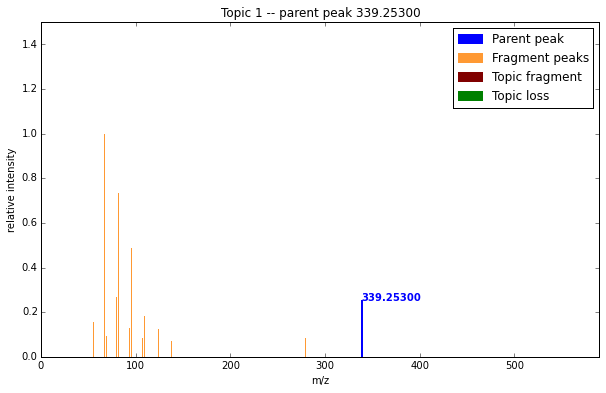

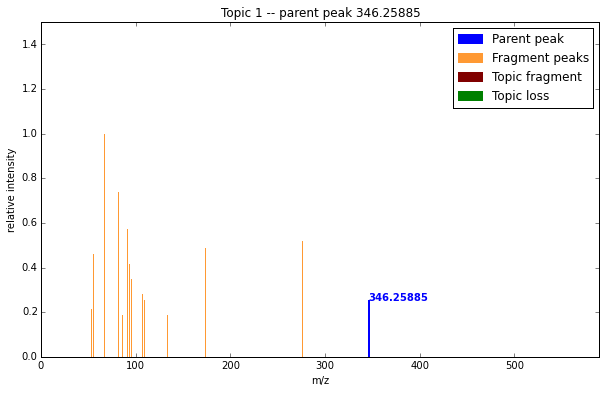

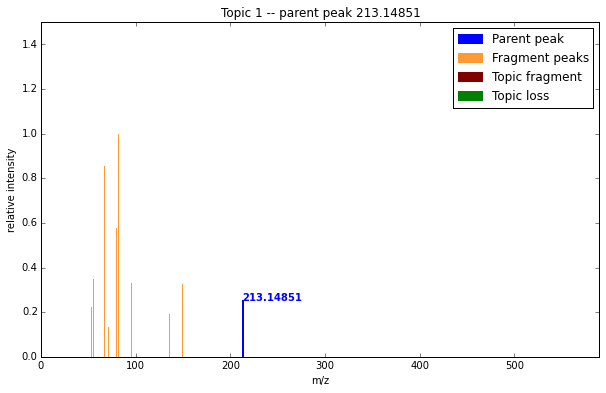

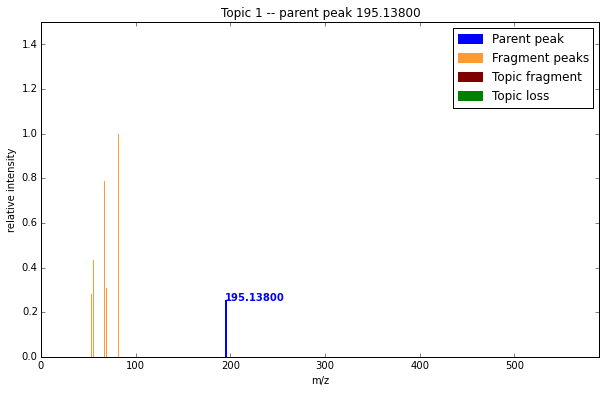

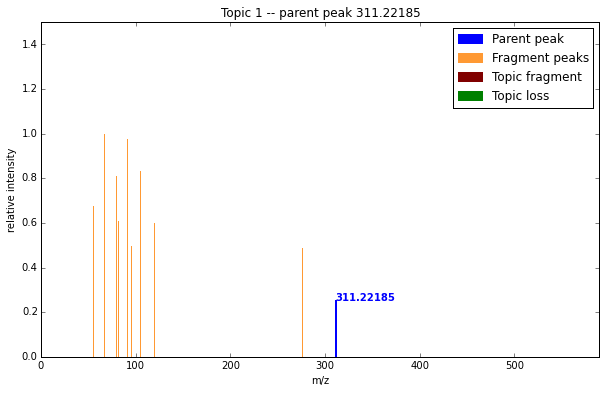

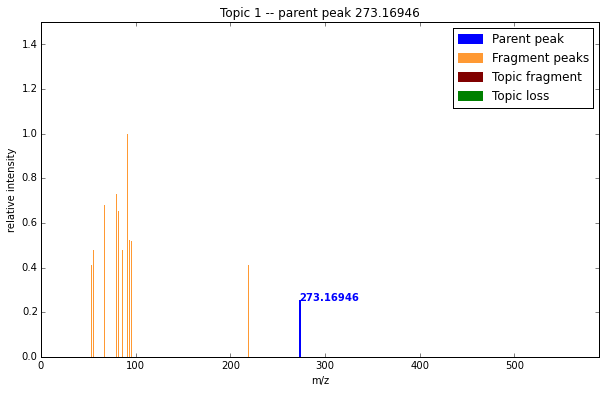

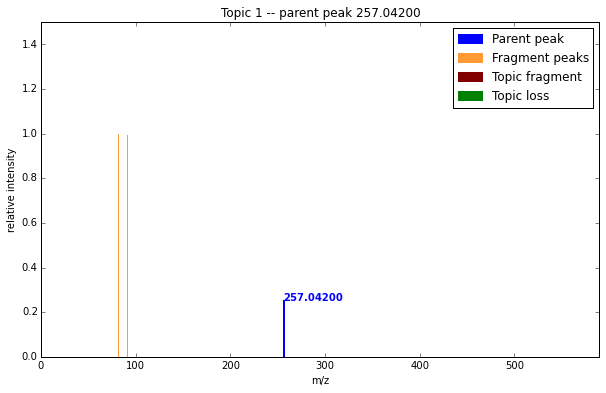

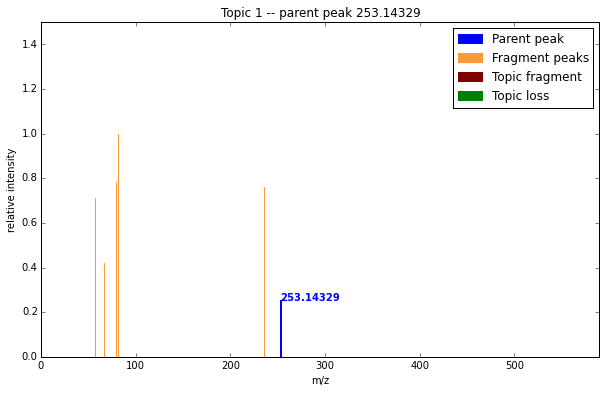

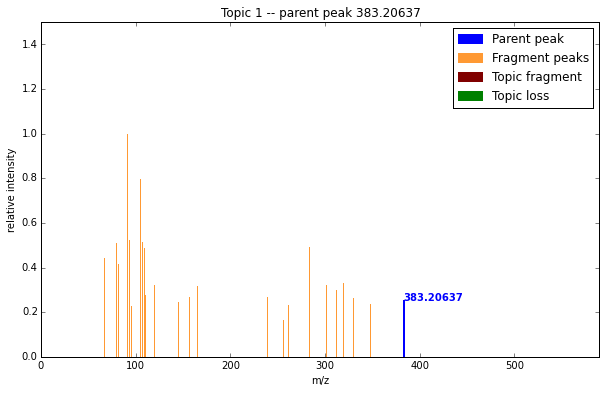

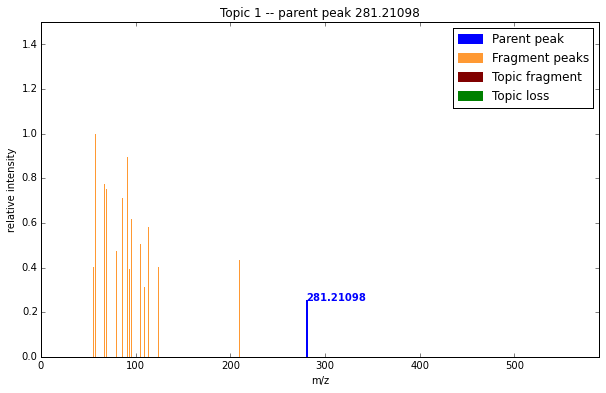

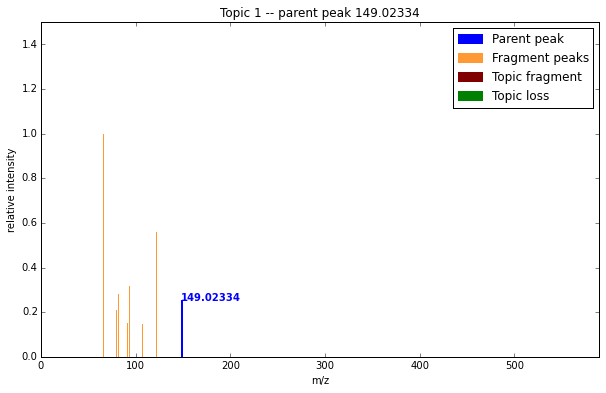

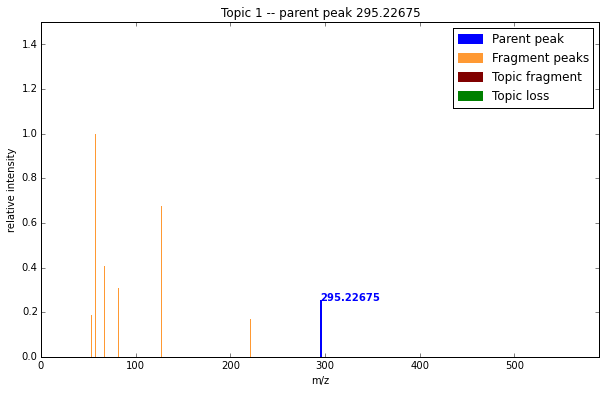

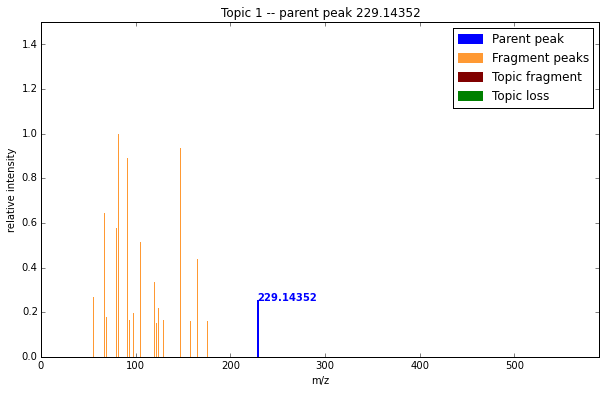

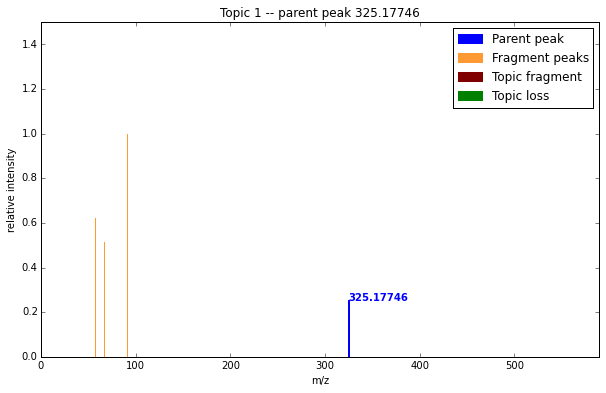

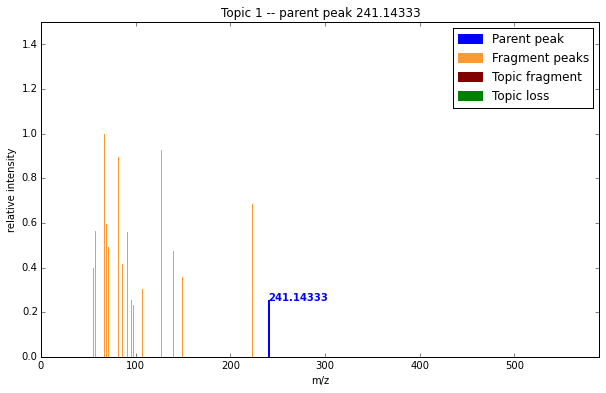

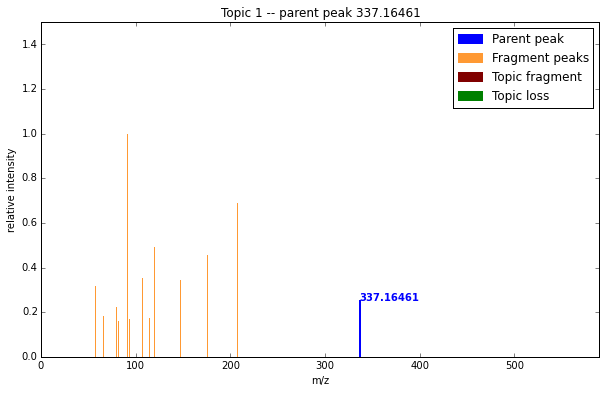

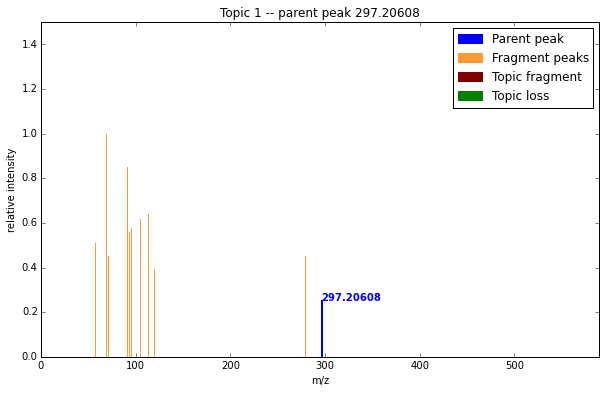

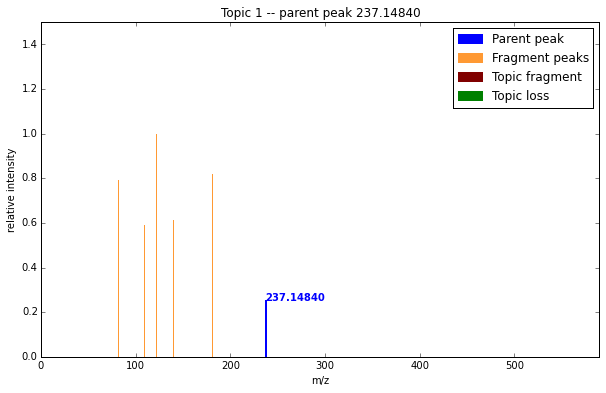

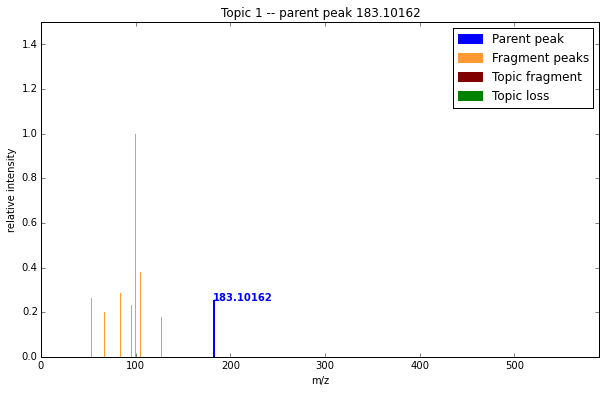

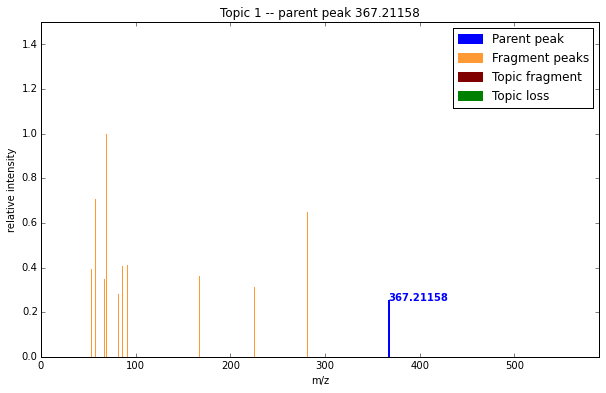

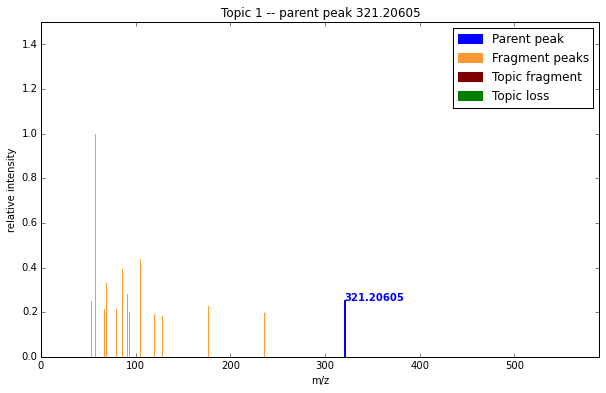

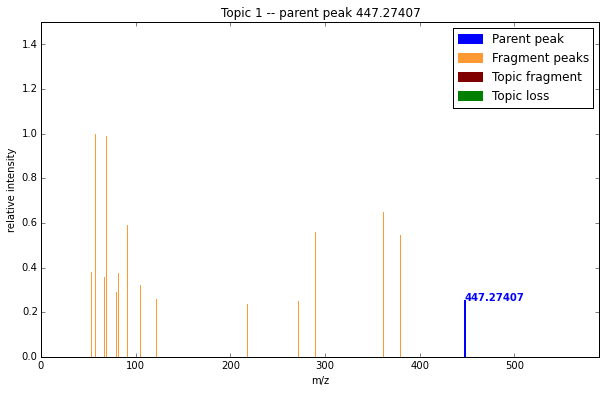

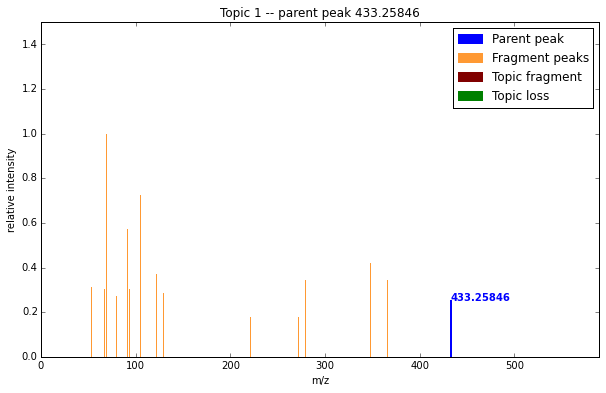

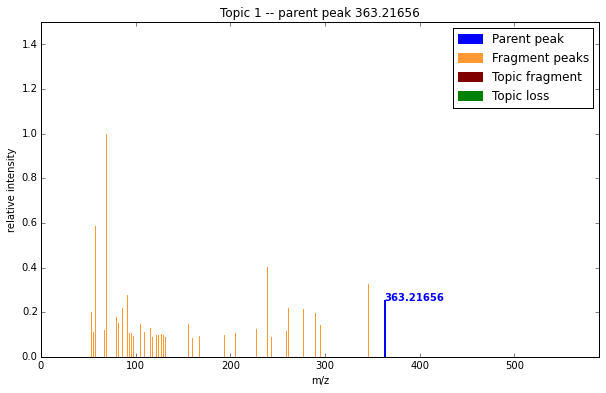

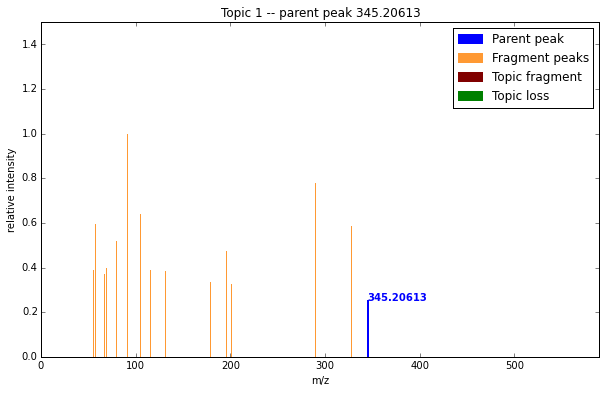

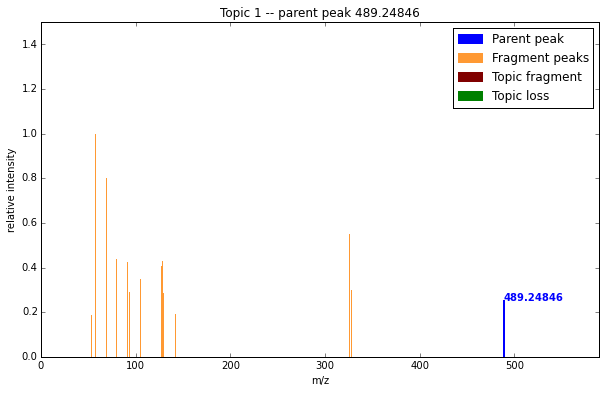

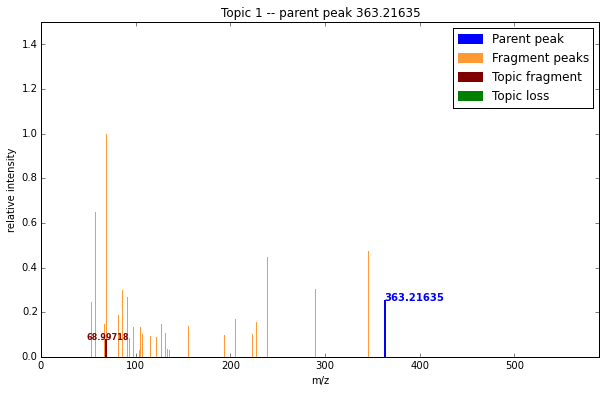

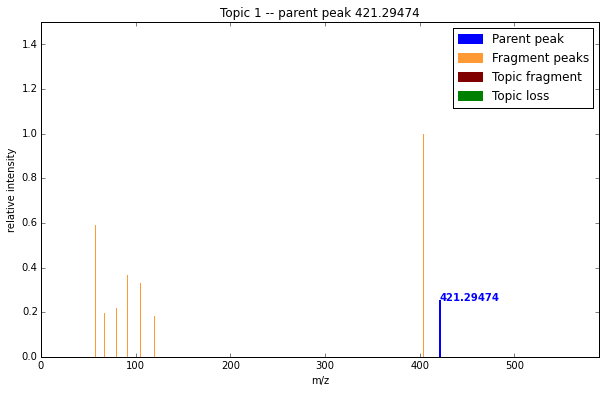

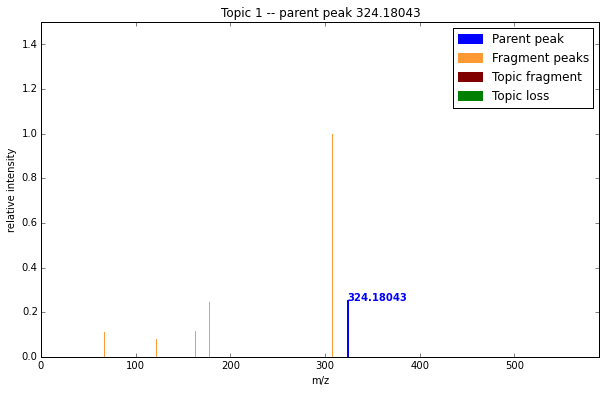

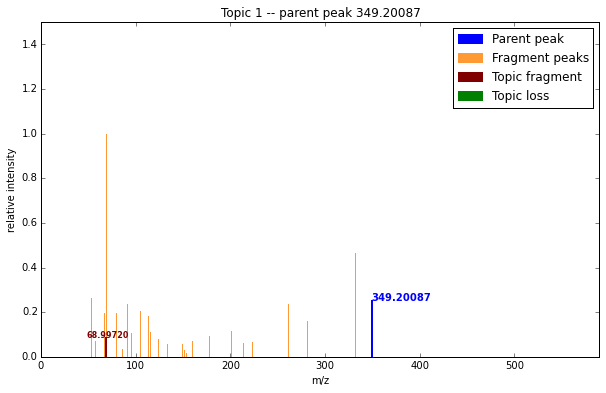

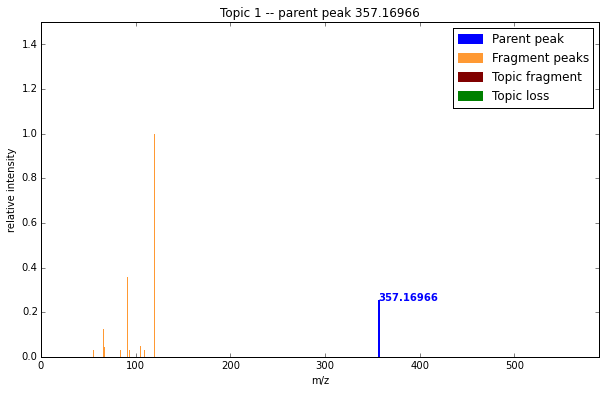

Topic 7 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    6394 	331.16541	499.238		1.274e+06	0.700
2    6511 	490.19210	491.304		5.122e+06	0.497
3    1032 	292.19058	222.062		1.071e+06	0.455
4    5970 	328.13912	377.831		5.954e+06	0.442
5    7150 	166.08625	499.238		4.231e+08	0.439
6    5969 	328.13898	444.585		3.647e+07	0.422
7    6446 	427.17098	499.238		7.143e+05	0.418
8    5898 	310.12847	377.831		7.961e+05	0.417
9    2578 	264.06315	273.176		9.721e+05	0.391
10   5896 	310.12850	444.585		4.209e+06	0.372
11   6395 	423.18744	495.959		6.178e+06	0.371
12   3031 	471.22404	296.049		5.861e+05	0.339
13   4917 	194.11762	260.073		3.151e+06	0.302
14   4147 	263.13890	299.332		1.463e+06	0.245
15   6488 	161.09206	499.238		1.787e+06	0.228
16   3661 	374.17097	296.049		1.466e+07	0.195
17   4428 	245.12838	358.372		3.929e+06	0.194
18   4786 	263.13872	408.302		1.491e+06	0.194
19   3662 	374.17088	359.967		1.212e+06	0.185
20   4430 	245.12836	324.176		2.806e+06	0.156
21   4429 	245.1

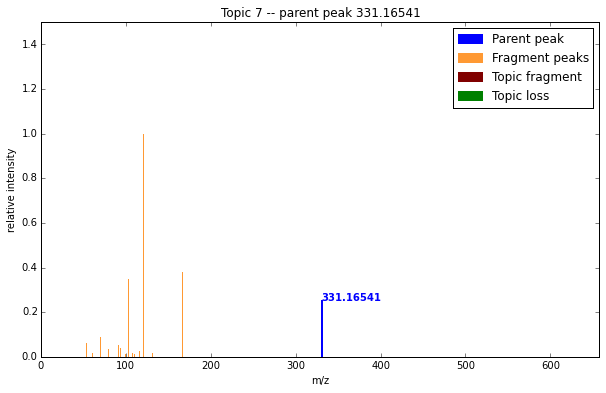

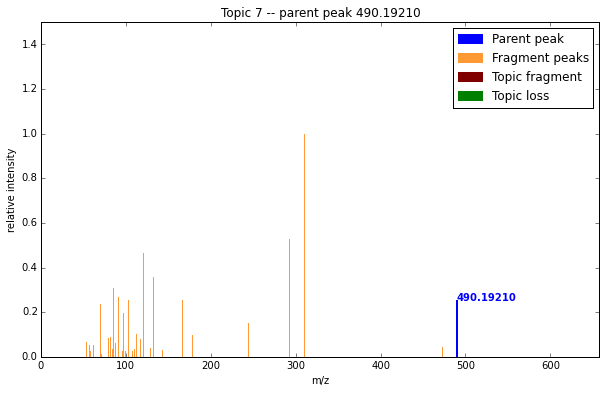

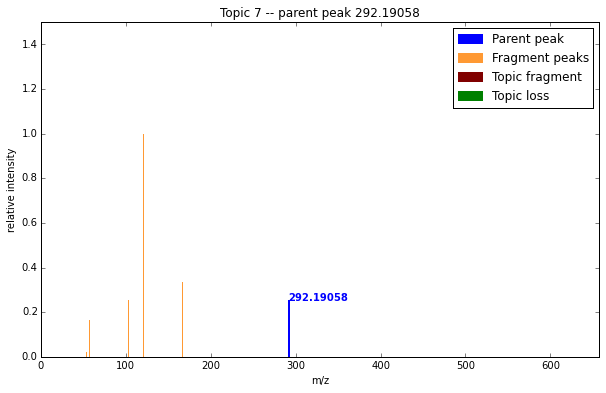

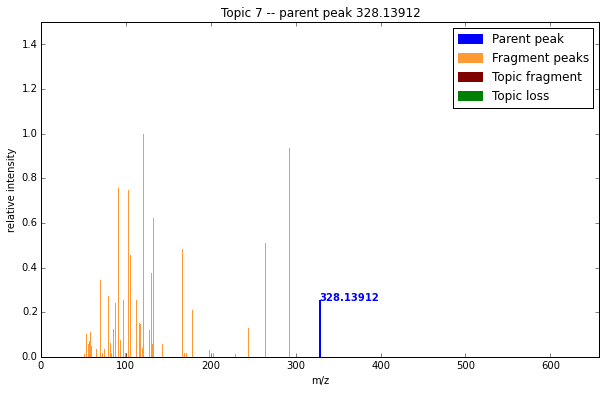

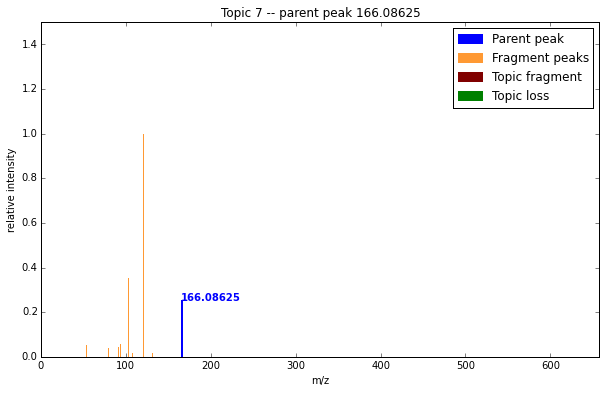

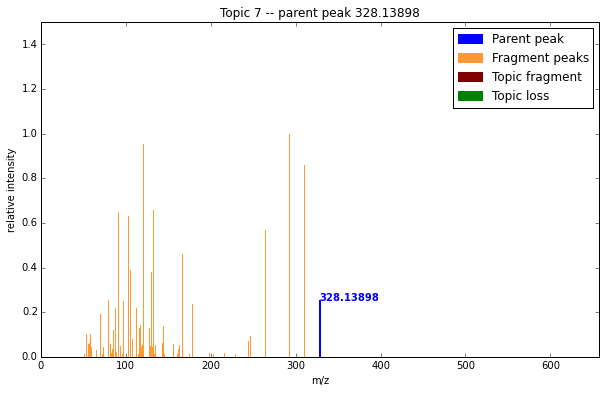

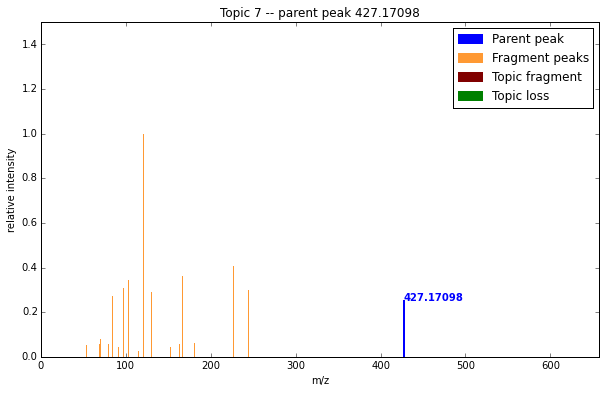

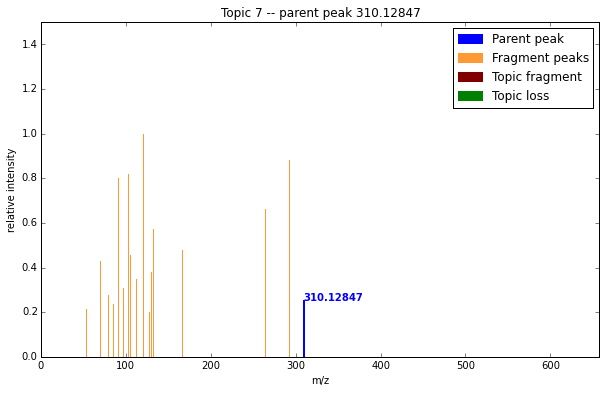

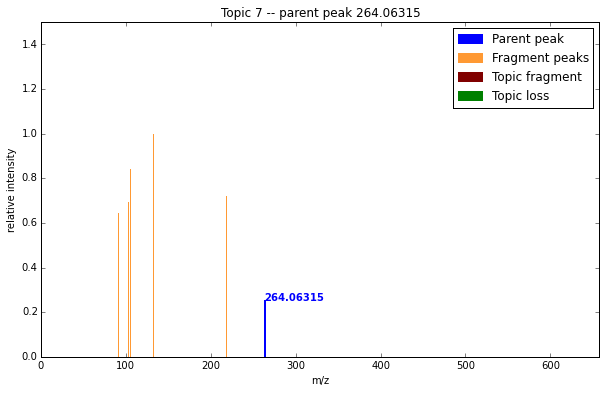

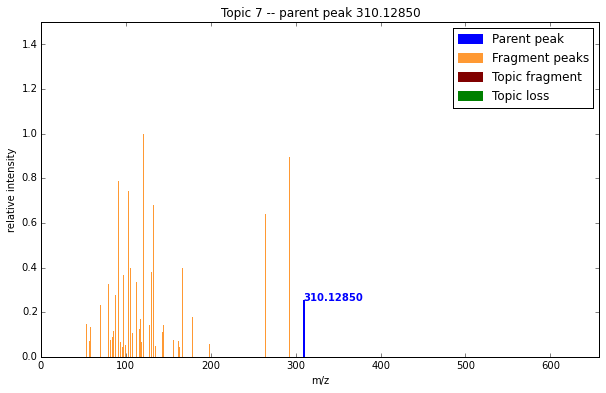

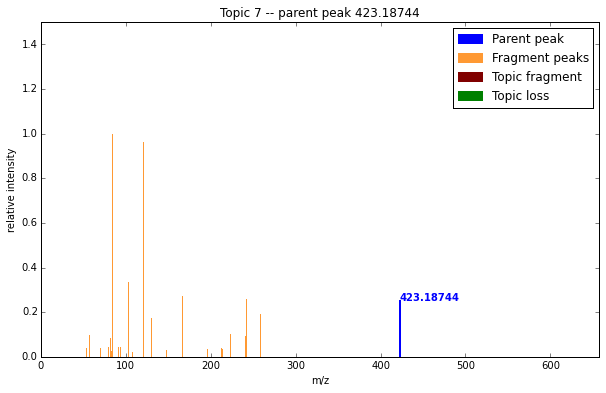

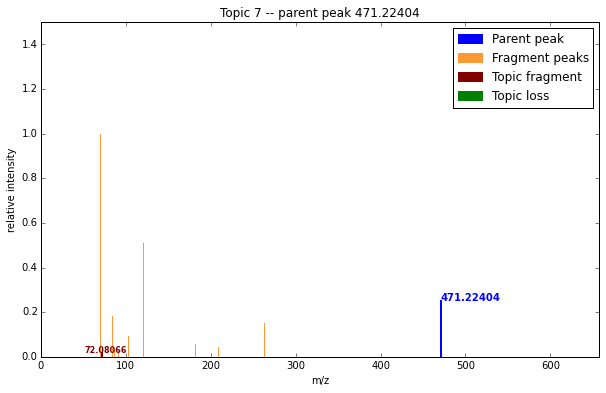

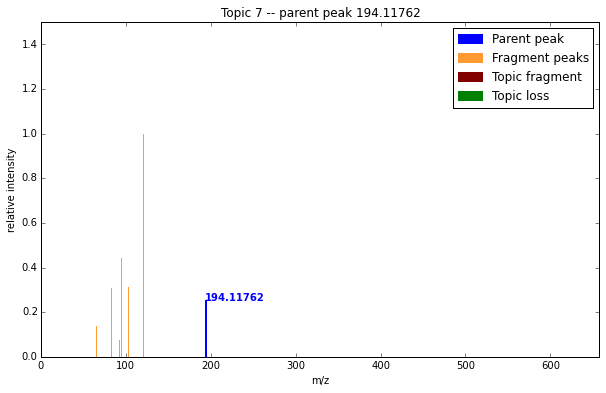

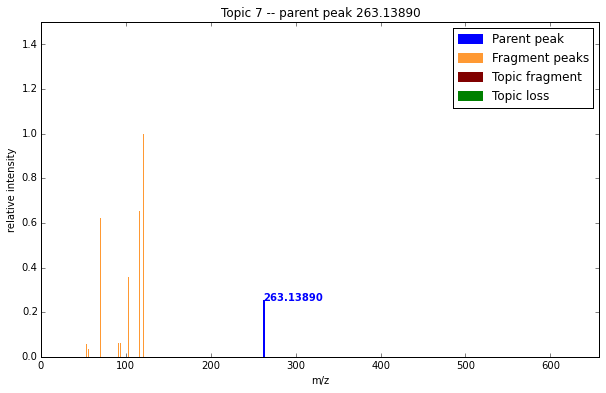

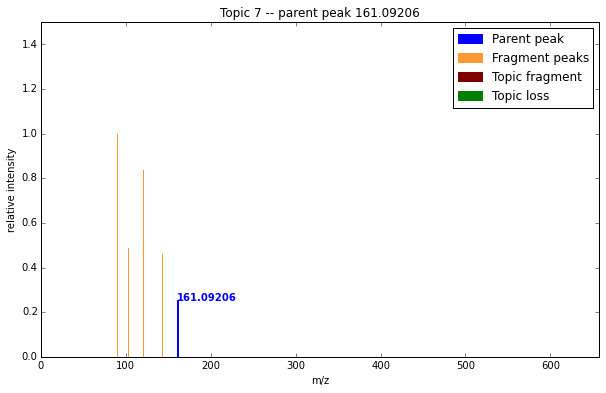

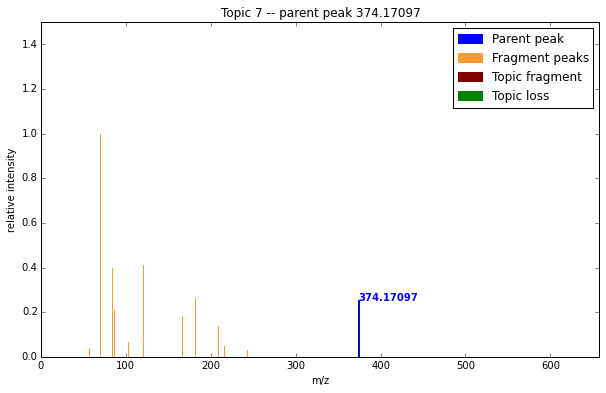

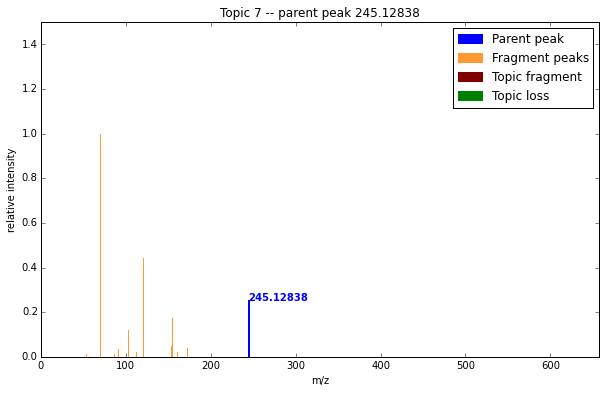

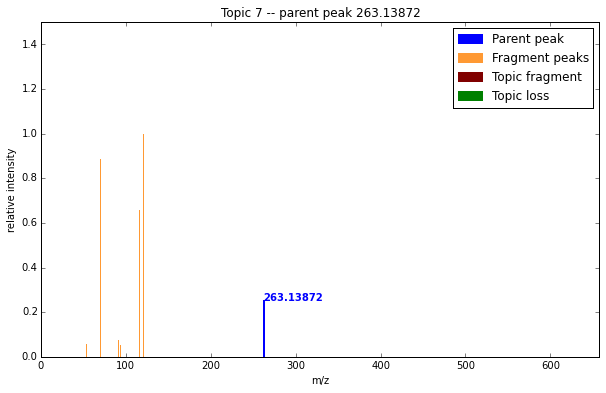

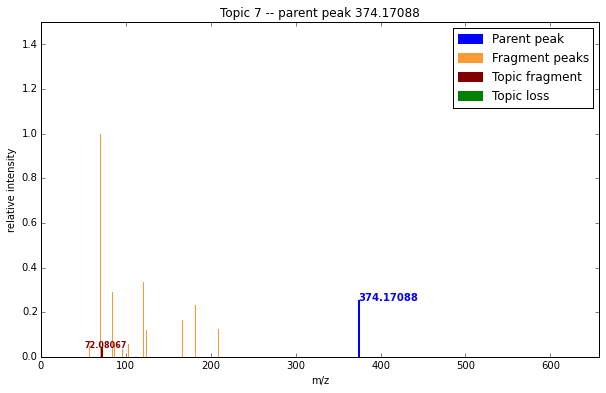

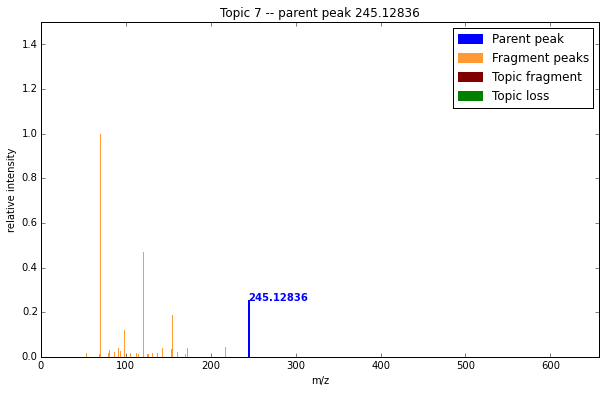

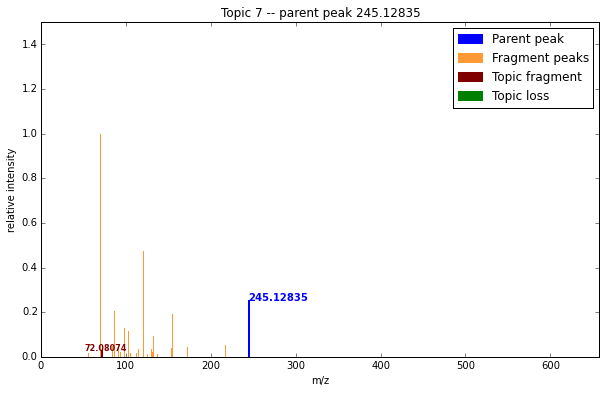

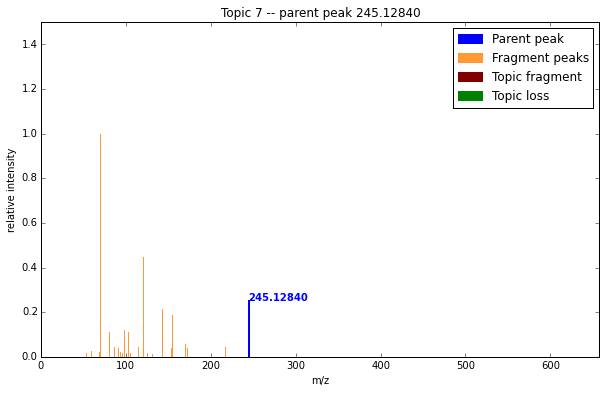

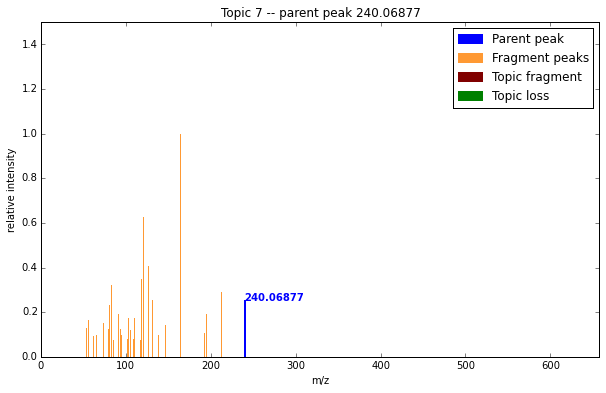

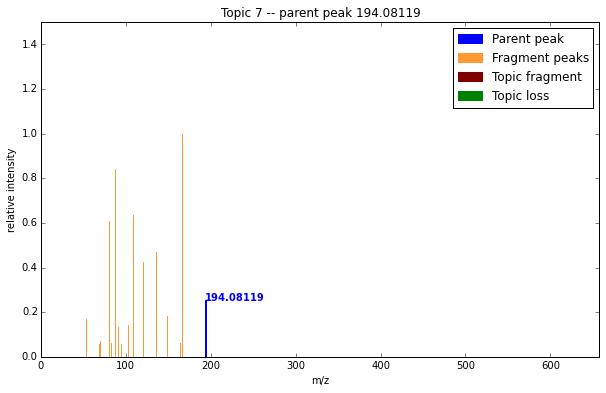

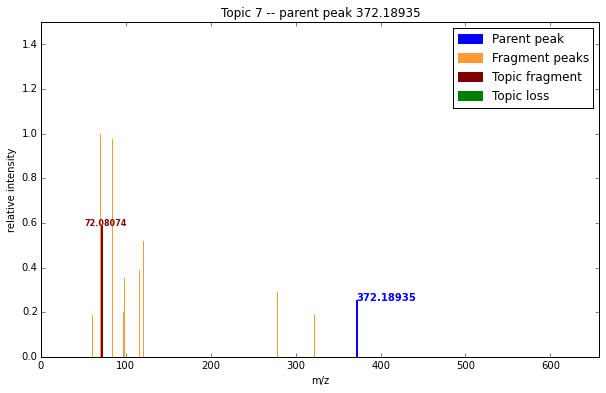

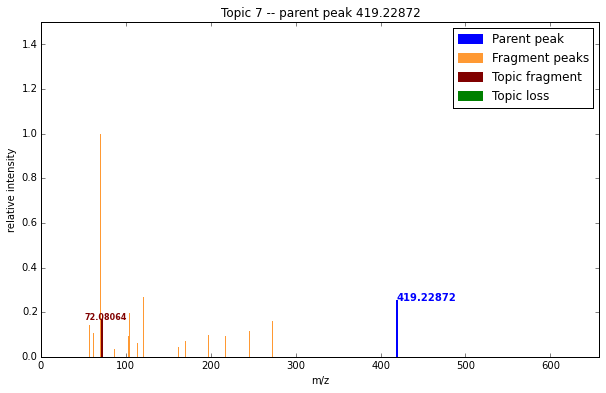

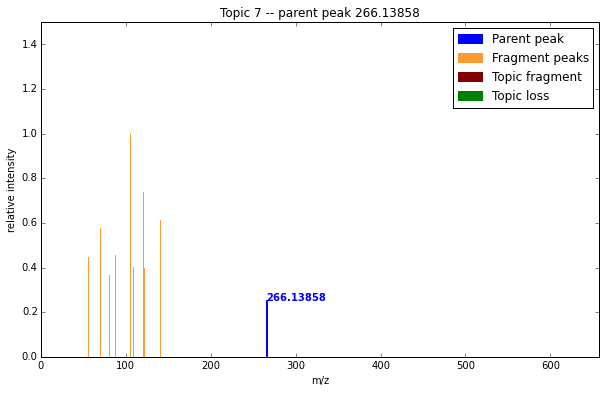

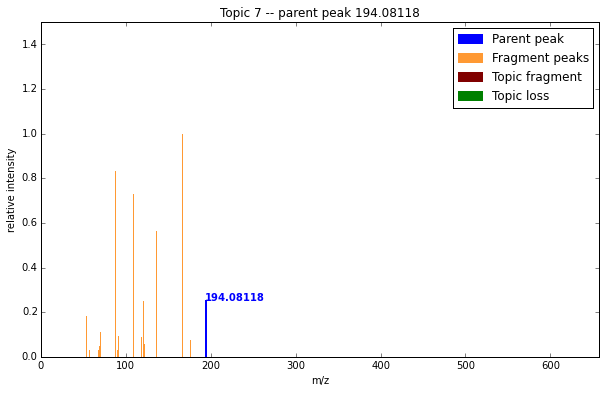

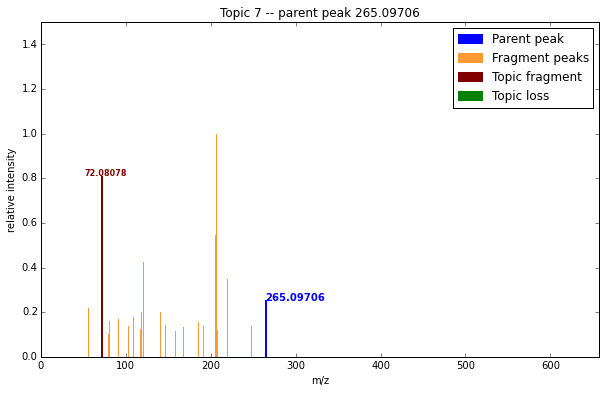

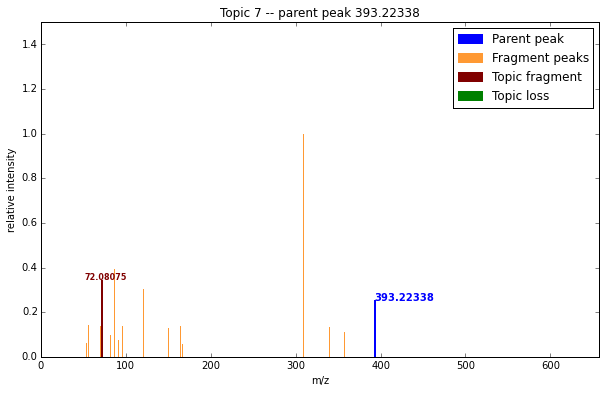

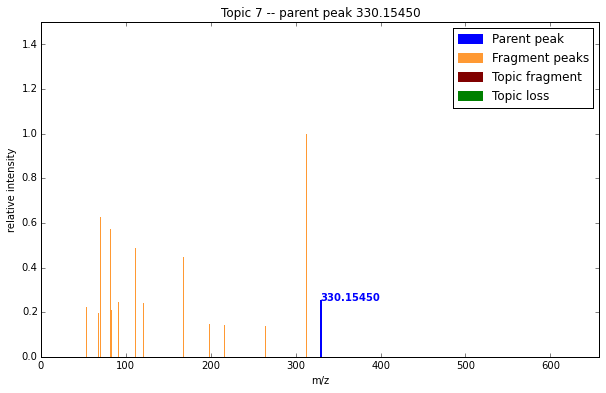

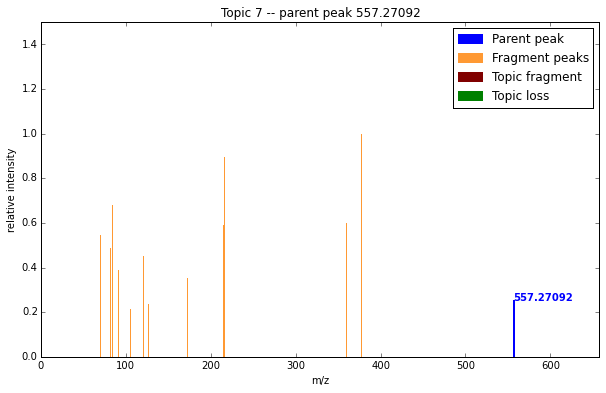

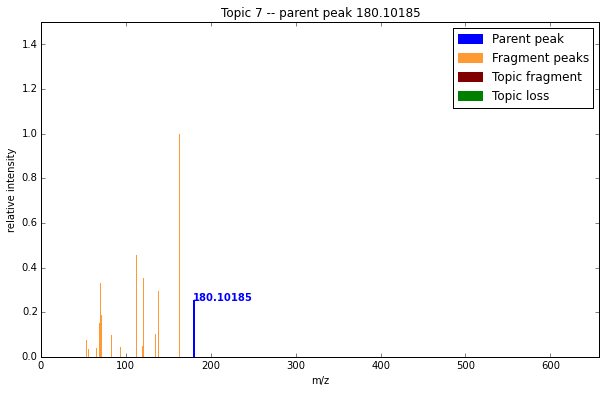

Topic 8 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    6554 	110.06007	372.967		1.187e+07	1.057
2    5590 	108.04439	420.704		3.402e+07	0.356
3    2800 	184.06045	268.264		7.680e+06	0.301

Fragments

1    fragment_67.05455 (0.256)
	Nothing found for the selected parent peaks
2    fragment_81.07 (0.248)
	Nothing found for the selected parent peaks
3    fragment_79.05417 (0.107)
	Nothing found for the selected parent peaks
4    fragment_93.06982 (0.094)
	Nothing found for the selected parent peaks
5    fragment_95.08537 (0.085)
	Nothing found for the selected parent peaks
6    fragment_55.05468 (0.079)
 peakID  MSnParentPeakID  mz         rt       intensity
 21106   6554             55.054703  392.524  0.265303 

Losses




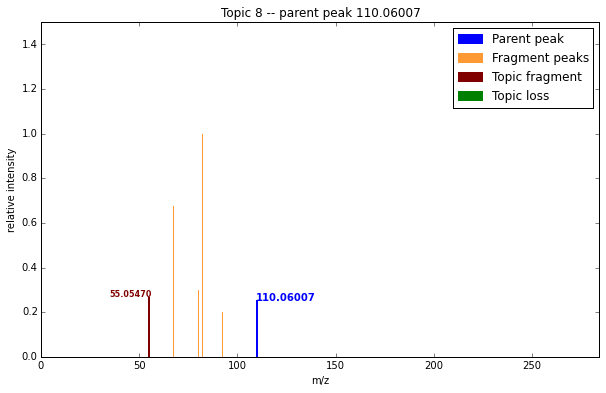

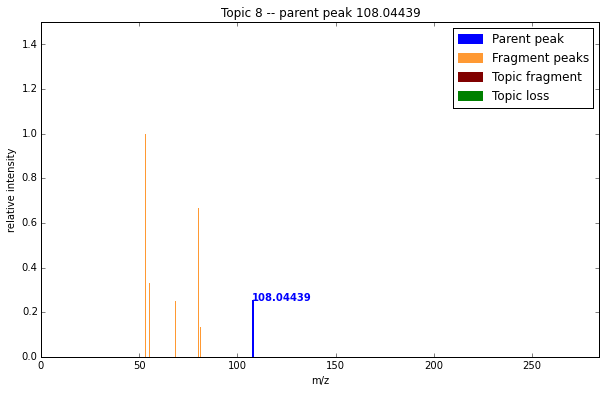

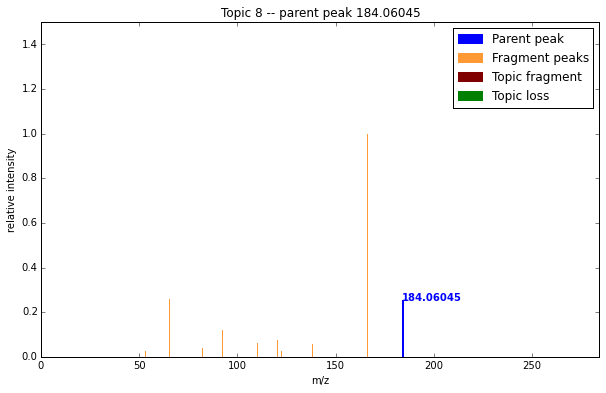

Topic 0 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    5402 	101.07097	192.402		6.534e+05	0.916
2    7699 	212.09509	592.941		6.869e+06	0.597
3    7700 	212.09523	512.020		5.956e+06	0.500
4    5750 	212.09534	455.913		2.581e+06	0.352
5    5089 	123.04742	417.464		3.413e+06	0.232

Fragments

1    fragment_177.05473 (0.286)
	Nothing found for the selected parent peaks
2    fragment_145.02839 (0.216)
	Nothing found for the selected parent peaks
3    fragment_89.03862 (0.205)
	Nothing found for the selected parent peaks
4    fragment_117.03314 (0.166)
	Nothing found for the selected parent peaks

Losses




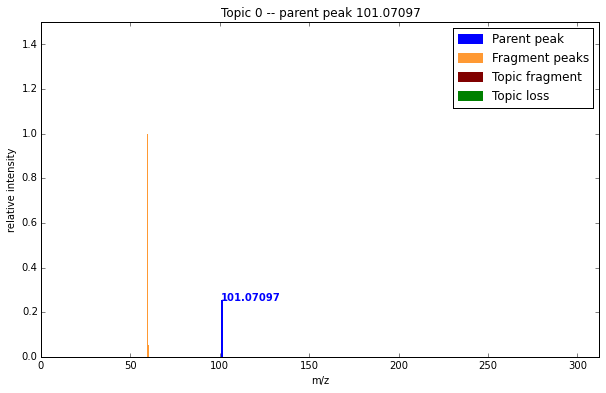

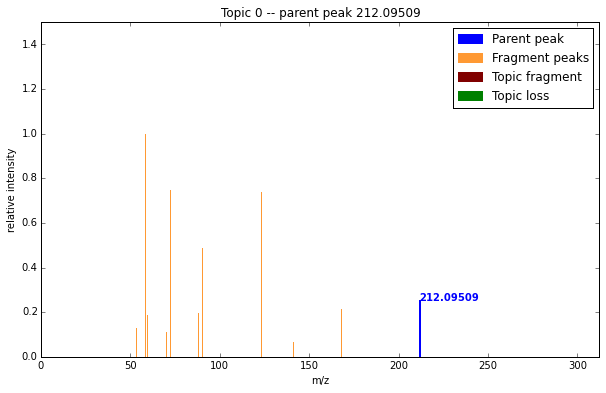

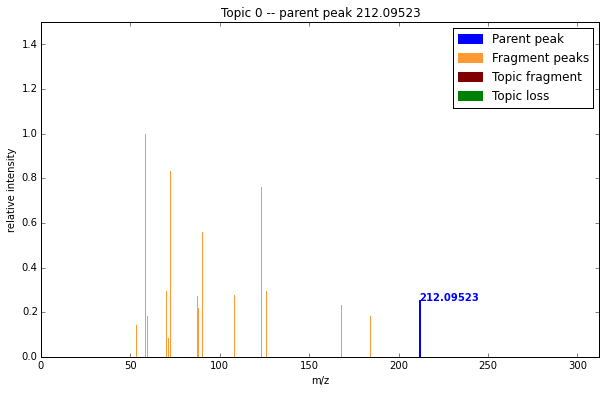

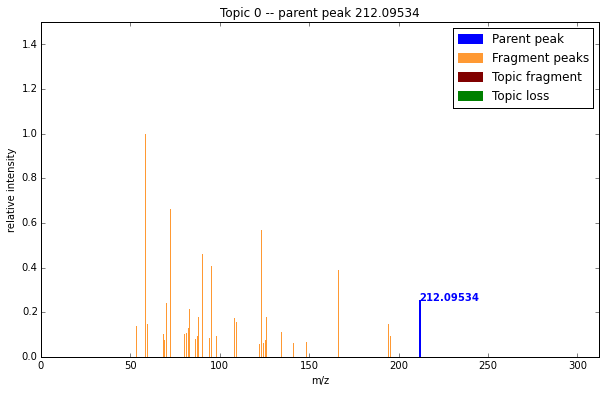

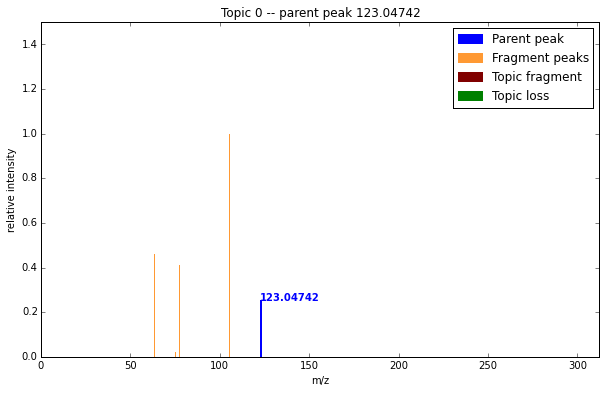

Topic 3 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    7562 	86.09644	535.817		3.530e+06	0.647
2    8290 	296.09759	624.751		5.233e+06	0.479

Fragments

1    fragment_120.08041 (0.429)
	Nothing found for the selected parent peaks
2    fragment_103.05449 (0.135)
	Nothing found for the selected parent peaks
3    fragment_166.08632 (0.088)
	Nothing found for the selected parent peaks
4    fragment_292.11665 (0.080)
	Nothing found for the selected parent peaks
5    fragment_132.08134 (0.073)
	Nothing found for the selected parent peaks

Losses




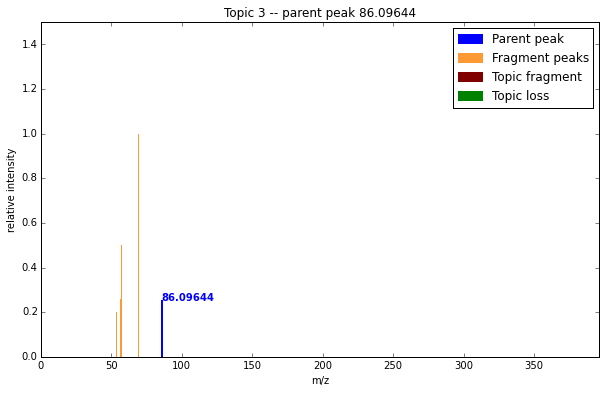

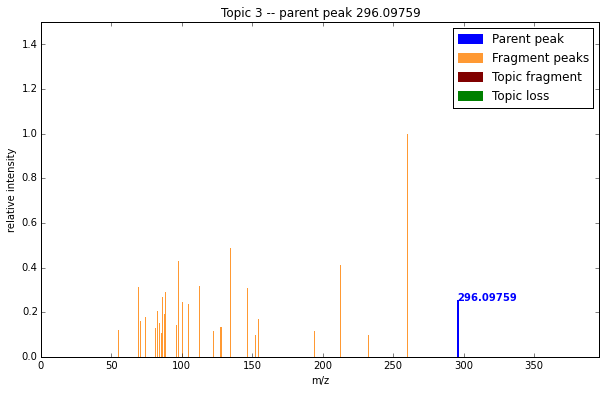

Topic 4 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    10050	363.18438	777.064		1.033e+06	0.801
2    10649	372.18970	627.780		2.912e+06	0.783
3    10651	372.18965	594.564		1.754e+06	0.760
4    10650	372.18978	682.846		2.564e+06	0.691
5    10628	306.16864	777.938		2.075e+06	0.605
6    10565	339.17402	795.121		5.061e+05	0.591
7    9940 	444.21093	744.213		4.910e+05	0.586
8    10626	306.16861	627.780		2.079e+06	0.581
9    10627	306.16864	681.141		1.463e+06	0.566
10   10629	306.16860	599.250		1.765e+06	0.468
11   10596	438.21096	762.143		1.611e+06	0.381
12   10597	438.21087	682.846		7.052e+05	0.341
13   10049	363.18440	788.931		1.331e+06	0.325
14   10634	348.17917	890.846		1.192e+06	0.254
15   7093 	306.16865	512.020		9.853e+05	0.239
16   11591	275.17112	944.319		1.491e+06	0.162
17   8075 	307.10001	613.602		8.447e+05	0.143
18   9485 	499.22477	710.458		3.815e+06	0.099
19   9601 	337.17158	709.126		2.032e+07	0.098
20   8228 	307.15008	618.453		8.216e+05	0.071
21   9602 	337.1

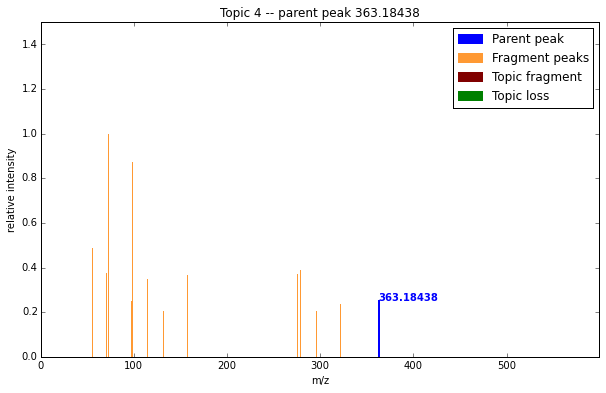

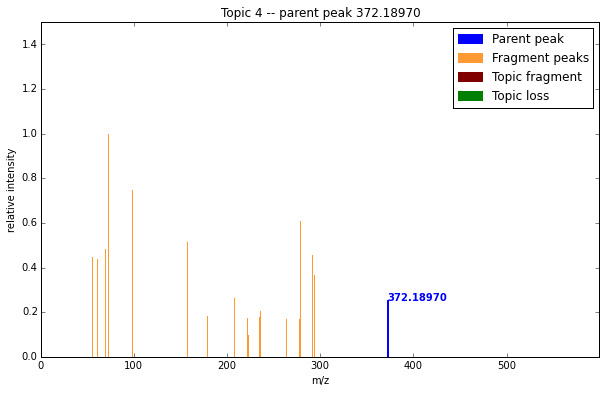

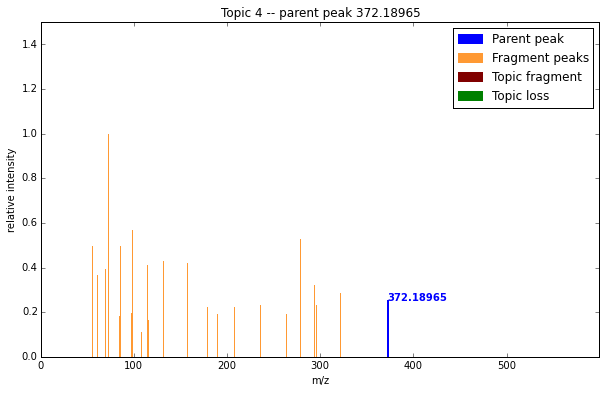

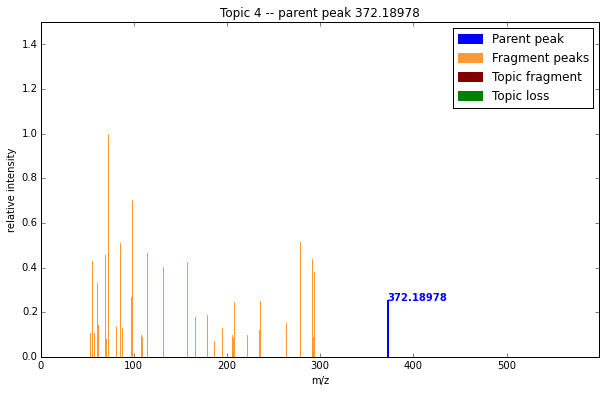

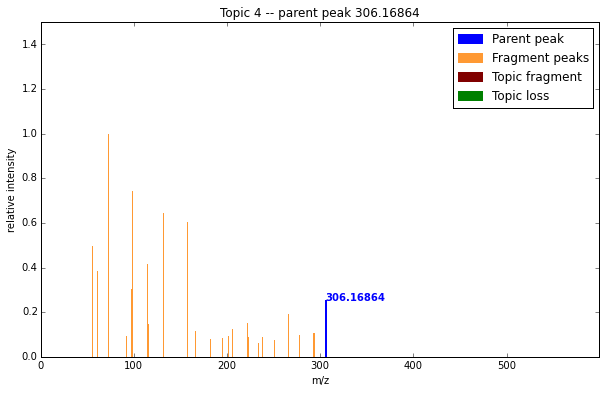

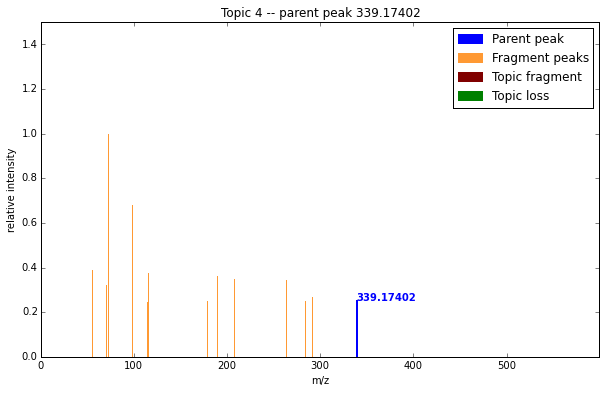

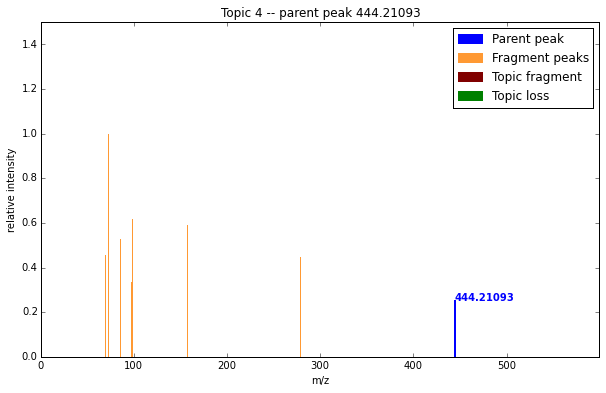

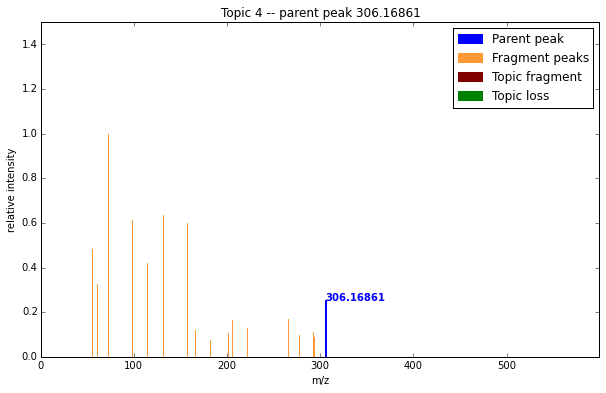

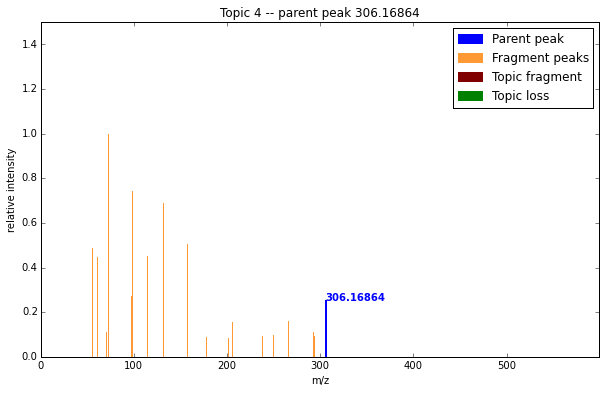

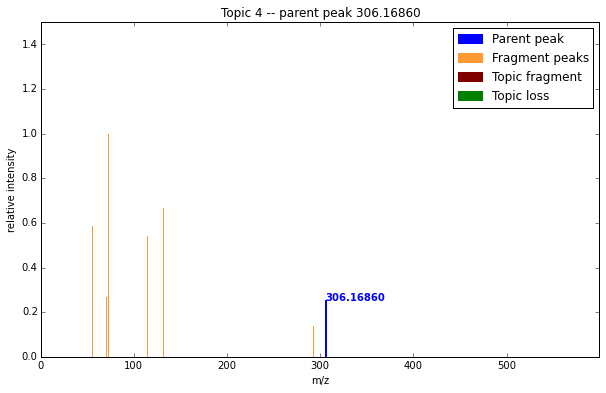

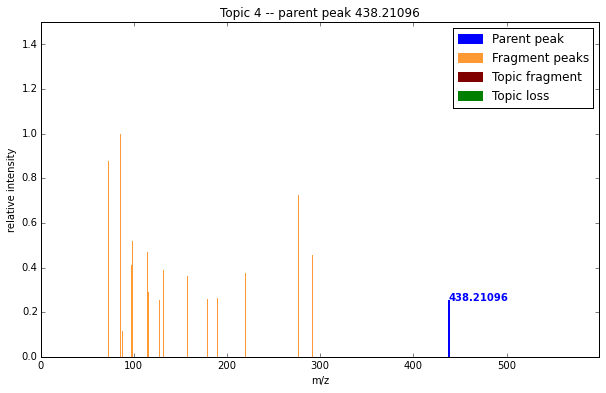

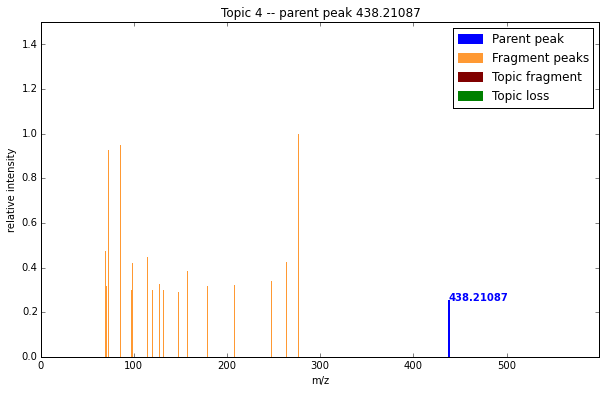

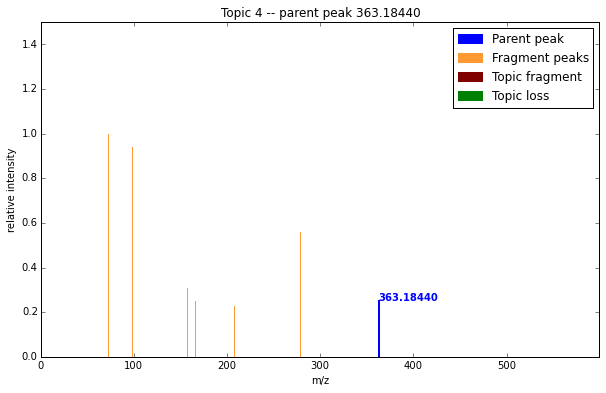

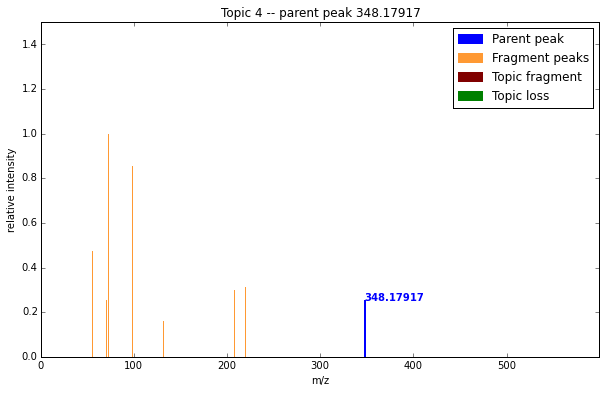

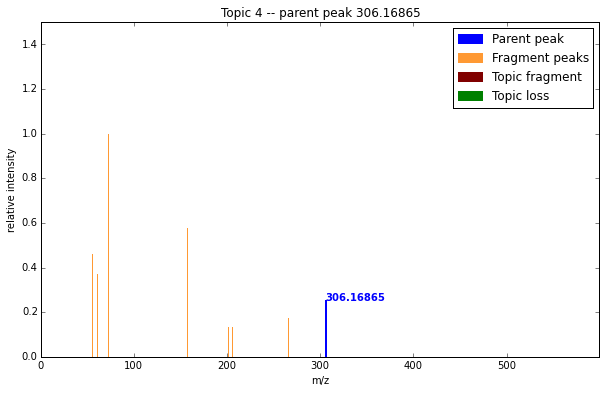

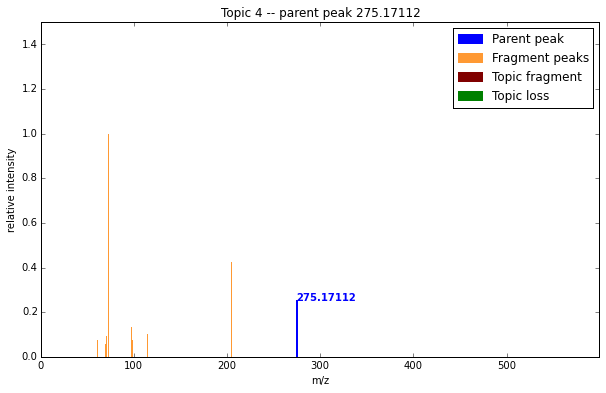

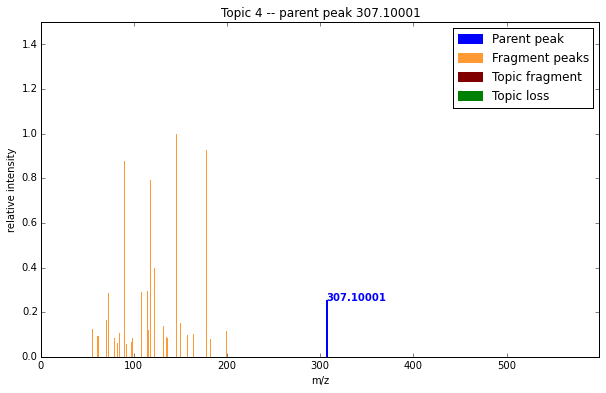

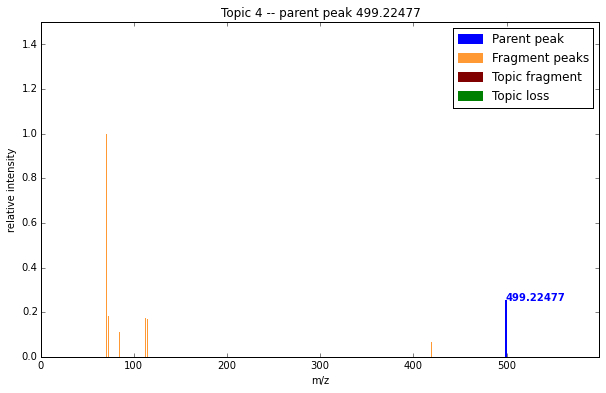

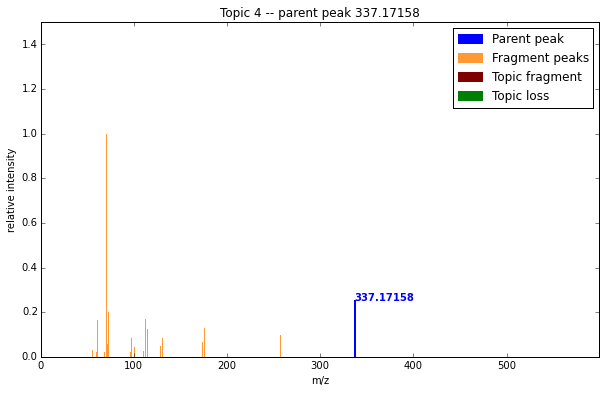

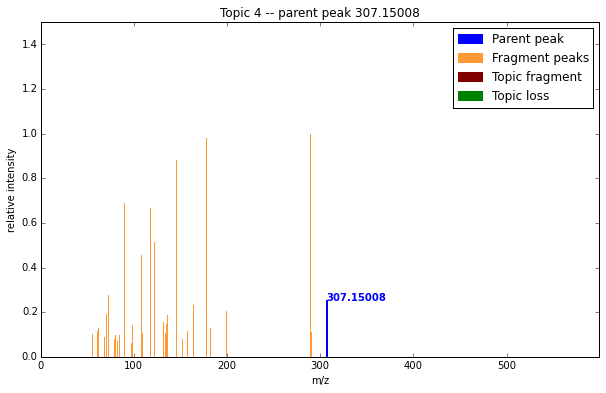

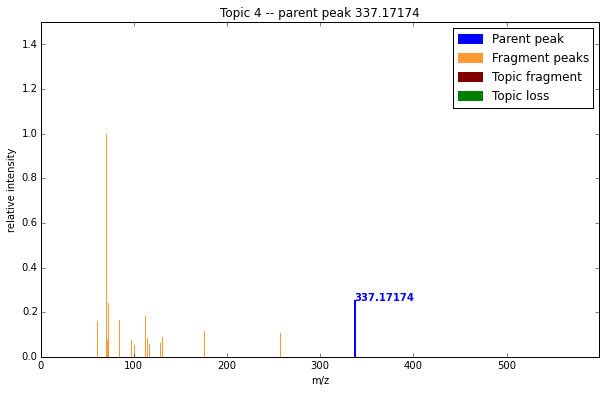

Topic 5 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    2042 	441.20165	266.671		3.940e+05	0.781
2    11442	265.15452	1127.700		6.142e+05	0.751
3    11439	265.15453	1076.500		7.052e+05	0.723
4    8020 	323.17132	565.100		1.971e+06	0.662
5    8046 	307.17629	568.114		2.768e+06	0.619
6    8075 	307.10001	613.602		8.447e+05	0.601
7    8394 	323.17141	616.818		7.706e+05	0.504
8    8228 	307.15008	618.453		8.216e+05	0.437
9    805  	336.21686	207.241		5.793e+05	0.117
10   3971 	309.08699	363.212		6.311e+05	0.112

Fragments

1    fragment_119.03519 (0.346)
	Nothing found for the selected parent peaks
2    fragment_110.03459 (0.141)
	Nothing found for the selected parent peaks
3    fragment_94.03985 (0.117)
	Nothing found for the selected parent peaks
4    fragment_55.02948 (0.099)
	Nothing found for the selected parent peaks
5    fragment_92.02426 (0.086)
	Nothing found for the selected parent peaks
6    fragment_82.04028 (0.064)
	Nothing found for the selected parent peaks

Los

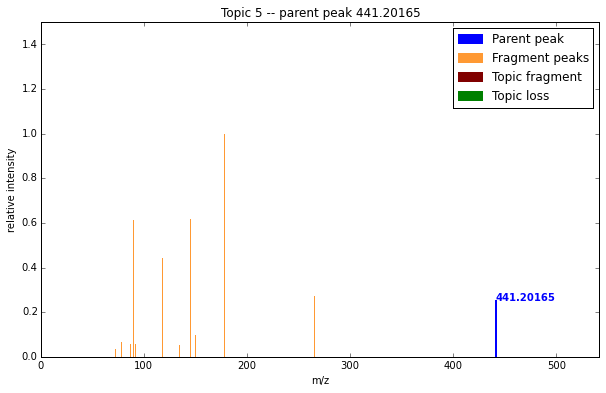

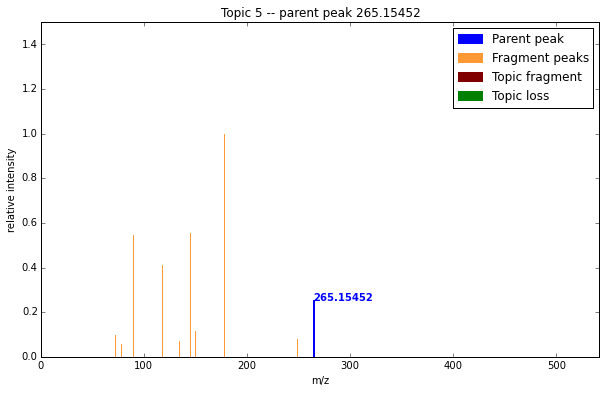

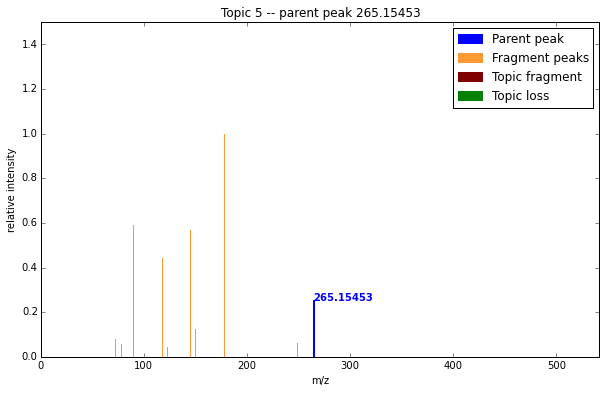

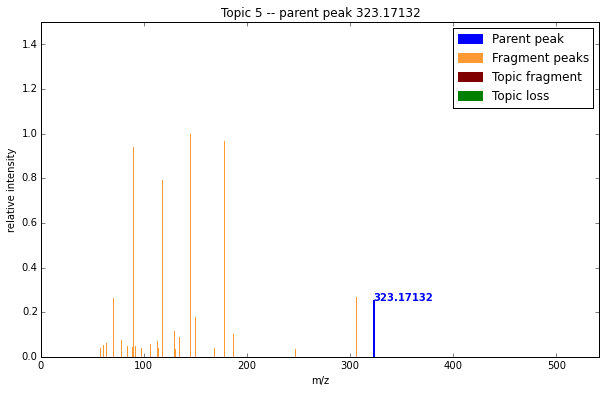

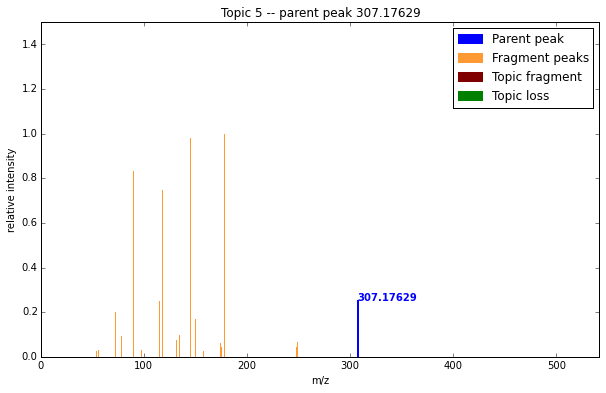

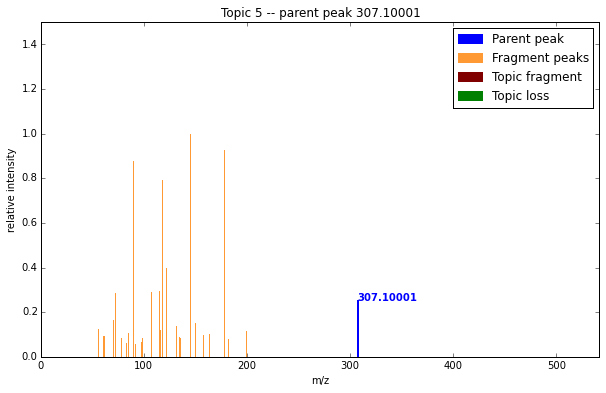

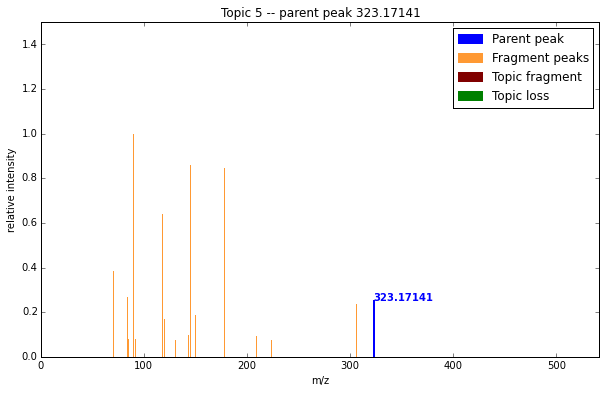

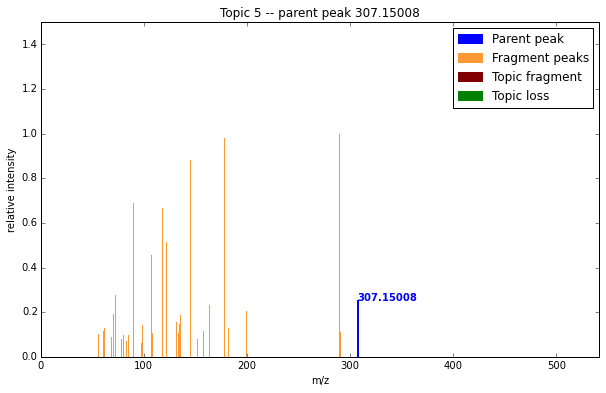

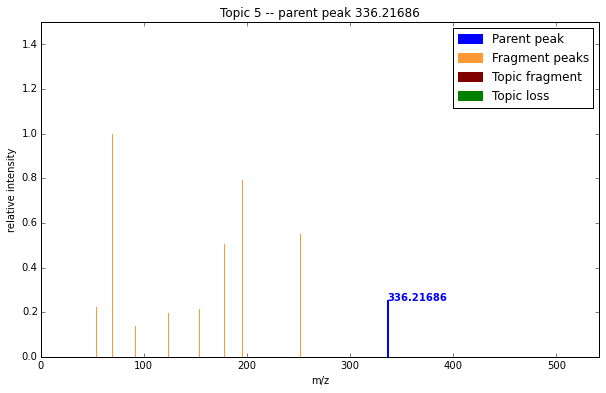

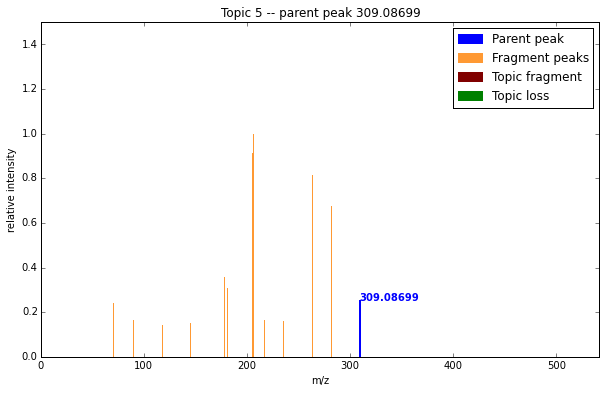

Topic 6 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    9062 	111.00768	695.766		4.253e+05	1.578
2    1973 	273.18057	255.160		1.335e+06	0.230
3    6235 	171.07640	480.657		1.522e+06	0.159
4    8547 	147.07638	629.354		3.936e+07	0.104

Fragments

1    fragment_260.07565 (0.162)
	Nothing found for the selected parent peaks
2    fragment_57.05784 (0.081)
	Nothing found for the selected parent peaks
3    fragment_134.04528 (0.078)
	Nothing found for the selected parent peaks
4    fragment_212.05413 (0.066)
	Nothing found for the selected parent peaks
5    fragment_86.02373 (0.050)
	Nothing found for the selected parent peaks

Losses




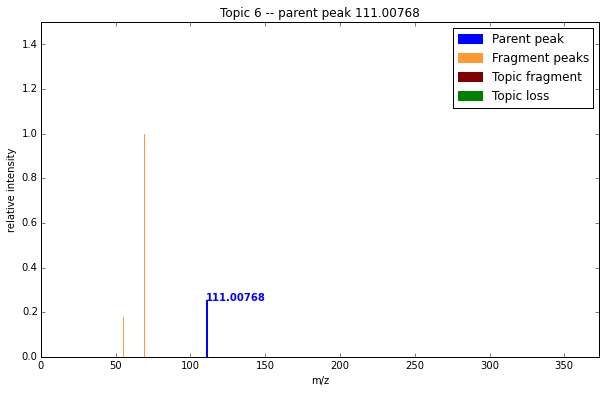

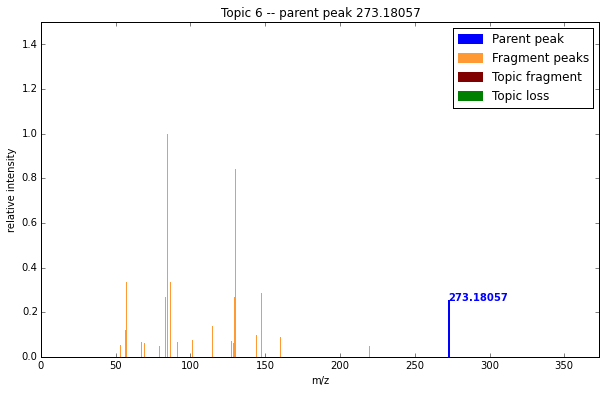

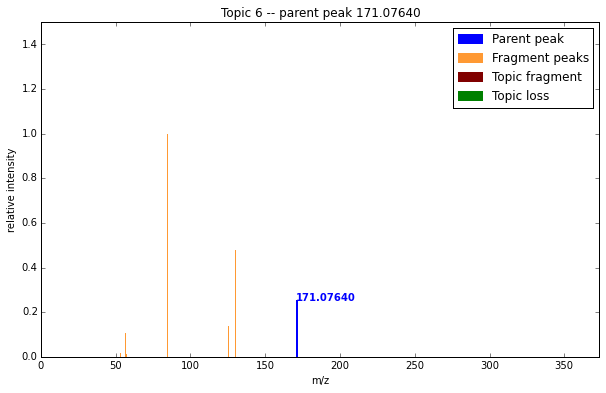

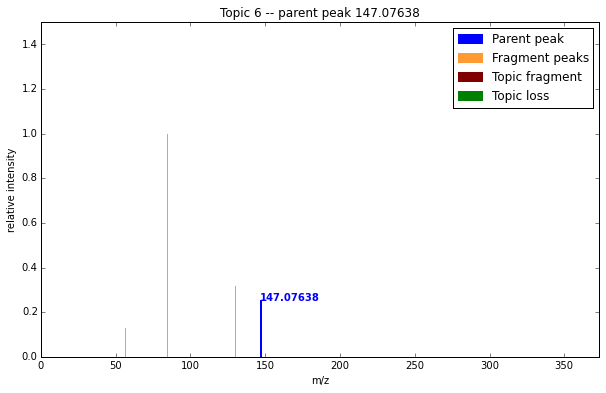

Topic 9 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    6562 	136.06164	469.868		4.817e+06	2.201
2    7147 	137.04580	519.863		3.990e+06	1.480
3    6561 	136.06178	439.807		1.613e+07	1.047
4    7421 	150.07757	554.082		5.708e+06	0.127
5    8313 	284.09863	582.020		5.008e+07	0.100
6    7145 	269.08804	524.612		2.232e+06	0.089
7    6999 	298.11459	485.107		2.844e+06	0.071
8    7000 	298.11462	499.238		2.434e+06	0.054

Fragments

1    fragment_72.08072 (0.162)
	Nothing found for the selected parent peaks
2    fragment_98.05999 (0.147)
	Nothing found for the selected parent peaks
3    fragment_157.10848 (0.109)
	Nothing found for the selected parent peaks
4    fragment_114.10281 (0.100)
	Nothing found for the selected parent peaks
5    fragment_131.12918 (0.090)
	Nothing found for the selected parent peaks
6    fragment_55.05468 (0.067)
	Nothing found for the selected parent peaks

Losses




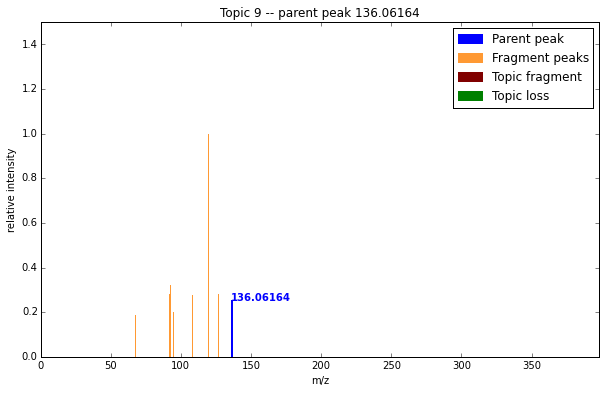

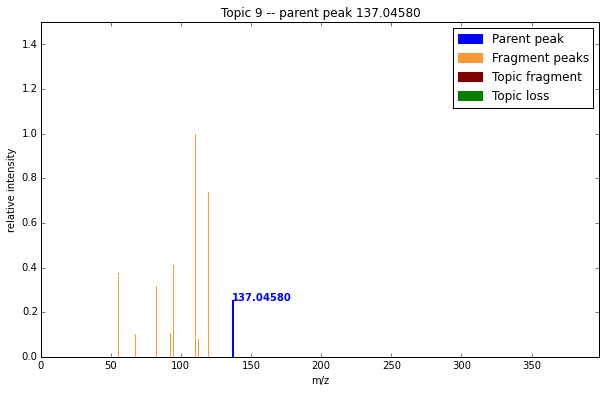

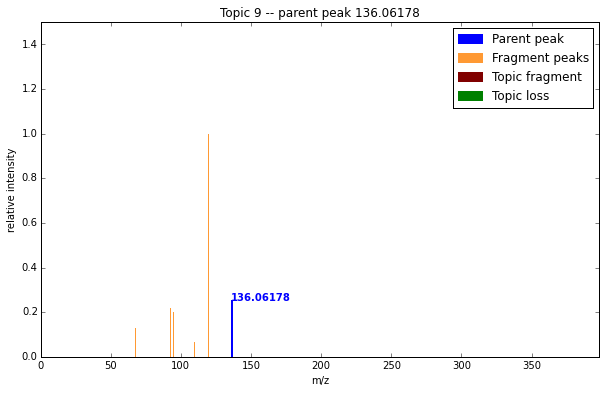

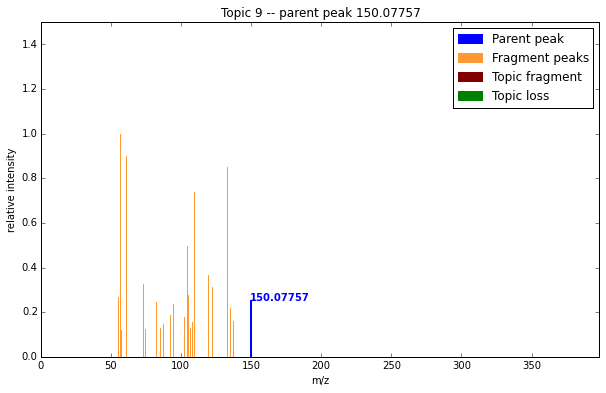

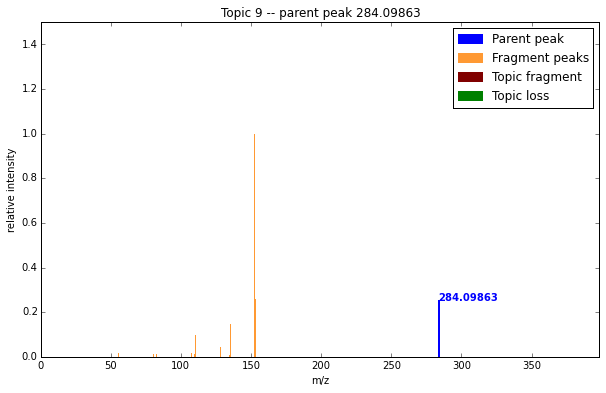

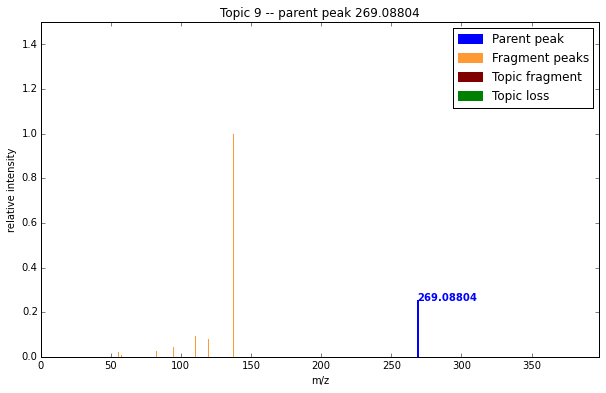

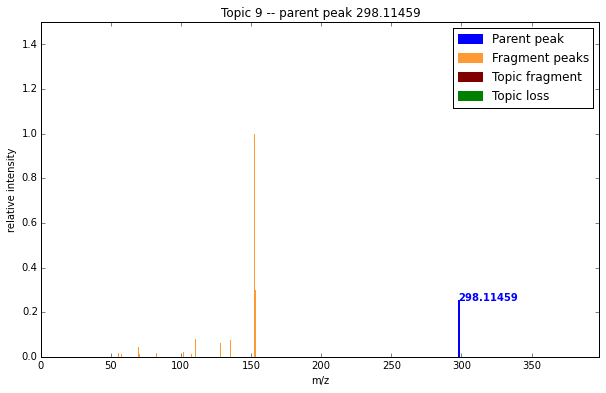

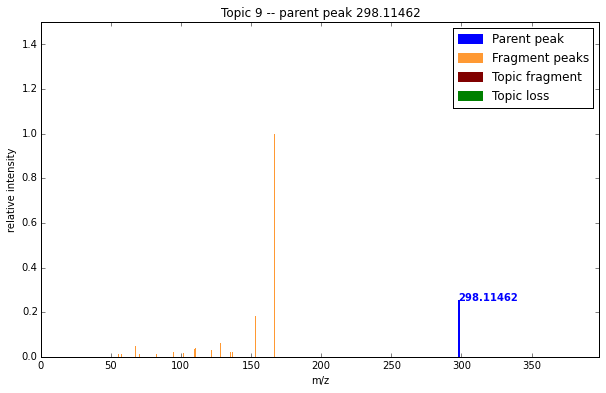

In [73]:
ms2lda.plot_lda_fragments(consistency=0.0, sort_by="h_index", selected_topics=new_persisted_index)

We can also plot of the predictive distribution of the persisted topics (theta) in the old and new LDA results

In [115]:
pred_old = np.sum(beer3_model.doc_topic_, axis=0)
pred_old = pred_old / np.sum(pred_old)
pred_old = pred_old[old_persisted_index]

beer2_model = ms2lda.model
pred_new = np.sum(beer2_model.doc_topic_, axis=0)
pred_new = pred_new / np.sum(pred_new)
pred_new = pred_new[new_persisted_index]

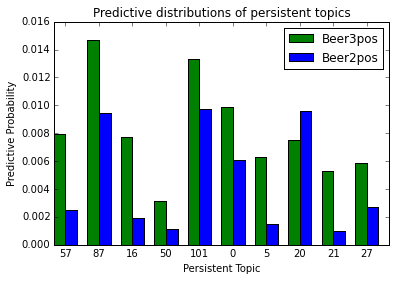

In [118]:
K = len(old_persisted_index)
ind = np.arange(K)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, pred_old, width, color='g')
rects2 = ax.bar(ind+width, pred_new, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Predictive Probability')
ax.set_xlabel('Persistent Topic')
ax.set_title('Predictive distributions of persistent topics')
ax.set_xticks(ind+width)
ax.set_xticklabels(old_persisted_index)

ax.legend( (rects1[0], rects2[0]), ('Beer3pos', 'Beer2pos') )
plt.show()